### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

### Reading files

In [2]:
# Reading Application Data file

AD = pd.read_csv("application_data.csv")

In [3]:
AD.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
# Reading Previous Application Data file

PAD = pd.read_csv("previous_application.csv.crdownload")

In [5]:
PAD.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [6]:
# Determining the shape of AD file

AD.shape

(307511, 122)

In [7]:
# Determining the shape of PAD file

PAD.shape

(1249943, 37)

## Data cleaning in AD file

In [8]:
AD.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

### Missing value Treatment 

#### Removal of cols which has more than 40% null values

In [9]:
# Investigating the null values in all the cols

AD.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
# Determining the %null values in all the columns

Column_Per = AD.isnull().sum()/307511*100

In [11]:
# Col_to_be_deleted consists all the cols which have more than 40% null values

Col_to_be_deleted = Column_Per[Column_Per>40]

In [12]:
# Determining the length of the Col_to_be_deleted cols

len(Column_Per[Column_Per>40])

49

In [13]:
Col_to_be_deleted

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [14]:
# Indexing the cols which has more than 40% null values

drop_columns = Col_to_be_deleted.index

In [15]:
len(AD.columns)

122

In [16]:
# Dropping the drop_columns, creating a new df AD1

AD1 = AD.drop(drop_columns, axis=1)

In [17]:
# Investigating the cols after dropping the drop_columns

AD1.shape

(307511, 73)

In [18]:
AD1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [19]:
# Based on the initial analysis, dropping the cols which has low relavance in the analysis

AD1.drop([  'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL',  'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
     'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',  
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT'], axis=1, inplace=True)


In [20]:
AD1.shape

(307511, 38)

### Data imputation for columns which has missing values

In [21]:
# Identifying the % null values in AD1 df

AD1.isnull().sum().sort_values(ascending=False).head(15)/len(AD1)*100

OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
dtype: float64

<AxesSubplot:>

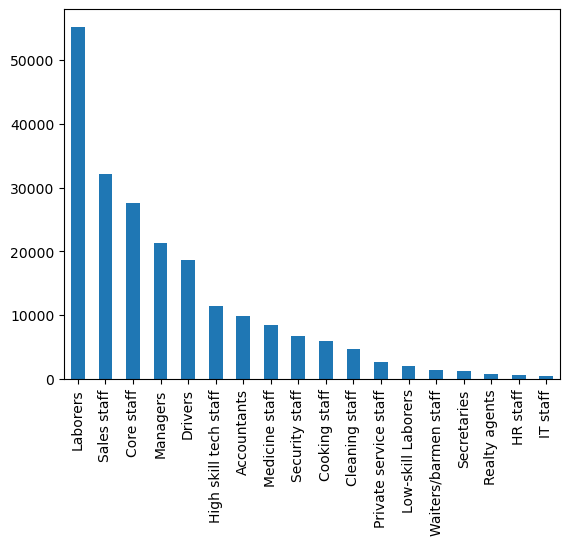

In [22]:
# Investigating null values for OCCUPATION_TYPE

AD1.OCCUPATION_TYPE.value_counts().plot.bar()

In [23]:
# Investigating null values for OCCUPATION_TYPE

AD1.OCCUPATION_TYPE.isnull().sum()

96391

In [24]:
# Replacing null values with "Others" as there are 96391 data entries are null and it can skew the data if we replace with the mode. Hence, categorizing it with "Others"

AD1.OCCUPATION_TYPE.fillna("Others", inplace=True)

In [25]:
# We're checking for null values after imputing data

AD1.OCCUPATION_TYPE.isnull().sum()

0

<AxesSubplot:>

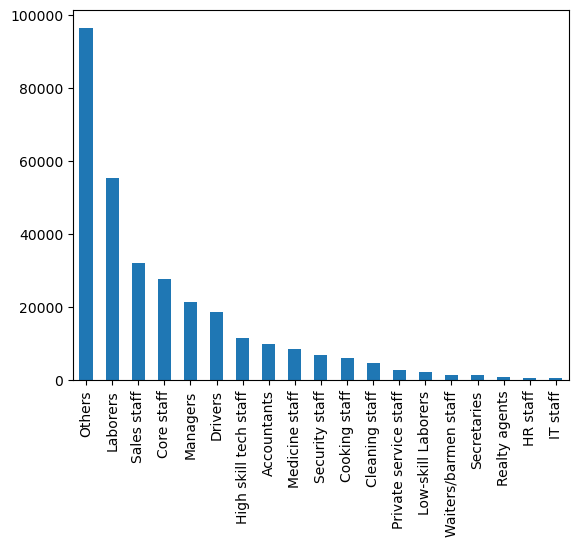

In [26]:
# We can see that categorizing the null values as "Others" won't affect our analysis

AD1.OCCUPATION_TYPE.value_counts().plot.bar()

In [27]:
# Investigating the AMT_REQ_CREDIT_BUREAU_YEAR col

AD1.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [28]:
# Determining the quantiles to further investigate the variation in data

AD1["AMT_REQ_CREDIT_BUREAU_YEAR"].quantile([0,0.25,0.50,0.75,0.90,0.99])

0.00    0.0
0.25    0.0
0.50    1.0
0.75    3.0
0.90    4.0
0.99    8.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [29]:
# Determining the mode for AMT_REQ_CREDIT_BUREAU_YEAR col

AD1["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [30]:
# AMT_REQ_CREDIT_BUREAU_YEAR col have higher null values. Based on the analysis, we can see that the spread is higher across the col, so imputing the data with mode would make more sense

AD1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(AD1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0], inplace=True)


In [31]:
# Investigating NAME_TYPE_SUITE col

AD1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [32]:
# Investigating the null values NAME_TYPE_SUITE col

AD1.NAME_TYPE_SUITE.isnull().sum()

1292

In [33]:
# Since the Unaccompanied is highest among the categories in NAME_TYPE_SUITE, we will impute Unaccompanied in the null values

AD1.NAME_TYPE_SUITE.fillna("Unaccompanied", inplace=True)

In [34]:
# We're checking for null values after imputing data

AD1.NAME_TYPE_SUITE.isnull().sum()

0

In [35]:
# Investigating the observation of client's social surroundings cols

AD1[["DEF_60_CNT_SOCIAL_CIRCLE"  , "OBS_30_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]].describe()

DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   0.100049                  1.422245   
std                    0.362291                  2.400989   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   24.000000                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   0.143421                  1.405292  
std                    0.446698                  2.379803  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    0.000000                  2.000000  
max                   34.000000                344.000000

In [36]:
# Determining the quantiles to further investigate the variation in data

AD1[["DEF_60_CNT_SOCIAL_CIRCLE"  , "OBS_30_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]].quantile([0,0.25,0.50,0.75,0.90,0.99])

DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  \
0.00                       0.0                       0.0   
0.25                       0.0                       0.0   
0.50                       0.0                       0.0   
0.75                       0.0                       2.0   
0.90                       0.0                       4.0   
0.99                       2.0                      10.0   

      DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  
0.00                       0.0                       0.0  
0.25                       0.0                       0.0  
0.50                       0.0                       0.0  
0.75                       0.0                       2.0  
0.90                       1.0                       4.0  
0.99                       2.0                      10.0

<AxesSubplot:>

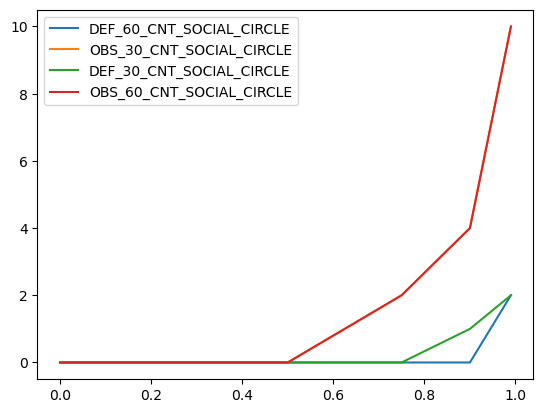

In [37]:
# Observing the skewness in the data

AD1[["DEF_60_CNT_SOCIAL_CIRCLE"  , "OBS_30_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]].quantile([0,0.25,0.50,0.75,0.90,0.99]).plot()

In [38]:
# Determining the mode of the observation of client's social surroundings cols

AD1[["DEF_60_CNT_SOCIAL_CIRCLE"  , "OBS_30_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]].mode()

DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  
0                       0.0                       0.0

In [39]:
# Based on observation of client's social surroundings cols, we can see the difference in data between 75% Quantile and max values. So, imputing the null values with mode would be logical

AD1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace= True)
AD1.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace= True)
AD1.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace= True)
AD1.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace= True)

In [40]:
# We're checking for null values after imputing data

AD1[["DEF_60_CNT_SOCIAL_CIRCLE"  , "OBS_30_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]].isnull().sum()

DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [41]:
AD1.isnull().sum().sort_values(ascending=False).head(5)

AMT_GOODS_PRICE           278
AMT_ANNUITY                12
CNT_FAM_MEMBERS             2
DAYS_LAST_PHONE_CHANGE      1
REG_CITY_NOT_WORK_CITY      0
dtype: int64

In [42]:
# Investigating the rest cols which have smaller %null values

AD1[[ "AMT_GOODS_PRICE" , "AMT_ANNUITY" , "CNT_FAM_MEMBERS" , "DAYS_LAST_PHONE_CHANGE"]].isnull().sum()

AMT_GOODS_PRICE           278
AMT_ANNUITY                12
CNT_FAM_MEMBERS             2
DAYS_LAST_PHONE_CHANGE      1
dtype: int64

In [43]:
# for columns AMT_GOODS_PRICE , AMT_ANNUITY ,CNT_FAM_MEMBERS , DAYS_LAST_PHONE_CHANGE, we can impute them with median as the mean and median are close to each other and the missing values are also smaller in numbers so it won't affect the analysis

AD1.AMT_GOODS_PRICE.fillna(AD1.AMT_GOODS_PRICE.median(), inplace=True)
AD1.AMT_ANNUITY.fillna(AD1.AMT_ANNUITY.median(), inplace=True)
AD1.CNT_FAM_MEMBERS.fillna(AD1.CNT_FAM_MEMBERS.median(), inplace=True)
AD1.DAYS_LAST_PHONE_CHANGE.fillna(AD1.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [44]:
# We're checking for null values after imputing data

AD1[["AMT_GOODS_PRICE" , "AMT_ANNUITY" , "CNT_FAM_MEMBERS" , "DAYS_LAST_PHONE_CHANGE"]].isnull().sum()

AMT_GOODS_PRICE           0
AMT_ANNUITY               0
CNT_FAM_MEMBERS           0
DAYS_LAST_PHONE_CHANGE    0
dtype: int64

In [45]:
# Checking all the null values for all the AD1 df, after the missing value treatment

AD1.isnull().sum().sort_values(ascending=False)

SK_ID_CURR                     0
REG_CITY_NOT_LIVE_CITY         0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_WORK_CITY         0
TARGET                         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
DAYS_ID_PUBLISH                0
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
DAYS_BIRTH                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_

#### Now, we have AD1 df prepared for further standardization of data 

## Standerdizing data

### Checking the structure/metadata of the data

In [46]:
AD1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0  ...                       0                      0                       0   
1  ...                       0                      0                       0   
2  ...                       0                      0                       0   
3  ...                       0                      0                       0   
4  ...                       0                      1                       1   

        ORGANIZATION_TYPE OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3                      2.0                      2.0   
1                  School                      1.0                      0.0   
2              Government                      0.0                      0.0   
3  Business Entity Type 3                      2.0                      0.0   
4                Religion                      0.0                      0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  

[5 rows x 38 columns]

In [47]:
AD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [48]:
# Standardizing the data for FLAG_OWN_CAR and FLAG_OWN_REALTY for easier analysis

AD1.FLAG_OWN_CAR = np.where(AD1.FLAG_OWN_CAR == "Y", 1,0)
AD1.FLAG_OWN_REALTY = np.where(AD1.FLAG_OWN_REALTY == "Y", 1,0)

In [49]:
# Checking the changes made in FLAG_OWN_CAR and FLAG_OWN_REALTY

AD1

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1         Cash loans           M             0   
1           100003       0         Cash loans           F             0   
2           100004       0    Revolving loans           M             1   
3           100006       0         Cash loans           F             0   
4           100007       0         Cash loans           M             0   
...            ...     ...                ...         ...           ...   
307506      456251       0         Cash loans           M             0   
307507      456252       0         Cash loans           F             0   
307508      456253       0         Cash loans           F             0   
307509      456254       1         Cash loans           F             0   
307510      456255       0         Cash loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                0             0          157500.0    675000.0   

        AMT_ANNUITY  ...  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0           24700.5  ...                       0                      0   
1           35698.5  ...                       0                      0   
2            6750.0  ...                       0                      0   
3           29686.5  ...                       0                      0   
4           21865.5  ...                       0                      1   
...             ...  ...                     ...                    ...   
307506      27558.0  ...                       0                      0   
307507      12001.5  ...                       0                      0   
307508      29979.0  ...                       0                      1   
307509      20205.0  ...                       1                      1   
307510      49117.5  ...                       0                      1   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                            0  Business Entity Type 3   
1                            0                  School   
2                            0              Government   
3                            0  Business Entity Type 3   
4                            1                Religion   
...                        ...                     ...   
307506                       0                Services   
307507                       0                     XNA   
307508                       1                  School   
307509                       0  Business Entity Type 1   
307510                       1  Business Entity Type 3   

       OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
0                           2.0                      2.0   
1                           1.0                      0.0   
2                           0.0                      0.0   
3                           2.0                      0.0   
4                           0.0                      0.0   
...                         ...                      ...   
307506                      0.0                      0.0   
307507                      0.0                      0.0   
307508                      6.0                      0.0   
307509                      0.0                      0.0

In [50]:
AD1.FLAG_OWN_CAR.value_counts()

0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64

In [51]:
AD1.FLAG_OWN_REALTY.value_counts()

1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [52]:
# Converting days into Years and standardizing the value for Days_Info_Cols

Days_Info_Cols = [i for i in AD1.columns if "DAYS" in i ]
Days_Info_Cols 

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [53]:
AD1[Days_Info_Cols]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

In [54]:
# Converting days into Years and standardizing the value

AD1["YEARS_BIRTH"] = AD1.DAYS_BIRTH.apply(lambda x: int(abs(x/365)))

AD1["YEARS_EMPLOYED"] = AD1.DAYS_EMPLOYED.apply(lambda x: int(abs(x/365)))

AD1["YEARS_REGISTRATION"] = AD1.DAYS_REGISTRATION.apply(lambda x: int(abs(x/365)))

AD1["YEARS_ID_PUBLISH"] = AD1.DAYS_ID_PUBLISH.apply(lambda x: int(abs(x/365)))

AD1["YEARS_LAST_PHONE_CHANGE"] = AD1.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(abs(x/365)))

In [55]:
# Cheking the value after the change has been made

AD1["YEARS_BIRTH"][:5]

0    25
1    45
2    52
3    52
4    54
Name: YEARS_BIRTH, dtype: int64

In [56]:
AD1.DAYS_BIRTH[:5]

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [57]:
# Dropping the previous Days_Info_Cols

AD1.drop(AD1[Days_Info_Cols] , axis=1, inplace=True)

In [58]:
AD1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       1.0                      0.0   
2  ...                       0.0                      0.0   
3  ...                       2.0                      0.0   
4  ...                       0.0                      0.0   

  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0                      2.0                      2.0   
1                      1.0                      0.0   
2                      0.0                      0.0   
3                      2.0                      0.0   
4                      0.0                      0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR YEARS_BIRTH  YEARS_EMPLOYED YEARS_REGISTRATION  \
0                        1.0          25               1                  9   
1                        0.0          45               3                  3   
2                        0.0          52               0                 11   
3                        0.0          52               8                 26   
4                        0.0          54               8                 11   

   YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE  
0                 5                        3  
1                 0                        2  
2                 6                        2  
3                 6                        1  
4                 9                        3  

[5 rows x 38 columns]

In [59]:
# Checking the TARGET col

AD1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [60]:
# Checking the NAME_CONTRACT_TYPE col

AD1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [61]:
# Checking the CODE_GENDER col

AD1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [62]:
# Standardizing the "XNA" with the maxmimum entries i.e. "F"

AD1.CODE_GENDER.replace("XNA", "F", inplace=True)

In [63]:
AD1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

## Outliers Analysis of Numerical data

In [64]:
# We're creating Numerical_cols which has numerical data so we can perform analysis at once

Numerical_cols = AD1[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                      'REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION',
                      'YEARS_ID_PUBLISH',
                      'YEARS_LAST_PHONE_CHANGE',  "DEF_60_CNT_SOCIAL_CIRCLE"  ,
                      "OBS_30_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE",
                      "AMT_REQ_CREDIT_BUREAU_YEAR"
]]

In [65]:
Numerical_cols.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801              1.0           25               1   
1                    0.003541              2.0           45               3   
2                    0.010032              1.0           52               0   
3                    0.008019              2.0           52               8   
4                    0.028663              1.0           54               8   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE  \
0                   9                 5                        3   
1                   3                 0                        2   
2                  11                 6                        2   
3                  26                 6                        1   
4                  11                 9                        3   

   DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

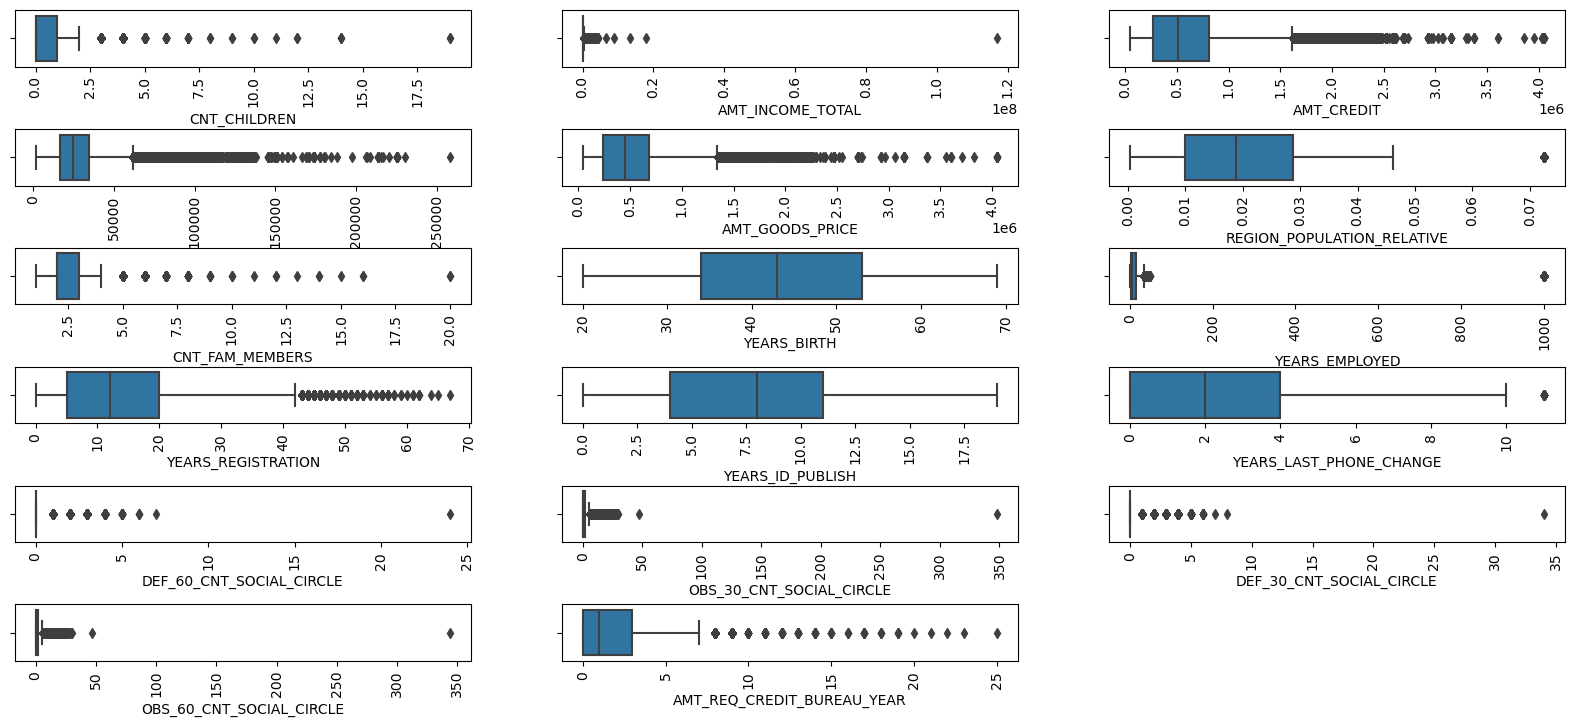

In [66]:
# Investogating the putliers using box plot

plt.figure(figsize=[20,10])

x=1

plt.subplots_adjust(hspace= 1.1)
for i in Numerical_cols:
    plt.subplot(7,3,x)
    sns.boxplot(Numerical_cols[i])
    plt.xticks(rotation=90)
    x+=1
    
plt.show()


In [67]:
# After investigating using box plots, we can determine some cols which have outliers hence we can club them together as Outliers_Numer_cols to analyse them together 

Outliers_Numer_cols = AD1[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE", 
                           'REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS','YEARS_EMPLOYED',
                           'YEARS_REGISTRATION','YEARS_LAST_PHONE_CHANGE', "DEF_60_CNT_SOCIAL_CIRCLE"  ,
                      "OBS_30_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE",
                      "AMT_REQ_CREDIT_BUREAU_YEAR"
]]   
Outliers_Numer_cols.shape

(307511, 15)

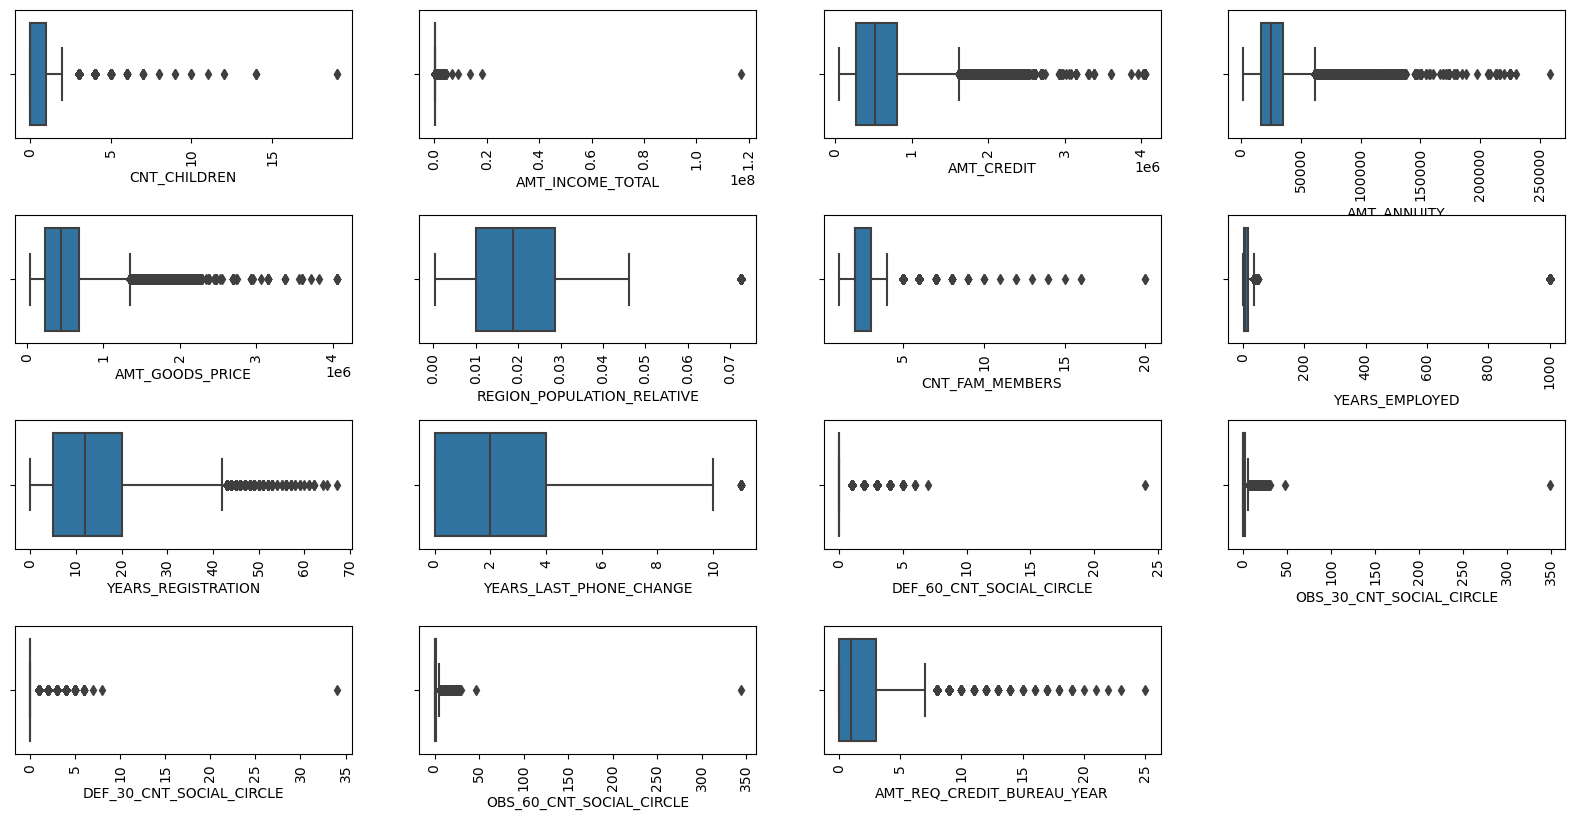

In [331]:
# Investigating Outliers_Numer_cols using box plots

plt.figure(figsize=[20, 15])

x = 1

plt.subplots_adjust(hspace=0.6)

for i in Outliers_Numer_cols:
    plt.subplot(6,4,x)
    sns.boxplot(Outliers_Numer_cols[i])
    plt.xticks(rotation=90)
    x+=1
plt.show()    

In [69]:
# Finding outliers for all the Outliers_Numer_cols as it depicts the higher spread across the data

Outliers_Numer_cols.quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.00])

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0.00           0.0           25650.0     45000.0       1615.5   
0.25           0.0          112500.0    270000.0      16524.0   
0.50           0.0          147150.0    513531.0      24903.0   
0.75           1.0          202500.0    808650.0      34596.0   
0.90           2.0          270000.0   1133748.0      45954.0   
0.95           2.0          337500.0   1350000.0      53325.0   
0.99           3.0          472500.0   1854000.0      70006.5   
1.00          19.0       117000000.0   4050000.0     258025.5   

      AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
0.00          40500.0                    0.000290              1.0   
0.25         238500.0                    0.010006              2.0   
0.50         450000.0                    0.018850              2.0   
0.75         679500.0                    0.028663              3.0   
0.90        1093500.0                    0.035792              3.0   
0.95        1305000.0                    0.046220              4.0   
0.99        1800000.0                    0.072508              5.0   
1.00        4050000.0                    0.072508             20.0   

      YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_LAST_PHONE_CHANGE  \
0.00             0.0                 0.0                      0.0   
0.25             2.0                 5.0                      0.0   
0.50             6.0                12.0                      2.0   
0.75            15.0                20.0                      4.0   
0.90          1000.0                27.0                      5.0   
0.95          1000.0                31.0                      6.0   
0.99          1000.0                38.0                      8.0   
1.00          1000.0                67.0                     11.0   

      DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  \
0.00                       0.0                       0.0   
0.25                       0.0                       0.0   
0.50                       0.0                       0.0   
0.75                       0.0                       2.0   
0.90                       0.0                       4.0   
0.95                       1.0                       6.0   
0.99                       2.0                      10.0   
1.00                      24.0                     348.0   

      DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0.00                       0.0                       0.0   
0.25                       0.0                       0.0   
0.50                       0.0                       0.0   
0.75                       0.0                       2.0   
0.90                       1.0                       4.0   
0.95                       1.0                       6.0   
0.99                       2.0                      10.0   
1.00                      34.0                     344.0   

      AMT_REQ_CREDIT_BUREAU_YEAR  
0.00                         0.0  
0.25                         0.0  
0.50                         1.0  
0.75                         3.0  
0.90                         4.0  
0.95                         5.0  
0.99                         8.0  
1.00                        25.0

In [70]:
# Describing the Outliers_Numer_cols to investigate more

Outliers_Numer_cols.describe()

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.487841   
std         0.722121      2.371231e+05  4.024908e+05   14493.461065   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
count     3.075110e+05               307511.000000    307511.000000   
mean      5.383163e+05                    0.020868         2.152664   
std       3.692890e+05                    0.013831         0.910679   
min       4.050000e+04                    0.000290         1.000000   
25%       2.385000e+05                    0.010006         2.000000   
50%       4.500000e+05                    0.018850         2.000000   
75%       6.795000e+05                    0.028663         3.000000   
max       4.050000e+06                    0.072508        20.000000   

       YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_LAST_PHONE_CHANGE  \
count   307511.000000       307511.000000            307511.000000   
mean       185.021521           13.168683                 2.225114   
std        381.972190            9.646841                 2.193674   
min          0.000000            0.000000                 0.000000   
25%          2.000000            5.000000                 0.000000   
50%          6.000000           12.000000                 2.000000   
75%         15.000000           20.000000                 4.000000   
max       1000.000000           67.000000                11.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.099717                  1.417523   
std                    0.361735                  2.398395   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   24.000000                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.142944                  1.400626   
std                    0.446033                  2.377224   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count               307511.000000  
mean                     1.643447  
std                      1.855821  
min                      0.000000  
25%                      0.000000  
50%                      1.000000  
75%                      3.000000  
max                     25.000000

REGION_POPULATION_RELATIVE, YEARS_REGISTRATION, YEARS_LAST_PHONE_CHANGE are the cols do not require additional outlier analysis in terms of the distribution of data. We can standardize the rest cols which have higher spread across the data

In [71]:
# 1. CNT_CHILDREN: 

round(len(AD1.CNT_CHILDREN.loc[AD1.CNT_CHILDREN>3])/len(AD1.CNT_CHILDREN)*100,2)

0.18

In [72]:
# 2. AMT_INCOME_TOTAL

round(len(AD1.AMT_INCOME_TOTAL.loc[AD1.AMT_INCOME_TOTAL>337500.00])/len(AD1.AMT_INCOME_TOTAL)*100,2)

4.56

In [73]:
# 3. AMT_CREDIT

round(len(AD1.AMT_CREDIT.loc[AD1.AMT_CREDIT>1350000.00])/len(AD1.AMT_CREDIT)*100,2)

4.56

In [74]:
# 4. AMT_ANNUITY

round(len(AD1.AMT_ANNUITY.loc[AD1.AMT_ANNUITY>53325.00])/len(AD1.AMT_ANNUITY)*100,2)

4.99

In [75]:
# 5. AMT_GOODS_PRICE

round(len(AD1.AMT_GOODS_PRICE.loc[AD1.AMT_GOODS_PRICE>1305000.00])/len(AD1.AMT_GOODS_PRICE)*100,2)

4.95

In [76]:
# 6. CNT_FAM_MEMBERS

round(len(AD1.CNT_FAM_MEMBERS.loc[AD1.CNT_FAM_MEMBERS>4])/len(AD1.CNT_FAM_MEMBERS)*100,2)

1.3

In [77]:
# Investigating the YEARS_EMPLOYED, YEARS_REGISTRATION, YEARS_LAST_PHONE_CHANGE cols using quantiles

AD1[['YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_LAST_PHONE_CHANGE']].quantile([0, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.00])

YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_LAST_PHONE_CHANGE
0.00             0.0                 0.0                      0.0
0.25             2.0                 5.0                      0.0
0.50             6.0                12.0                      2.0
0.75            15.0                20.0                      4.0
0.90          1000.0                27.0                      5.0
0.95          1000.0                31.0                      6.0
0.99          1000.0                38.0                      8.0
1.00          1000.0                67.0                     11.0

In [78]:
# 7. YEARS_EMPLOYED

round(len(AD1.YEARS_EMPLOYED.loc[AD1.YEARS_EMPLOYED>=1000])/len(AD1.YEARS_EMPLOYED)*100,2)

18.01

In [79]:
# YEARS_EMPLOYED has outliers where more than r equals to 1000 years of employment need to be standardized

AD1.YEARS_EMPLOYED.loc[AD1.YEARS_EMPLOYED>=1000]

8         1000
11        1000
23        1000
38        1000
43        1000
          ... 
307469    1000
307483    1000
307487    1000
307505    1000
307507    1000
Name: YEARS_EMPLOYED, Length: 55374, dtype: int64

In [80]:
len(AD1.YEARS_EMPLOYED.loc[AD1.YEARS_EMPLOYED>=1000])

55374

In [81]:
# Investigating the years of employment with the income type : We determine that 55352 applicants are the pensioner and 22 applicants are employed

AD1.loc[(AD1.YEARS_EMPLOYED>=1000), "NAME_INCOME_TYPE"].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [82]:
AD1.loc[(AD1.YEARS_EMPLOYED>=1000)& (AD1.NAME_INCOME_TYPE == "Pensioner"), ["YEARS_EMPLOYED", "NAME_INCOME_TYPE" ]]

YEARS_EMPLOYED NAME_INCOME_TYPE
8                 1000        Pensioner
11                1000        Pensioner
23                1000        Pensioner
38                1000        Pensioner
43                1000        Pensioner
...                ...              ...
307469            1000        Pensioner
307483            1000        Pensioner
307487            1000        Pensioner
307505            1000        Pensioner
307507            1000        Pensioner

[55352 rows x 2 columns]

In [83]:
# Investigating the Pensioners has more than or equals to 1000 years of employment

AD1.loc[(AD1.YEARS_EMPLOYED<1000)& (AD1.NAME_INCOME_TYPE == "Pensioner"), ["YEARS_EMPLOYED"]].describe()

YEARS_EMPLOYED
count       10.000000
mean        13.100000
std         11.808189
min          3.000000
25%          4.250000
50%          7.000000
75%         20.000000
max         35.000000

In [84]:
# YEARS_EMPLOYED>=1000 and NAME_INCOME_TYPE == "Pensioner" are bigger in number hence replacing the outliers with median make more sense

AD1.loc[(AD1.YEARS_EMPLOYED>=1000)& (AD1.NAME_INCOME_TYPE == "Pensioner"), ["YEARS_EMPLOYED"]] = AD1.loc[(AD1.YEARS_EMPLOYED<1000)& (AD1.NAME_INCOME_TYPE == "Pensioner"), ["YEARS_EMPLOYED"]].median()[0]

In [85]:
# YEARS_EMPLOYED>=1000 and NAME_INCOME_TYPE == "Unemployed" are small in number hence replacing the outliers with zero

AD1.loc[(AD1.YEARS_EMPLOYED>=1000)& (AD1.NAME_INCOME_TYPE == "Unemployed"), ["YEARS_EMPLOYED"]] = 0

In [86]:
# We're checking the data for YEARS_EMPLOYED col after standardizing the outliers

AD1.loc[(AD1.YEARS_EMPLOYED>=1000), "NAME_INCOME_TYPE"].value_counts()

Series([], Name: NAME_INCOME_TYPE, dtype: int64)

<AxesSubplot:xlabel='YEARS_EMPLOYED'>

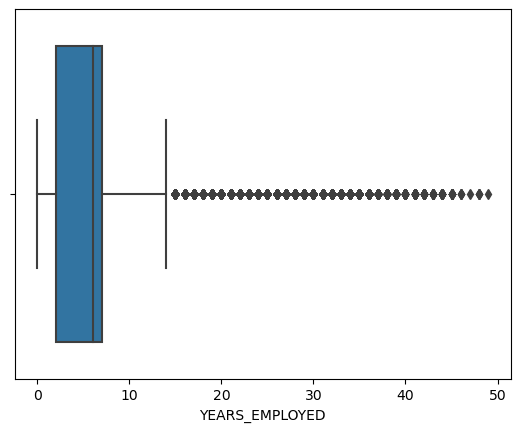

In [87]:
# We can still see the outliers in YEARS_EMPLOYED although we not need to remove these values as some applicants may work for longer years

sns.boxplot(AD1.YEARS_EMPLOYED)

In [88]:
# 8. Observation of client's social surroundings cols 

round(len(AD1.DEF_60_CNT_SOCIAL_CIRCLE.loc[AD1.DEF_60_CNT_SOCIAL_CIRCLE>2])/len(AD1.DEF_60_CNT_SOCIAL_CIRCLE)*100,2)

0.25

In [89]:
# Describing the data for Social circle cols

AD1.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [90]:
AD1.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     281742
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [91]:
AD1.DEF_60_CNT_SOCIAL_CIRCLE.median()

0.0

In [92]:
# Mean is higher than median in Observation of client's social surroundings cols. Hence imputing the ouliers with the median will not skew the data as the outliers are very small 

AD1.loc[(AD1.DEF_60_CNT_SOCIAL_CIRCLE>2), ["DEF_60_CNT_SOCIAL_CIRCLE"]] = AD1.DEF_60_CNT_SOCIAL_CIRCLE.median()
AD1.loc[(AD1.DEF_60_CNT_SOCIAL_CIRCLE>2), ["DEF_60_CNT_SOCIAL_CIRCLE"]] = AD1.DEF_60_CNT_SOCIAL_CIRCLE.median()
AD1.loc[(AD1.DEF_60_CNT_SOCIAL_CIRCLE>2), ["DEF_60_CNT_SOCIAL_CIRCLE"]] = AD1.DEF_60_CNT_SOCIAL_CIRCLE.median()
AD1.loc[(AD1.DEF_60_CNT_SOCIAL_CIRCLE>2), ["DEF_60_CNT_SOCIAL_CIRCLE"]] = AD1.DEF_60_CNT_SOCIAL_CIRCLE.median()

In [93]:
# We're checking the data for DEF_60_CNT_SOCIAL_CIRCLE after standardizing the outliers

AD1.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0    282500
1.0     21841
2.0      3170
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

<AxesSubplot:>

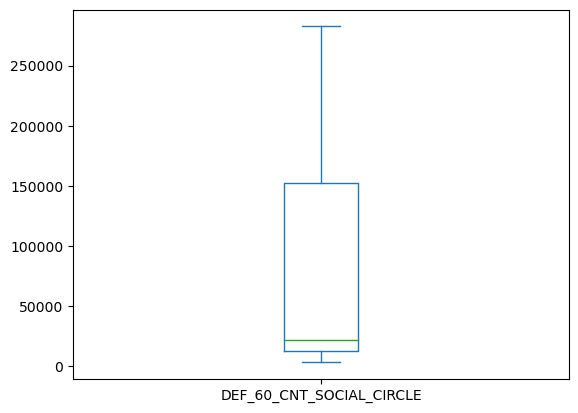

In [94]:
AD1.DEF_60_CNT_SOCIAL_CIRCLE.value_counts().plot.box()

In [95]:
AD1[["DEF_60_CNT_SOCIAL_CIRCLE"  ,
                      "OBS_30_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]].nunique()

DEF_60_CNT_SOCIAL_CIRCLE     3
OBS_30_CNT_SOCIAL_CIRCLE    33
DEF_30_CNT_SOCIAL_CIRCLE    10
OBS_60_CNT_SOCIAL_CIRCLE    33
dtype: int64

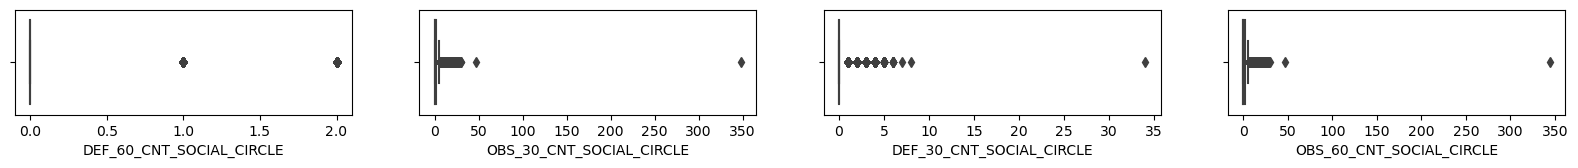

In [96]:
# After investigating and treating the outliers, and standardizing the cols

Social_circle_cols = AD1[["DEF_60_CNT_SOCIAL_CIRCLE"  ,
                      "OBS_30_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE" ]]

plt.figure(figsize=[20,15])

x = 1

plt.subplots_adjust(hspace=1.0)
for i in Social_circle_cols:
    plt.subplot(6,4,x)
    sns.boxplot(Social_circle_cols[i])
    x+=1
    
plt.show()



Observation of client's social surroundings cols : Mean is higher than median hence we are considering the median to replace the outliers for all the  Observation of client's social surroundings cols

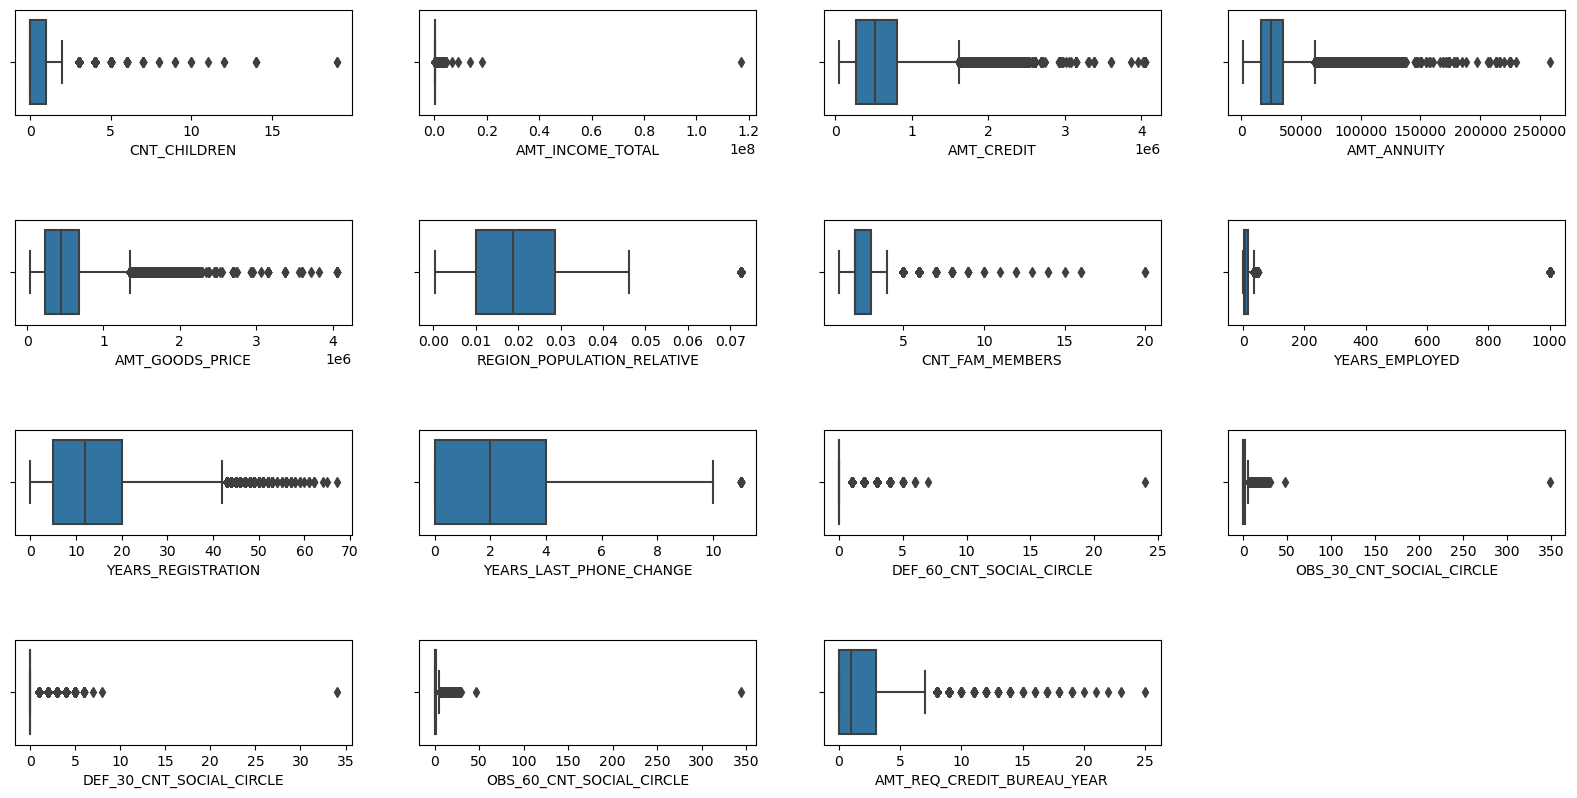

In [97]:
# After investigating and treating the outliers, and standardizing the cols

plt.figure(figsize=[20,15])

x = 1

plt.subplots_adjust(hspace=1.0)
for i in Outliers_Numer_cols:
    plt.subplot(6,4,x)
    sns.boxplot(Outliers_Numer_cols[i])
    x+=1
    
plt.show()



##### Please note that here we have not performed the outlier analysis on all the columns. Based on the below mentioned reasons we have focused on to the columns which we are going to play significant role in our analysis

### Based on the 95th, 99th quantile and box plots, we can identify the outliers for the Outliers_Numer_cols as mentioned below;
1. CNT_CHILDREN : Majority of the applicants having less than 3 children while only 0.18% applicants is having children more 3 which are the outliers. Although, we do not have to treat those outliers further as people can have more than 3 children
2. AMT_INCOME_TOTAL : Majority of the applicants have less than 337K total income which seems normal. Only 4.5% people are having above 337K income which considered as outliers but no treatment is needed as they may have more income
3. AMT_CREDIT : Majority of applicants have credited loan amount less than 1350K. Only 4.56% applicants have credited more than 1350K amount which considered as outliers. There is no need to take any action as people can credit more loan amount
4. AMT_ANNUITY : Approx 95% applicants have loan amount annuity below 53K. Applicants with above 53K amount annuity are considered as outliers as they may have higher loan amount
5. AMT_GOODS_PRICE : Applicants who have loan amount higher than 1305K are the outliers. Although, no further actions are required as they may have higher loan to pay  
6. CNT_FAM_MEMBERS  : Only 1.3% applicants have more than 4 family members which are considered as outliers. Although, there is no action needed as some applicants may have larger family
7. YEARS_EMPLOYED : 55352 Pensioners and 22 unemployed were having more than equals to 1000 years, we can replace the Pensioners years of employment with the median of Pensioners years of employment less than 1000 years, and we can consider zero years of employment for unemployed as they are smaller in number
8. AMT_REQ_CREDIT_BUREAU Cols : We can observe the outliers especially at Yearly col although we can ignore the outliers as some applicants may have more inquiries based on the loans taken

## Standardizing values for Categorical data

In [98]:
Categorical_cols = AD1[[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE' ]]

In [99]:
Categorical_cols.head()

NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0         Cash loans           M             0                1   
1         Cash loans           F             0                0   
2    Revolving loans           M             1                1   
3         Cash loans           F             0                1   
4         Cash loans           M             0                1   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0  Single / not married  House / apartment        Laborers   
1               Married  House / apartment      Core staff   
2  Single / not married  House / apartment        Laborers   
3        Civil marriage  House / apartment        Laborers   
4  Single / not married  House / apartment      Core staff   

        ORGANIZATION_TYPE  
0  Business Entity Type 3  
1                  School  
2              Government  
3  Business Entity Type 3  
4                Religion

In [100]:
# Standerdizing the categorical data

AD1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [101]:
AD1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [102]:
AD1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [103]:
AD1.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [104]:
AD1.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [105]:
AD1.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [106]:
AD1.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [107]:
AD1.OCCUPATION_TYPE.value_counts()

Others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [108]:
AD1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [109]:
# Replacing "XNA" with "Others" in AD1.ORGANIZATION_TYPE as it might skew the data. Also, 55374 data entries has been done in "XNA" so keeping it as separate category would make more sense

AD1.ORGANIZATION_TYPE = AD1.ORGANIZATION_TYPE.replace("XNA", "Others")

In [110]:
AD1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Others                    55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

### Analysis of Categorical data


In [111]:
AD1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       1.0                      0.0   
2  ...                       0.0                      0.0   
3  ...                       2.0                      0.0   
4  ...                       0.0                      0.0   

  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0                      2.0                      2.0   
1                      1.0                      0.0   
2                      0.0                      0.0   
3                      2.0                      0.0   
4                      0.0                      0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR YEARS_BIRTH  YEARS_EMPLOYED YEARS_REGISTRATION  \
0                        1.0          25               1                  9   
1                        0.0          45               3                  3   
2                        0.0          52               0                 11   
3                        0.0          52               8                 26   
4                        0.0          54               8                 11   

   YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE  
0                 5                        3  
1                 0                        2  
2                 6                        2  
3                 6                        1  
4                 9                        3  

[5 rows x 38 columns]

### Imbalance of Target Variable

In [112]:
# Analyzing the TARGET col

round(AD1.TARGET.value_counts(normalize=True)*100,0)

0    92.0
1     8.0
Name: TARGET, dtype: float64

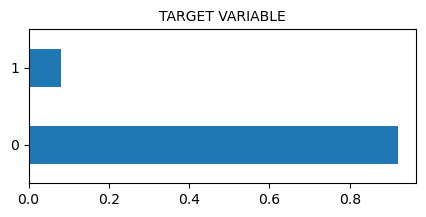

In [330]:
# Based on the bar plot, we can determine that only 8% applicants with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample while 92% applicants are the other cases
# There is a great imbalance in the data

plt.figure(figsize=[5,2])
AD1.TARGET.value_counts(normalize=True).plot.barh()

plt.title("TARGET VARIABLE",  fontdict={'fontsize': 10})
plt.show()

### Univariate Analysis

In [114]:
AD1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       1.0                      0.0   
2  ...                       0.0                      0.0   
3  ...                       2.0                      0.0   
4  ...                       0.0                      0.0   

  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0                      2.0                      2.0   
1                      1.0                      0.0   
2                      0.0                      0.0   
3                      2.0                      0.0   
4                      0.0                      0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR YEARS_BIRTH  YEARS_EMPLOYED YEARS_REGISTRATION  \
0                        1.0          25               1                  9   
1                        0.0          45               3                  3   
2                        0.0          52               0                 11   
3                        0.0          52               8                 26   
4                        0.0          54               8                 11   

   YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE  
0                 5                        3  
1                 0                        2  
2                 6                        2  
3                 6                        1  
4                 9                        3  

[5 rows x 38 columns]

In [115]:
# Splitting the df based on TARGET variable 0 and 1

TARGET_VAR_1 = AD1[AD1.TARGET == 1]
TARGET_VAR_0 = AD1[AD1.TARGET == 0]

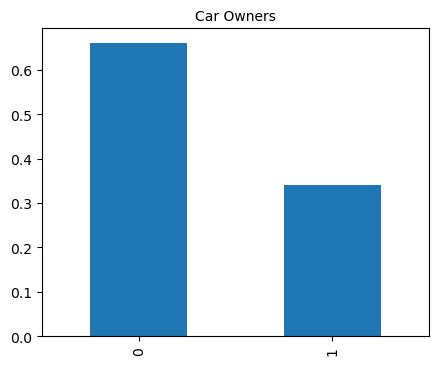

In [116]:
# FLAG_OWN_CAR analysis

plt.figure(figsize=[5,4])
AD1.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()


plt.title("Car Owners", fontdict={'fontsize': 10})
plt.show()

In [117]:
AD1.FLAG_OWN_CAR.value_counts(normalize=True)*100

0    65.989184
1    34.010816
Name: FLAG_OWN_CAR, dtype: float64

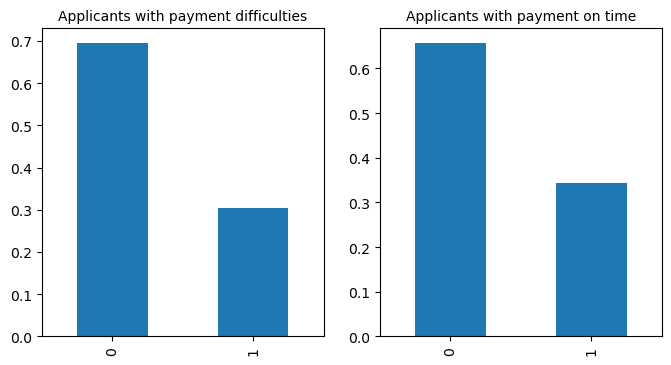

Applicants with payment difficulties
0    69.482377
1    30.517623
Name: FLAG_OWN_CAR, dtype: float64
Applicants with payment on time
0    65.682418
1    34.317582
Name: FLAG_OWN_CAR, dtype: float64


In [118]:
# Car_owner vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.FLAG_OWN_CAR.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.FLAG_OWN_CAR.value_counts(normalize=True)*100 )

##### Car_owner vs Target:
1. Majority of the applicants approx 67% (on an average) do not own the car irrespective of payment difficulties/ on time payment
2. Majority of the applicants who does not have cars, facing slightly more difficulty in payment than all the other cases

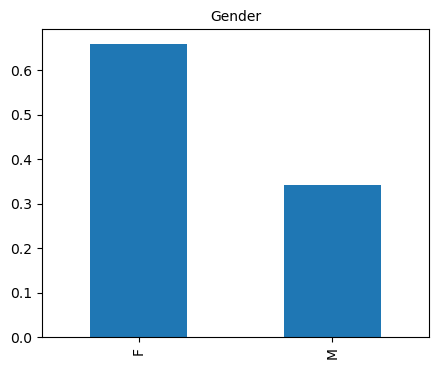

In [119]:
# CODE_GENDER analysis

plt.figure(figsize=[5,4])
AD1.CODE_GENDER.value_counts(normalize=True).plot.bar()


plt.title("Gender", fontdict={'fontsize': 10})
plt.show()

In [120]:
# ~65% applicants are female based on the analysis

AD1.CODE_GENDER.value_counts(normalize=True)*100

F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64

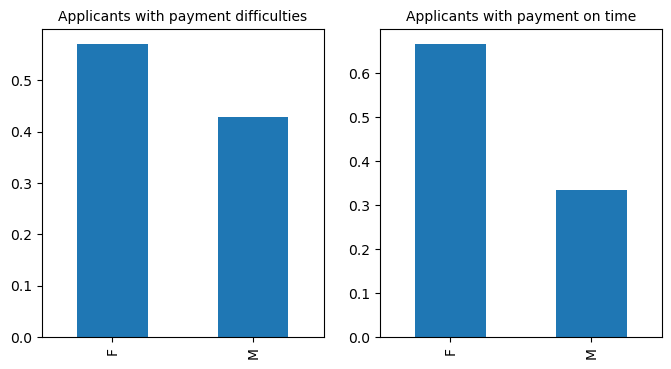

Applicants with payment difficulties
F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64
Applicants with payment on time
F    66.604643
M    33.395357
Name: CODE_GENDER, dtype: float64


In [121]:
# CODE_GENDER vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.CODE_GENDER.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.CODE_GENDER.value_counts(normalize=True)*100 )

##### Code_Gender vs Target:
1. Majority of the applicants approx 65% are female at overall level
2. Majority of the female applicants are regular on payments while male applicants finding difficulties with payments

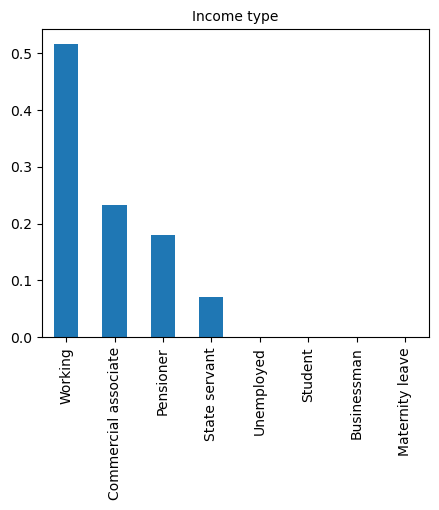

In [122]:
# NAME_INCOME_TYPE analysis

plt.figure(figsize=[5,4])
AD1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()


plt.title("Income type", fontdict={'fontsize': 10})
plt.show()

In [123]:
# ~52% applicants are working based on the analysis

AD1.NAME_INCOME_TYPE.value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

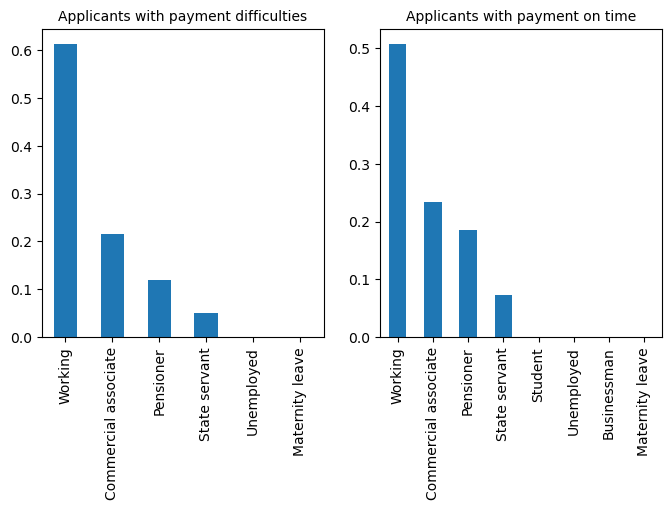

Applicants with payment difficulties
Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64
Applicants with payment on time
Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64


In [124]:
# NAME_INCOME_TYPE vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.NAME_INCOME_TYPE.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.NAME_INCOME_TYPE.value_counts(normalize=True)*100 )

##### NAME_TYPE_SUITE vs Target:
1. Majority of the applicants in range of 50 to 60% are working
2. Majority of the working applicants facing difficulties with payments while Commercial associate and Pensioners are able to pay on time

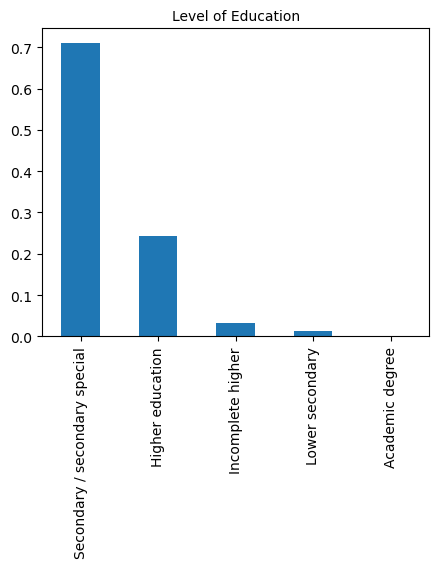

In [125]:
# NAME_EDUCATION_TYPE analysis

plt.figure(figsize=[5,4])
AD1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()


plt.title("Level of Education", fontdict={'fontsize': 10})
plt.show()

In [126]:
# ~71% applicants achieved Secondary / secondary special level of education based on the analysis

AD1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64

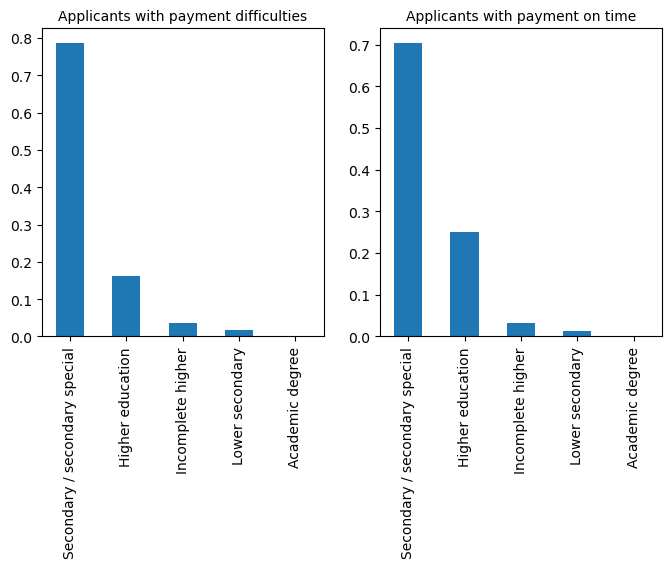

Applicants with payment difficulties
Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64
Applicants with payment on time
Secondary / secondary special    70.349080
Higher education                 25.064559
Incomplete higher                 3.327013
Lower secondary                   1.202394
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64


In [127]:
# NAME_EDUCATION_TYPE vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100 )

##### NAME_EDUCATION_TYPE vs Target:
1. Majority of the applicants achieved Secondary / secondary special level of education
2. Majority of the working applicants who achieved Secondary / secondary special level of education facing difficulties with payments while applicants with Higher education level are able to pay on time

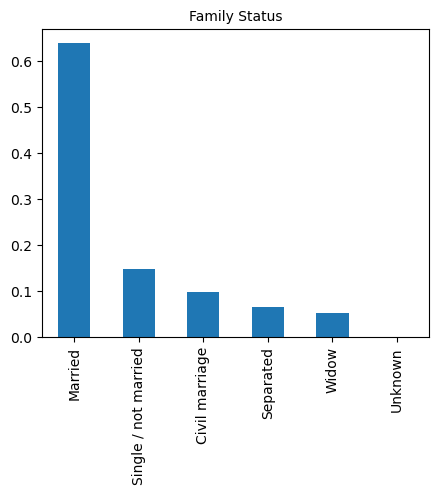

In [128]:
# NAME_FAMILY_STATUS analysis

plt.figure(figsize=[5,4])
AD1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()


plt.title("Family Status", fontdict={'fontsize': 10})
plt.show()

In [129]:
# ~63% applicants are married based on the analysis

AD1.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

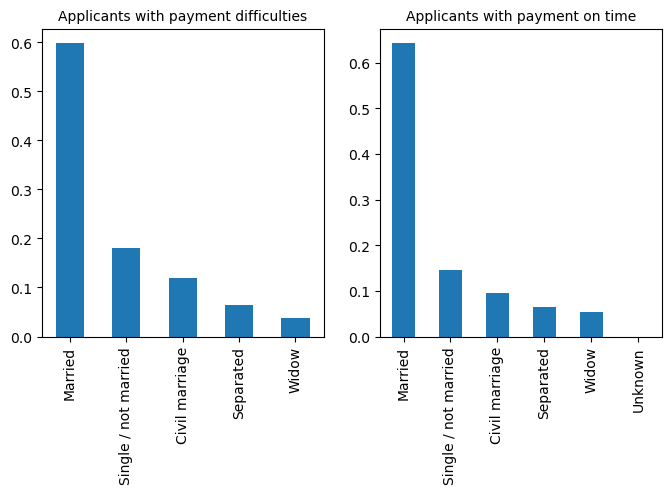

Applicants with payment difficulties
Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: NAME_FAMILY_STATUS, dtype: float64
Applicants with payment on time
Married                 64.234522
Single / not married    14.499126
Civil marriage           9.485436
Separated                6.420551
Widow                    5.359657
Unknown                  0.000707
Name: NAME_FAMILY_STATUS, dtype: float64


In [130]:
# NAME_FAMILY_STATUS vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.NAME_FAMILY_STATUS.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.NAME_FAMILY_STATUS.value_counts(normalize=True)*100 )

##### NAME_FAMILY_STATUS vs Target:
1. Majority of the applicants are married
2. Majority of the married applicants are able to pay on time while single applicants facing difficulties with payments

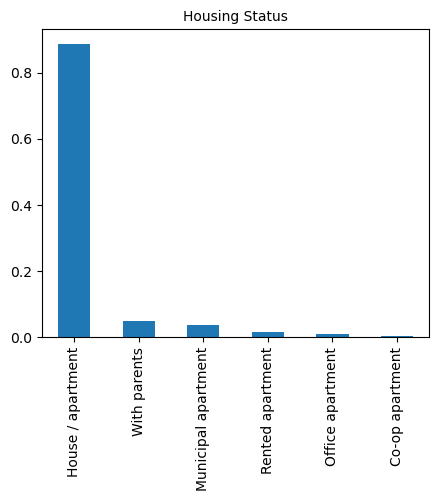

In [131]:
# NAME_HOUSING_TYPE analysis

plt.figure(figsize=[5,4])
AD1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()


plt.title("Housing Status", fontdict={'fontsize': 10})
plt.show()

In [132]:
# ~89% applicants own a house or apartment based on the analysis

AD1.NAME_HOUSING_TYPE.value_counts(normalize=True)*100

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64

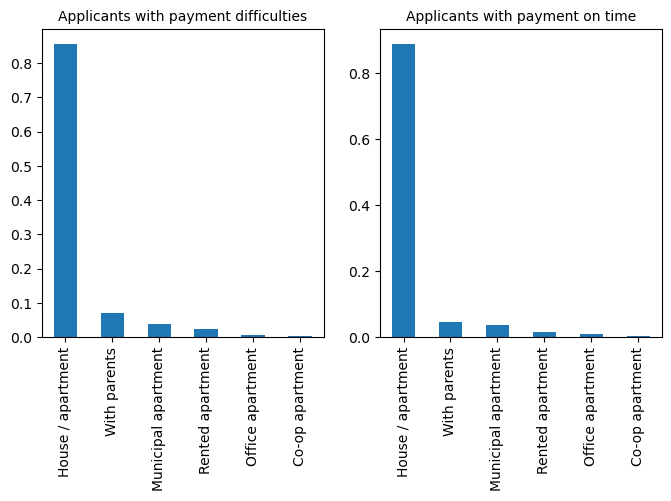

Applicants with payment difficulties
House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: NAME_HOUSING_TYPE, dtype: float64
Applicants with payment on time
House / apartment      89.001931
With parents            4.635532
Municipal apartment     3.618149
Rented apartment        1.514047
Office apartment        0.864917
Co-op apartment         0.365423
Name: NAME_HOUSING_TYPE, dtype: float64


In [133]:
# NAME_HOUSING_TYPE vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.NAME_HOUSING_TYPE.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.NAME_HOUSING_TYPE.value_counts(normalize=True)*100 )

##### NAME_HOUSING_TYPE vs Target:
1. Majority of the applicants own a house or apartment
2. Majority of the applicants who own the house/apartments are able to pay on time while the applicants who are staying with their parents are facing slightly more difficulties with payments

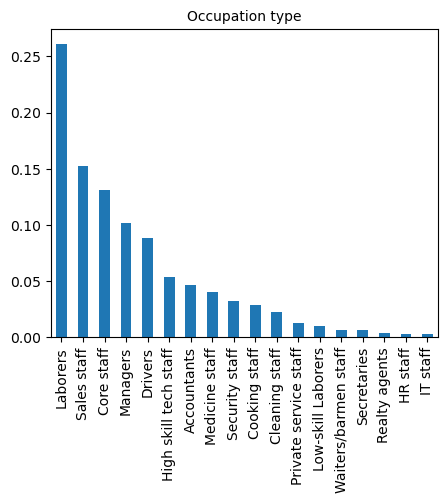

In [134]:
# OCCUPATION_TYPE analysis

plt.figure(figsize=[5,4])
AD1.loc[(AD1.OCCUPATION_TYPE!="Others"), "OCCUPATION_TYPE"].value_counts(normalize=True).plot.bar()


plt.title("Occupation type", fontdict={'fontsize': 10})
plt.show()

In [135]:
# Majority of applicants are Laborers followed by Sales staff and Core staff based on the analysis

AD1.loc[(AD1.OCCUPATION_TYPE!="Others"), "OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

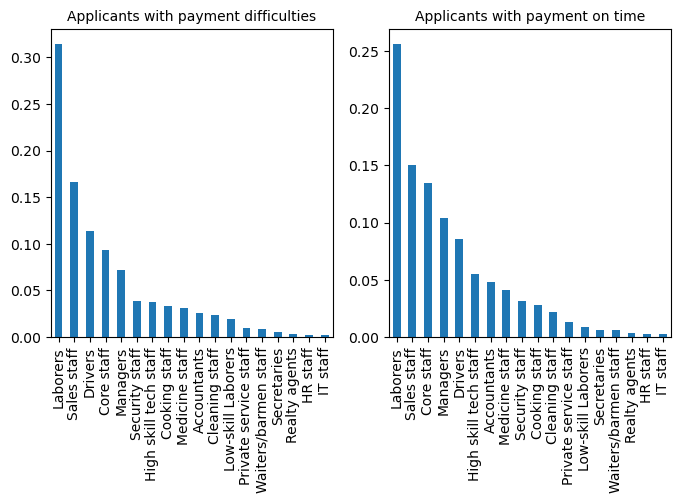

Applicants with payment difficulties
Laborers                 31.476789
Sales staff              16.671160
Drivers                  11.360328
Core staff                9.370788
Managers                  7.160188
Security staff            3.892813
High skill tech staff     3.779587
Cooking staff             3.348250
Medicine staff            3.084057
Accountants               2.555669
Cleaning staff            2.410093
Low-skill Laborers        1.935623
Private service staff     0.943549
Waiters/barmen staff      0.819540
Secretaries               0.496037
Realty agents             0.318111
HR staff                  0.194101
IT staff                  0.183318
Name: OCCUPATION_TYPE, dtype: float64
Applicants with payment on time
Laborers                 25.625607
Sales staff              15.064417
Core staff               13.414134
Managers                 10.408001
Drivers                   8.566102
High skill tech staff     5.545430
Accountants               4.849590
Medicine staff    

In [136]:
# OCCUPATION_TYPE vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.loc[(TARGET_VAR_1.OCCUPATION_TYPE!="Others"), "OCCUPATION_TYPE"].value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.loc[(TARGET_VAR_0.OCCUPATION_TYPE!="Others"), "OCCUPATION_TYPE"].value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.loc[(TARGET_VAR_1.OCCUPATION_TYPE!="Others"), "OCCUPATION_TYPE"].value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.loc[(TARGET_VAR_0.OCCUPATION_TYPE!="Others"), "OCCUPATION_TYPE"].value_counts(normalize=True)*100 )

##### OCCUPATION_TYPE vs Target:
1. Majority of applicants are Laborers followed by Sales staff and Core staff
2. Laborers and Sales staff applicants are facing slightly more difficulties with payments than all the other cases

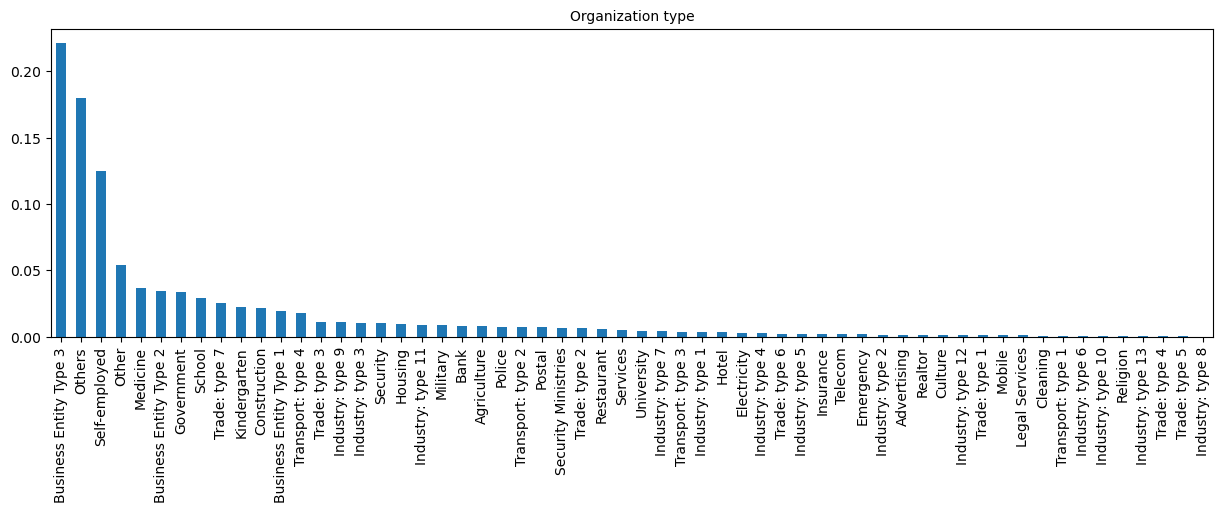

In [137]:
# ORGANIZATION_TYPE analysis

plt.figure(figsize=[15,4])
AD1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()


plt.title("Organization type", fontdict={'fontsize': 10})
plt.show()

In [138]:
# Majority of applicant's organization type is Business Entity Type 3 followed by Self-employed applicants

AD1.ORGANIZATION_TYPE.value_counts(normalize=True).head()*100

Business Entity Type 3    22.110429
Others                    18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Name: ORGANIZATION_TYPE, dtype: float64

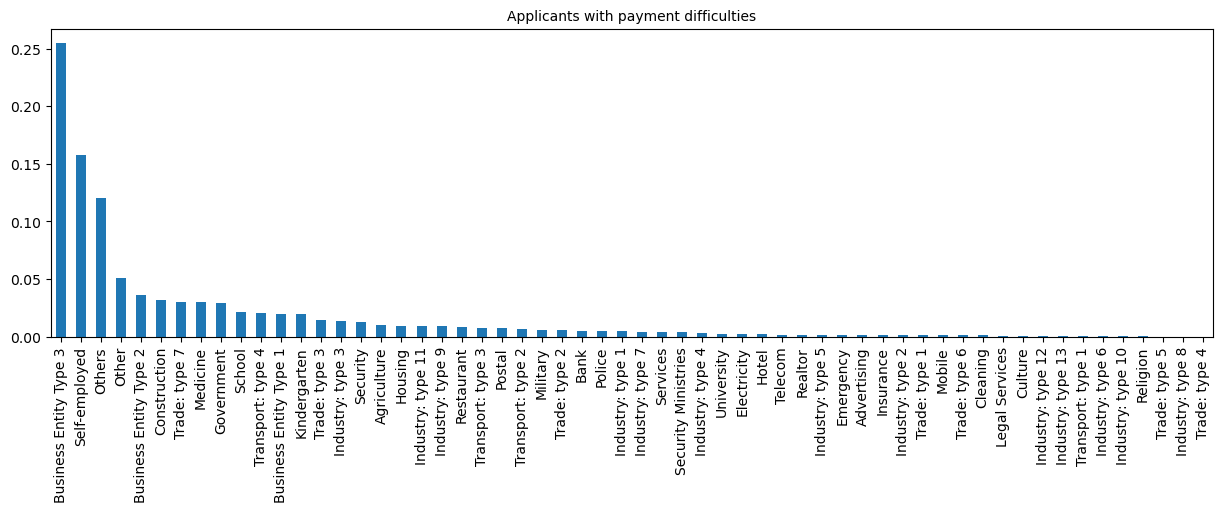

Applicants with payment difficulties
Business Entity Type 3    25.470292
Self-employed             15.742195
Others                    12.044310
Other                      5.135952
Business Entity Type 2     3.625378
Name: ORGANIZATION_TYPE, dtype: float64


In [139]:
# OCCUPATION_TYPE vs Target

plt.figure(figsize=[15,4])

TARGET_VAR_1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})


plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.ORGANIZATION_TYPE.value_counts(normalize=True).head()*100 )


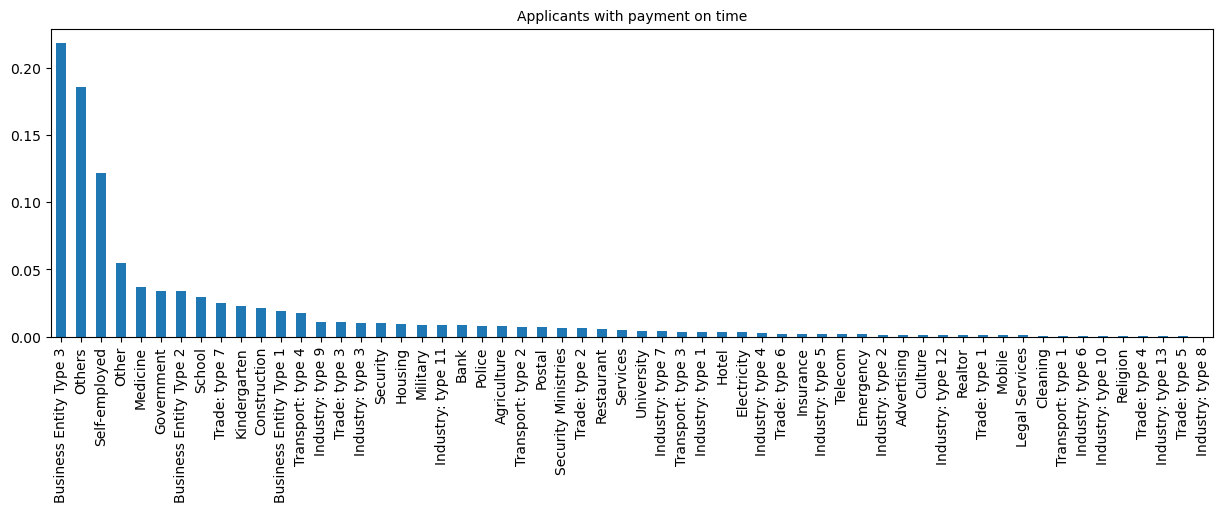

Applicants with payment on time
Business Entity Type 3    21.815371
Others                    18.530808
Self-employed             12.205769
Other                      5.450571
Medicine                   3.698804
Name: ORGANIZATION_TYPE, dtype: float64


In [140]:
# OCCUPATION_TYPE vs Target

plt.figure(figsize=[15,4])


TARGET_VAR_0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()


print("Applicants with payment on time")
print(TARGET_VAR_0.ORGANIZATION_TYPE.value_counts(normalize=True).head()*100 )

##### OCCUPATION_TYPE vs Target:
1. Majority of applicants' organization type is Business Entity Type 3 followed by Self-employed
2. Business Entity Type 3 and Self-employed applicants are facing slightly more difficulties with payments than all the other cases

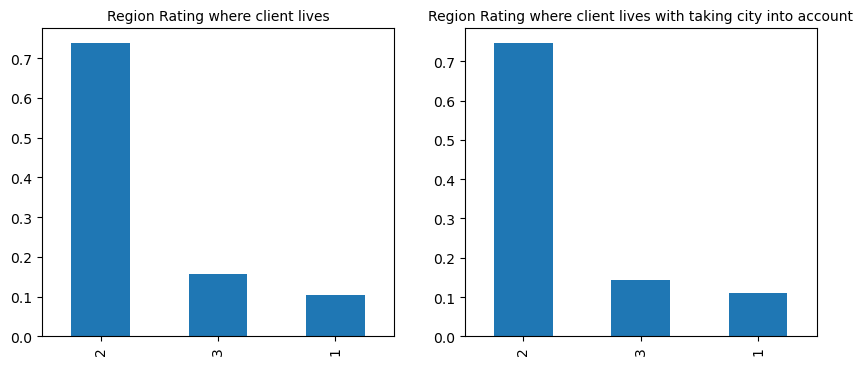

In [141]:
# REGION_RATING_CLIENT / REGION_RATING_CLIENT_W_CITY analysis

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
AD1.REGION_RATING_CLIENT.value_counts(normalize=True).plot.bar()
plt.title("Region Rating where client lives", fontdict={'fontsize': 10})

plt.subplot(1,2,2)
AD1.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.bar()
plt.title("Region Rating where client lives with taking city into account", fontdict={'fontsize': 10})

plt.show()

In [142]:
# Majority applicants irrespective of where they are living, 2 is the higher rated region based on the analysis

print("Region Rating where client lives")
print(AD1.REGION_RATING_CLIENT.value_counts(normalize=True)*100)

print("Region Rating where client lives with taking city into account")
print(AD1.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True)*100)

Region Rating where client lives
2    73.813294
3    15.716511
1    10.470195
Name: REGION_RATING_CLIENT, dtype: float64
Region Rating where client lives with taking city into account
2    74.626274
3    14.262904
1    11.110822
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


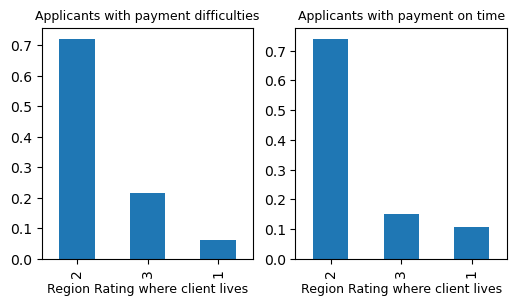

Applicants with payment difficulties
2    72.132931
3    21.615307
1     6.251762
Name: REGION_RATING_CLIENT, dtype: float64
Applicants with payment on time
2    73.960861
3    15.198489
1    10.840650
Name: REGION_RATING_CLIENT, dtype: float64


In [143]:
# REGION_RATING_CLIENT vs Target

plt.figure(figsize=[6,3])
plt.subplots_adjust(hspace=0.9)
plt.subplot(1,2,1)
TARGET_VAR_1.REGION_RATING_CLIENT.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 9})
plt.xlabel("Region Rating where client lives",  fontdict={'fontsize': 9})

plt.subplot(1,2,2)
TARGET_VAR_0.REGION_RATING_CLIENT.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 9})
plt.xlabel("Region Rating where client lives",  fontdict={'fontsize': 9})


plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.REGION_RATING_CLIENT.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.REGION_RATING_CLIENT.value_counts(normalize=True)*100 )

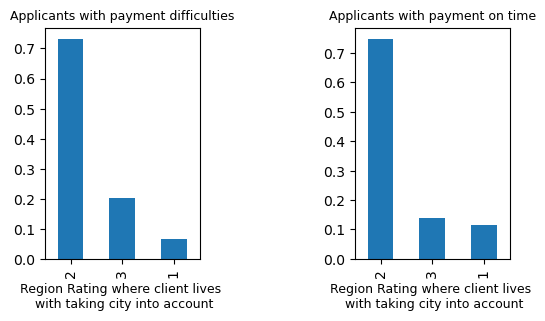

Applicants with payment difficulties
2    73.192346
3    20.145015
1     6.662638
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
Applicants with payment on time
2    74.752199
3    13.746348
1    11.501454
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


In [144]:
# REGION_RATING_CLIENT_W_CITY vs Target

plt.figure(figsize=[6,3])
plt.subplots_adjust(hspace=0.9, wspace= 1.0)
plt.subplot(1,2,1)
TARGET_VAR_1.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 9})
plt.xlabel("Region Rating where client lives \n with taking city into account",  fontdict={'fontsize': 9})

plt.subplot(1,2,2)
TARGET_VAR_0.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 9})
plt.xlabel("Region Rating where client lives \n with taking city into account",  fontdict={'fontsize': 9})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True)*100 )

##### REGION_RATING_CLIENT / REGION_RATING_CLIENT_W_CITY vs Target:
1. Majority applicants irrespective of where they are living, 2 is the higher rated region
2. Applicants staying in region 3 has rated slightly more and have payment difficulties and the obsereved while considering region rating with city

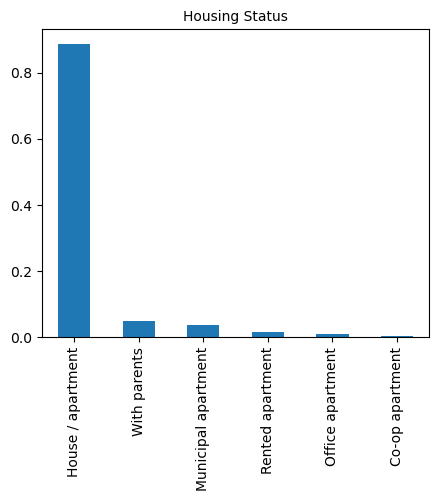

In [145]:
# NAME_HOUSING_TYPE analysis

plt.figure(figsize=[5,4])
AD1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()


plt.title("Housing Status", fontdict={'fontsize': 10})
plt.show()

In [146]:
# ~89% applicants own a house or apartment based on the analysis

AD1.NAME_HOUSING_TYPE.value_counts(normalize=True)*100

House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: NAME_HOUSING_TYPE, dtype: float64

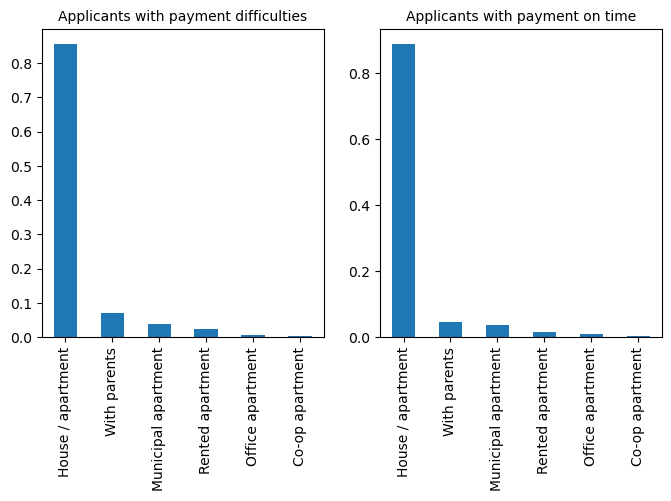

Applicants with payment difficulties
House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: NAME_HOUSING_TYPE, dtype: float64
Applicants with payment on time
House / apartment      89.001931
With parents            4.635532
Municipal apartment     3.618149
Rented apartment        1.514047
Office apartment        0.864917
Co-op apartment         0.365423
Name: NAME_HOUSING_TYPE, dtype: float64


In [147]:
# NAME_HOUSING_TYPE vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.NAME_HOUSING_TYPE.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.NAME_HOUSING_TYPE.value_counts(normalize=True)*100 )

##### NAME_HOUSING_TYPE vs Target:
1. Majority of the applicants own a house or apartment
2. Majority of the applicants who own the house/apartments are able to pay on time while the applicants who are staying with their parents are facing slightly more difficulties with payments

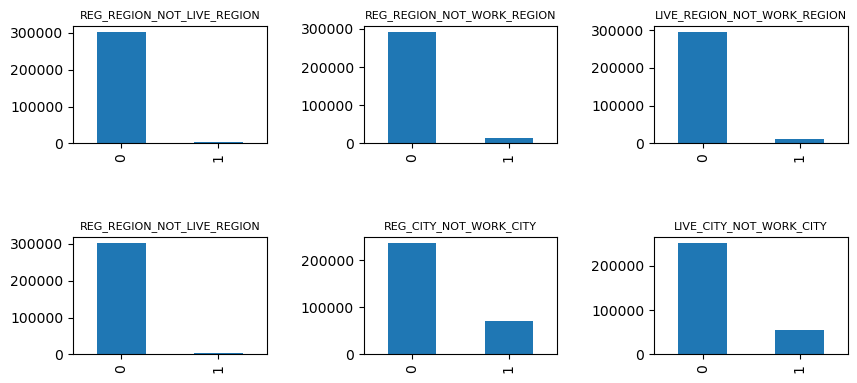

In [148]:
# Add_not_match_REGION_level analysis

Address_cols = ["REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
                "REG_REGION_NOT_LIVE_REGION", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY"]

x=1

plt.figure(figsize=[10,7])
plt.subplots_adjust(wspace=0.5, hspace=0.8)
for i in Address_cols:
    plt.subplot(3,3,x)
    AD1[i].value_counts().plot.bar()
    plt.title(i, fontdict= {'fontsize': 8 })
   
    x+=1
    
plt.show()

In [149]:
# Based on analysis on Address_cols, we can observe that the client's permanent address is same with the contact address at both reregion and city level

for i in Address_cols:
    print(f"{i}")
    print(AD1[i].value_counts(normalize=True)*100)

REG_REGION_NOT_LIVE_REGION
0    98.485583
1     1.514417
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
REG_REGION_NOT_WORK_REGION
0    94.923108
1     5.076892
Name: REG_REGION_NOT_WORK_REGION, dtype: float64
LIVE_REGION_NOT_WORK_REGION
0    95.934129
1     4.065871
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64
REG_REGION_NOT_LIVE_REGION
0    98.485583
1     1.514417
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
REG_CITY_NOT_WORK_CITY
0    76.954646
1    23.045354
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
LIVE_CITY_NOT_WORK_CITY
0    82.044545
1    17.955455
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


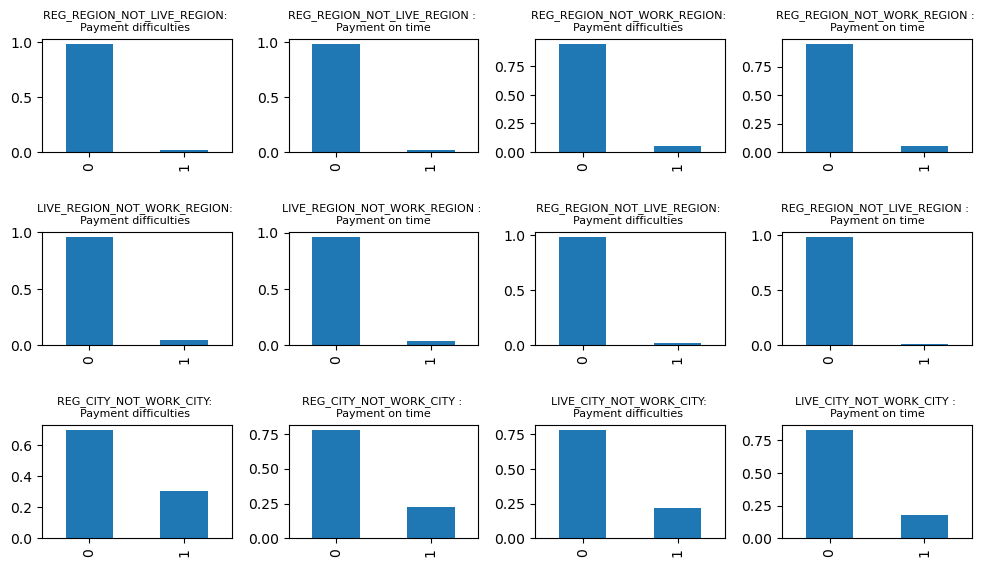

In [150]:
# Address_cols vs Target

x= 1

plt.figure(figsize=[12,9])
plt.subplots_adjust(hspace=0.7, wspace=0.3)

for i in Address_cols:
    plt.subplot(4,4,x)
    TARGET_VAR_1[i].value_counts(normalize=True).plot.bar()
    plt.title(f"{i}: \nPayment difficulties ", fontdict= {'fontsize': 8 })
    
    plt.subplot(4,4,x+1)
    TARGET_VAR_0[i].value_counts(normalize=True).plot.bar()
    plt.title(f"{i} : \nPayment on time", fontdict= {'fontsize': 8 })
    
    x+=2
    
plt.show()
    


##### Address_cols vs Target:
1. Majority of the client's permanent address is same with the contact address at both reregion and city level

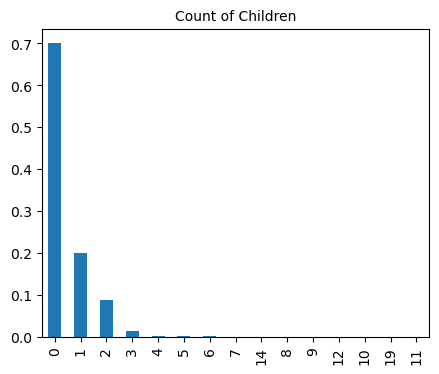

In [151]:
# CNT_CHILDREN analysis

plt.figure(figsize=[5,4])
AD1.CNT_CHILDREN.value_counts(normalize=True).plot.bar()


plt.title("Count of Children", fontdict={'fontsize': 10})
plt.show()

In [152]:
AD1.CNT_CHILDREN.value_counts(normalize=True)*100

0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
12     0.000650
10     0.000650
19     0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64

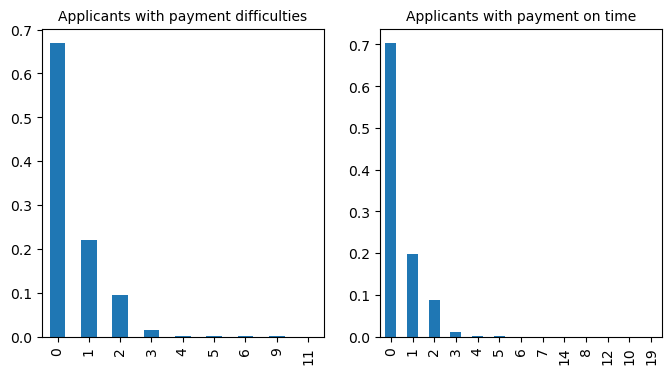

Applicants with payment difficulties
0     66.904330
1     21.969789
2      9.397784
3      1.442095
4      0.221551
5      0.028197
6      0.024169
9      0.008056
11     0.004028
Name: CNT_CHILDREN, dtype: float64
Applicants with payment on time
0     70.311936
1     19.691460
2      8.637145
3      1.188244
4      0.132302
5      0.027239
6      0.005306
7      0.002476
14     0.001061
8      0.000707
12     0.000707
10     0.000707
19     0.000707
Name: CNT_CHILDREN, dtype: float64


In [153]:
# CNT_CHILDREN vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.CNT_CHILDREN.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.CNT_CHILDREN.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.CNT_CHILDREN.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.CNT_CHILDREN.value_counts(normalize=True)*100 )

##### CNT_CHILDREN vs Target:
1. Majority of the applicants have no children
2. Majority of the applicants who does not have any children are bale to pay on time, while applicants who have 1 or 2 children are facing slightly more difficulty in payment than all the other cases

In [154]:
# Analyzing AMT_INCOME_TOTAL col

AD1.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [155]:
# Creating bins for AMT_INCOME_TOTAL col to analyze it categorically

AD1["Income_BINS"]= pd.cut(AD1.AMT_INCOME_TOTAL, [0,100000,200000, 300000, 400000 , 500000 , 600000 , 700000 , 800000 , 900000 ,1000000 ,100000000 ],
                              labels=["<100K","100-200K","200-300K","300-400K", "400-500K", "500-600K", "600-700K", 
                                      "700-800K", "800-900K", "900-1000K", ">1M"])

TARGET_VAR_1["Income_BINS"]= pd.cut(TARGET_VAR_1.AMT_INCOME_TOTAL, [0,100000,200000, 300000, 400000 , 500000 , 600000 , 700000 , 800000 , 900000 ,1000000 ,100000000 ],
                              labels=["<100K","100-200K","200-300K","300-400K", "400-500K", "500-600K", "600-700K", 
                                      "700-800K", "800-900K", "900-1000K", ">1M"])

TARGET_VAR_0["Income_BINS"]= pd.cut(TARGET_VAR_0.AMT_INCOME_TOTAL, [0,100000,200000, 300000, 400000 , 500000 , 600000 , 700000 , 800000 , 900000 ,1000000 ,100000000 ],
                              labels=["<100K","100-200K","200-300K","300-400K", "400-500K", "500-600K", "600-700K", 
                                      "700-800K", "800-900K", "900-1000K", ">1M"])

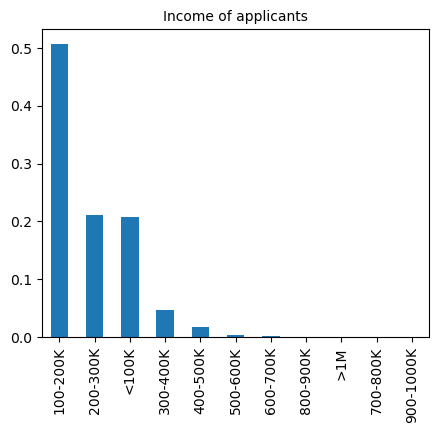

In [156]:
# AMT_INCOME_TOTAL analysis

plt.figure(figsize=[5,4])
AD1.Income_BINS.value_counts(normalize=True).plot.bar()


plt.title("Income of applicants", fontdict={'fontsize': 10})
plt.show()

In [157]:
AD1.Income_BINS.value_counts(normalize=True)*100

100-200K     50.696888
200-300K     21.194758
<100K        20.714123
300-400K      4.772528
400-500K      1.743358
500-600K      0.356086
600-700K      0.282592
800-900K      0.096907
>1M           0.080973
700-800K      0.052681
900-1000K     0.009105
Name: Income_BINS, dtype: float64

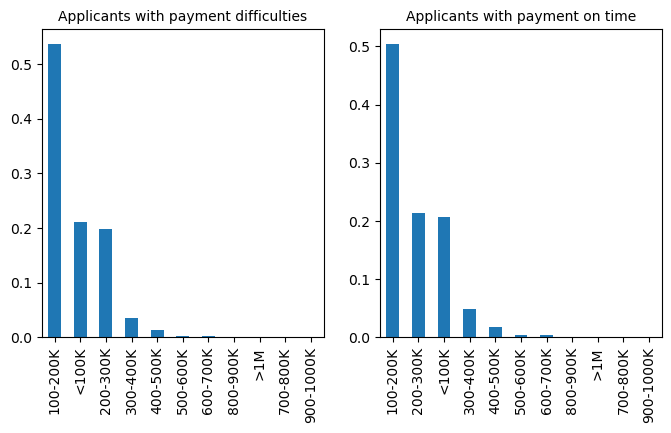

Applicants with payment difficulties
100-200K     53.681921
<100K        21.048179
200-300K     19.823558
300-400K      3.565098
400-500K      1.297132
500-600K      0.277957
600-700K      0.169191
800-900K      0.068482
>1M           0.048340
700-800K      0.012085
900-1000K     0.008057
Name: Income_BINS, dtype: float64
Applicants with payment on time
100-200K     50.434758
200-300K     21.315169
<100K        20.684788
300-400K      4.878558
400-500K      1.782543
500-600K      0.362947
600-700K      0.292551
800-900K      0.099404
>1M           0.083839
700-800K      0.056246
900-1000K     0.009197
Name: Income_BINS, dtype: float64


In [158]:
# AMT_INCOME_TOTAL vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.Income_BINS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.Income_BINS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.Income_BINS.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.Income_BINS.value_counts(normalize=True)*100 )

##### AMT_INCOME_TOTAL vs Target:
1. Majority of the applicants have income in range of 100 to 200K
2. Majority of the applicants who have below 200K income are facing slightly more difficulty in payment than all the other cases. Applicants with 200 to 300K income are able to pay on time

In [159]:
# Analyzing AMT_CREDIT col

AD1.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [160]:
# Creating bins for AMT_CREDIT col to analyze it categorically

AD1["Credit_BINS"] =     pd.cut(AD1.AMT_CREDIT, [0,100000,400000, 800000, 1200000 , 1600000 , 2000000 , 2400000 , 2800000 , 3200000 ,
                                                  3600000 ,4000000000 ],
                              labels=["<100K","100-400K","400-800K","800-1200K", "1200-1600K", "1600-2000K", "2000-2400K", 
                                      "2400-2800K", "2800-3200K", "3200-3600K", ">3600K"])

TARGET_VAR_1["Credit_BINS"]= pd.cut(TARGET_VAR_1.AMT_CREDIT, [0,100000,400000, 800000, 1200000 , 1600000 , 2000000 , 2400000 , 2800000 , 3200000 ,
                                                  3600000 ,4000000000 ],
                              labels=["<100K","100-400K","400-800K","800-1200K", "1200-1600K", "1600-2000K", "2000-2400K", 
                                      "2400-2800K", "2800-3200K", "3200-3600K", ">3600K"])

TARGET_VAR_0["Credit_BINS"]= pd.cut(TARGET_VAR_0.AMT_CREDIT, [0,100000,400000, 800000, 1200000 , 1600000 , 2000000 , 2400000 , 2800000 , 3200000 ,
                                                  3600000 ,4000000000 ],
                              labels=["<100K","100-400K","400-800K","800-1200K", "1200-1600K", "1600-2000K", "2000-2400K", 
                                      "2400-2800K", "2800-3200K", "3200-3600K", ">3600K"])

In [161]:
AD1.AMT_CREDIT[:10]

0     406597.5
1    1293502.5
2     135000.0
3     312682.5
4     513000.0
5     490495.5
6    1560726.0
7    1530000.0
8    1019610.0
9     405000.0
Name: AMT_CREDIT, dtype: float64

In [162]:
AD1.Credit_BINS[:10]

0      400-800K
1    1200-1600K
2      100-400K
3      100-400K
4      400-800K
5      400-800K
6    1200-1600K
7    1200-1600K
8     800-1200K
9      400-800K
Name: Credit_BINS, dtype: category
Categories (11, object): ['<100K' < '100-400K' < '400-800K' < '800-1200K' ... '2400-2800K' < '2800-3200K' < '3200-3600K' < '>3600K']

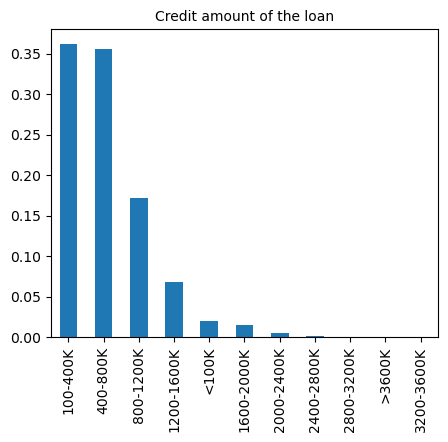

In [163]:
# AMT_CREDIT analysis

plt.figure(figsize=[5,4])
AD1.Credit_BINS.value_counts(normalize=True).plot.bar()


plt.title("Credit amount of the loan", fontdict={'fontsize': 10})
plt.show()

In [164]:
AD1.Credit_BINS.value_counts(normalize=True)*100

100-400K      36.190900
400-800K      35.612385
800-1200K     17.184751
1200-1600K     6.881380
<100K          1.952450
1600-2000K     1.518320
2000-2400K     0.504697
2400-2800K     0.141133
2800-3200K     0.007479
>3600K         0.003902
3200-3600K     0.002602
Name: Credit_BINS, dtype: float64

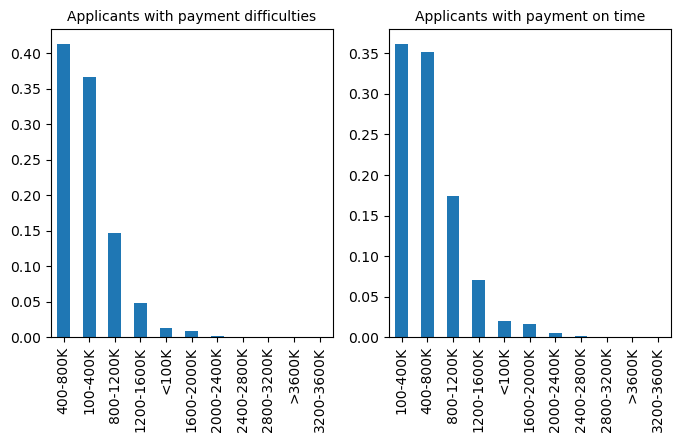

Applicants with payment difficulties
400-800K      41.317221
100-400K      36.668681
800-1200K     14.743202
1200-1600K     4.809668
<100K          1.333333
1600-2000K     0.862034
2000-2400K     0.201410
2400-2800K     0.052367
2800-3200K     0.008056
>3600K         0.004028
3200-3600K     0.000000
Name: Credit_BINS, dtype: float64
Applicants with payment on time
100-400K      36.148943
400-800K      35.111396
800-1200K     17.399164
1200-1600K     7.063314
<100K          2.006820
1600-2000K     1.575954
2000-2400K     0.531332
2400-2800K     0.148928
2800-3200K     0.007429
>3600K         0.003891
3200-3600K     0.002830
Name: Credit_BINS, dtype: float64


In [165]:
# AMT_CREDIT vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.Credit_BINS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.Credit_BINS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.Credit_BINS.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.Credit_BINS.value_counts(normalize=True)*100 )

##### AMT_CREDIT vs Target:
1. Majority of the applicants have credited the loan amount in range of 100 to 400K
2. Majority of the applicants who have credited the amount between 400K-800K are facing slightly more difficulty in payment than all the other cases. Applicants with 800 to 1200K credited amount are able to pay on time. There is no significant difference observed for the group of applicant who have credited 100 to 400K

In [166]:
AD1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE',
       'Income_BINS', 'Credit_BINS'],
      dtype='object')

In [167]:
# Analyzing AMT_GOODS_PRICE col

AD1.AMT_GOODS_PRICE.describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [168]:
# Creating bins for AMT_GOODS_PRICE col to analyze it categorically

AD1["Goods_Price_BINS"] =     pd.cut(AD1.AMT_GOODS_PRICE, [0,100000,400000, 800000, 1200000 , 1600000 , 2000000 , 2400000 , 2800000 , 3200000 ,
                                                  3600000 ,4000000000 ],
                              labels=["<100K","100-400K","400-800K","800-1200K", "1200-1600K", "1600-2000K", "2000-2400K", 
                                      "2400-2800K", "2800-3200K", "3200-3600K", ">3600K"])

TARGET_VAR_1["Goods_Price_BINS"]= pd.cut(TARGET_VAR_1.AMT_GOODS_PRICE, [0,100000,400000, 800000, 1200000 , 1600000 , 2000000 , 2400000 , 2800000 , 3200000 ,
                                                  3600000 ,4000000000 ],
                              labels=["<100K","100-400K","400-800K","800-1200K", "1200-1600K", "1600-2000K", "2000-2400K", 
                                      "2400-2800K", "2800-3200K", "3200-3600K", ">3600K"])

TARGET_VAR_0["Goods_Price_BINS"]= pd.cut(TARGET_VAR_0.AMT_GOODS_PRICE, [0,100000,400000, 800000, 1200000 , 1600000 , 2000000 , 2400000 , 2800000 , 3200000 ,
                                                  3600000 ,4000000000 ],
                              labels=["<100K","100-400K","400-800K","800-1200K", "1200-1600K", "1600-2000K", "2000-2400K", 
                                      "2400-2800K", "2800-3200K", "3200-3600K", ">3600K"])

In [169]:
AD1.AMT_GOODS_PRICE[:10]

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
5     454500.0
6    1395000.0
7    1530000.0
8     913500.0
9     405000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [170]:
AD1.Goods_Price_BINS[:10]

0      100-400K
1     800-1200K
2      100-400K
3      100-400K
4      400-800K
5      400-800K
6    1200-1600K
7    1200-1600K
8     800-1200K
9      400-800K
Name: Goods_Price_BINS, dtype: category
Categories (11, object): ['<100K' < '100-400K' < '400-800K' < '800-1200K' ... '2400-2800K' < '2800-3200K' < '3200-3600K' < '>3600K']

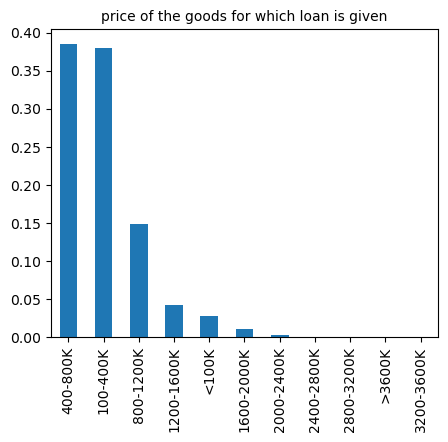

In [171]:
# AMT_GOODS_PRICE analysis

plt.figure(figsize=[5,4])
AD1.Goods_Price_BINS.value_counts(normalize=True).plot.bar()


plt.title("price of the goods for which loan is given", fontdict={'fontsize': 10})
plt.show()

In [172]:
AD1.Goods_Price_BINS.value_counts(normalize=True)*100

400-800K      38.535857
100-400K      38.026607
800-1200K     14.881419
1200-1600K     4.292529
<100K          2.832094
1600-2000K     1.076059
2000-2400K     0.334297
2400-2800K     0.009756
2800-3200K     0.005528
>3600K         0.003252
3200-3600K     0.002602
Name: Goods_Price_BINS, dtype: float64

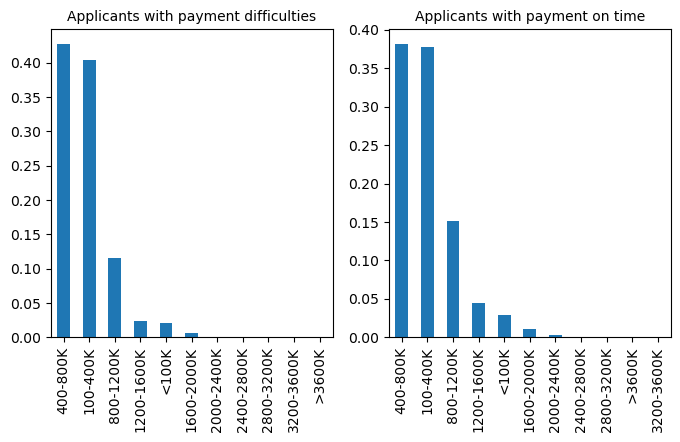

Applicants with payment difficulties
400-800K      42.763343
100-400K      40.471299
800-1200K     11.516616
1200-1600K     2.445116
<100K          2.118832
1600-2000K     0.567976
2000-2400K     0.100705
2400-2800K     0.008056
2800-3200K     0.004028
3200-3600K     0.004028
>3600K         0.000000
Name: Goods_Price_BINS, dtype: float64
Applicants with payment on time
400-800K      38.164607
100-400K      37.811919
800-1200K     15.176910
1200-1600K     4.454766
<100K          2.894731
1600-2000K     1.120678
2000-2400K     0.354811
2400-2800K     0.009905
2800-3200K     0.005660
>3600K         0.003537
3200-3600K     0.002476
Name: Goods_Price_BINS, dtype: float64


In [173]:
# AMT_GOODS_PRICE vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.Goods_Price_BINS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.Goods_Price_BINS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.Goods_Price_BINS.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.Goods_Price_BINS.value_counts(normalize=True)*100 )

##### AMT_GOODS_PRICE vs Target:
1. Majority of the applicants have the goods' price between 100 to 800K
2. Applicants who have goods' price from 800 to 1200K are able to pay on time

In [174]:
# Analyzing YEARS_BIRTH col

AD1.AMT_GOODS_PRICE.describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [175]:
# Creating bins for YEARS_BIRTH col to analyze it categorically

AD1["Age_BINS"] =     pd.cut(AD1.YEARS_BIRTH, [0,20,30, 40, 50 , 60 , 100 ],
                              labels=["<20","20-30","30-40","40-50", "50-60", "60+"])

TARGET_VAR_1["Age_BINS"]= pd.cut(TARGET_VAR_1.YEARS_BIRTH, [0,20,30, 40, 50 , 60 , 100 ],
                              labels=["<20","20-30","30-40","40-50", "50-60", "60+"])

TARGET_VAR_0["Age_BINS"]= pd.cut(TARGET_VAR_0.YEARS_BIRTH, [0,20,30, 40, 50 , 60 , 100 ],
                              labels=["<20","20-30","30-40","40-50", "50-60", "60+"])

In [176]:
AD1.YEARS_BIRTH[:10]

0    25
1    45
2    52
3    52
4    54
5    46
6    37
7    51
8    55
9    39
Name: YEARS_BIRTH, dtype: int64

In [177]:
AD1.Age_BINS[:10]

0    20-30
1    40-50
2    50-60
3    50-60
4    50-60
5    40-50
6    30-40
7    50-60
8    50-60
9    30-40
Name: Age_BINS, dtype: category
Categories (6, object): ['<20' < '20-30' < '30-40' < '40-50' < '50-60' < '60+']

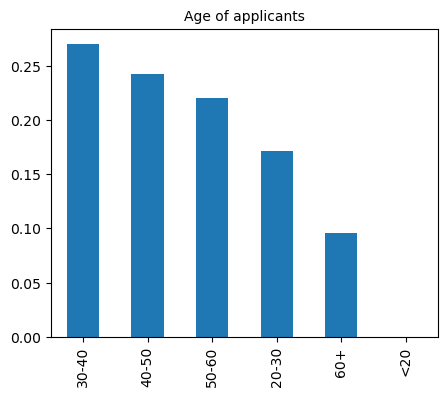

In [178]:
# YEARS_BIRTH analysis

plt.figure(figsize=[5,4])
AD1.Age_BINS.value_counts(normalize=True).plot.bar()


plt.title("Age of applicants", fontdict={'fontsize': 10})
plt.show()

In [179]:
AD1.Age_BINS.value_counts(normalize=True)*100

30-40    27.028952
40-50    24.194582
50-60    22.054170
20-30    17.171743
60+       9.550227
<20       0.000325
Name: Age_BINS, dtype: float64

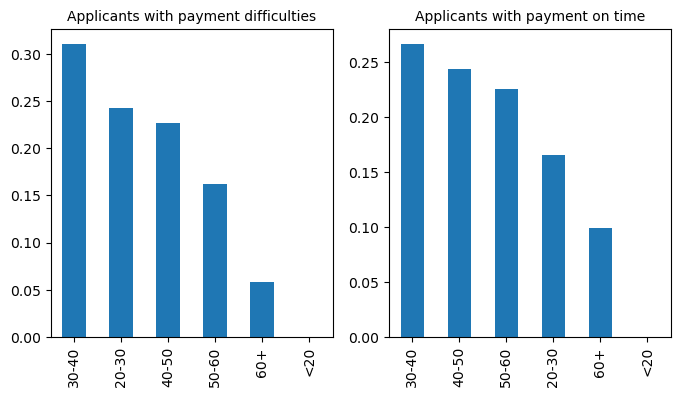

Applicants with payment difficulties
30-40    31.093656
20-30    24.245720
40-50    22.630413
50-60    16.209466
60+       5.820745
<20       0.000000
Name: Age_BINS, dtype: float64
Applicants with payment on time
30-40    26.671996
40-50    24.331944
50-60    22.567442
20-30    16.550519
60+       9.877744
<20       0.000354
Name: Age_BINS, dtype: float64


In [180]:
# YEARS_BIRTH vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.Age_BINS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.Age_BINS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.Age_BINS.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.Age_BINS.value_counts(normalize=True)*100 )

##### YEARS_BIRTH vs Target:
1. Majority of the applicants are in 30 to 40 age group
2. Applicants who have are in the age group of 30 to 40 are facing difficulty in payment

In [181]:
AD1.YEARS_EMPLOYED.min()

0

In [182]:
AD1.YEARS_EMPLOYED.max()

49

In [183]:
# Analyzing YEARS_EMPLOYED col

AD1.YEARS_EMPLOYED.describe()

count    307511.000000
mean          6.209914
std           5.821756
min           0.000000
25%           2.000000
50%           6.000000
75%           7.000000
max          49.000000
Name: YEARS_EMPLOYED, dtype: float64

In [184]:
# Creating bins for YEARS_EMPLOYED col to analyze it categorically

AD1["Employment_BINS"] =     pd.cut(AD1.YEARS_EMPLOYED, [0,10,20, 30, 40 , 100 ],
                              labels=["<10","10-20","20-30","30-40", "40+"])

TARGET_VAR_1["Employment_BINS"]= pd.cut(TARGET_VAR_1.YEARS_EMPLOYED, [0,10,20, 30, 40 , 100 ],
                              labels=["<10","10-20","20-30","30-40", "40+"])

TARGET_VAR_0["Employment_BINS"]= pd.cut(TARGET_VAR_0.YEARS_EMPLOYED, [0,10,20, 30, 40 , 100 ],
                              labels=["<10","10-20","20-30","30-40", "40+"])

In [185]:
AD1.YEARS_EMPLOYED[50:60]

50     3
51    19
52     2
53     3
54     7
55    11
56     7
57     6
58     4
59     5
Name: YEARS_EMPLOYED, dtype: int64

In [186]:
AD1.Employment_BINS[50:60]

50      <10
51    10-20
52      <10
53      <10
54      <10
55    10-20
56      <10
57      <10
58      <10
59      <10
Name: Employment_BINS, dtype: category
Categories (5, object): ['<10' < '10-20' < '20-30' < '30-40' < '40+']

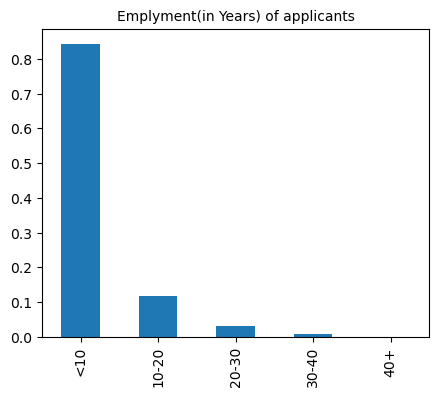

In [187]:
# YEARS_EMPLOYED analysis

plt.figure(figsize=[5,4])
AD1.Employment_BINS.value_counts(normalize=True).plot.bar()


plt.title("Emplyment(in Years) of applicants", fontdict={'fontsize': 10})
plt.show()

In [188]:
AD1.Employment_BINS.value_counts(normalize=True)*100

<10      84.399735
10-20    11.680884
20-30     3.007672
30-40     0.849116
40+       0.062593
Name: Employment_BINS, dtype: float64

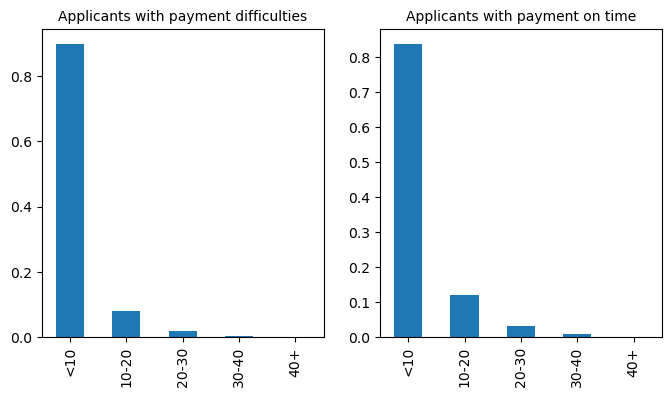

Applicants with payment difficulties
<10      90.000919
10-20     7.888930
20-30     1.765355
30-40     0.340199
40+       0.004597
Name: Employment_BINS, dtype: float64
Applicants with payment on time
<10      83.927193
10-20    12.000791
20-30     3.112480
30-40     0.892050
40+       0.067486
Name: Employment_BINS, dtype: float64


In [189]:
# YEARS_EMPLOYED vs Target

plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
TARGET_VAR_1.Employment_BINS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties",  fontdict={'fontsize': 10})

plt.subplot(1,2,2)
TARGET_VAR_0.Employment_BINS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment on time",  fontdict={'fontsize': 10})

plt.show()

print("Applicants with payment difficulties")
print(TARGET_VAR_1.Employment_BINS.value_counts(normalize=True)*100 )

print("Applicants with payment on time")
print(TARGET_VAR_0.Employment_BINS.value_counts(normalize=True)*100 )

##### YEARS_EMPLOYED vs Target:
1. Majority of the applicants are falls below 10 years of employment history
2. Applicants who have have less than 10 years of history of employment are facing difficulties in payment. Applicants with 10 to 20 years of history of employment are able to pay on time

### Bivariate analysis

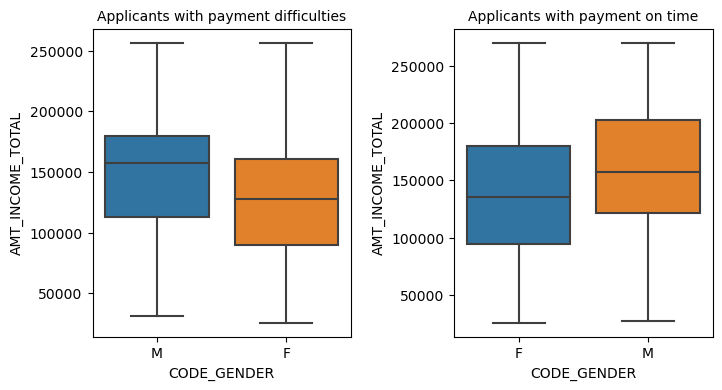

In [333]:
# Analysis of Gender vs Income

plt.figure(figsize=[8,4])
plt.subplots_adjust(wspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_INCOME_TOTAL <= TARGET_VAR_1.AMT_INCOME_TOTAL.quantile(0.90))], x="CODE_GENDER",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_INCOME_TOTAL <= TARGET_VAR_0.AMT_INCOME_TOTAL.quantile(0.90))], x="CODE_GENDER",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})

plt.show()


##### Gender vs Income:
1. Male applicants are on the higher income than females irrespective of Payment difficulties/ payment on time


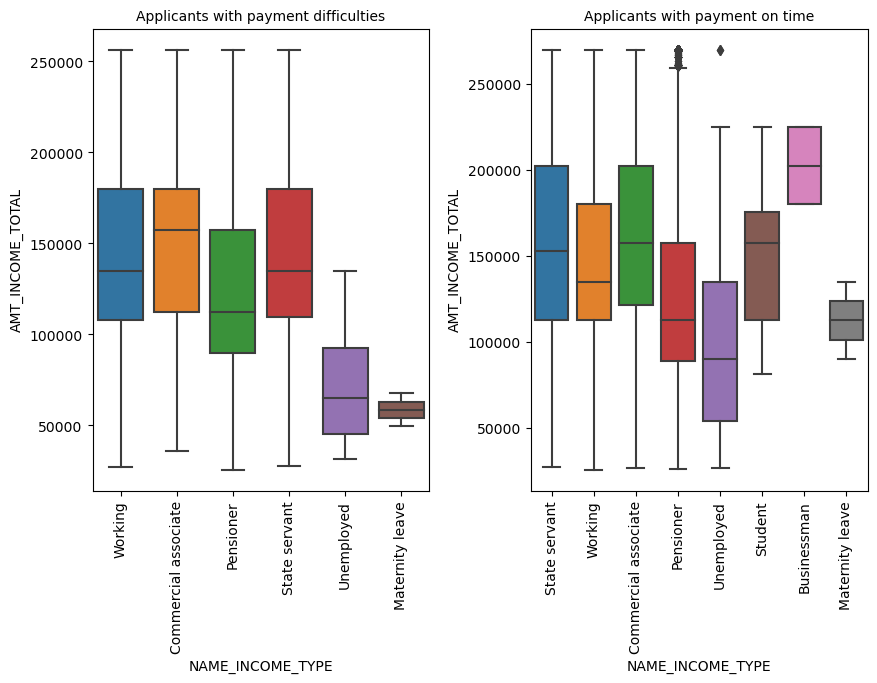

In [191]:
# Type of Income vs Income

plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_INCOME_TOTAL <= TARGET_VAR_1.AMT_INCOME_TOTAL.quantile(0.90))], x="NAME_INCOME_TYPE",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_INCOME_TOTAL <= TARGET_VAR_0.AMT_INCOME_TOTAL.quantile(0.90))], x="NAME_INCOME_TYPE",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


##### Type of Income vs Income:
1. Businessmen are having the higher median income as compared to other cases. Also, they have payment on time as compared to other applicants
2. Applicants who are unemployed and on maternity leave are having the difficulties with payment, and are the low income groups among others


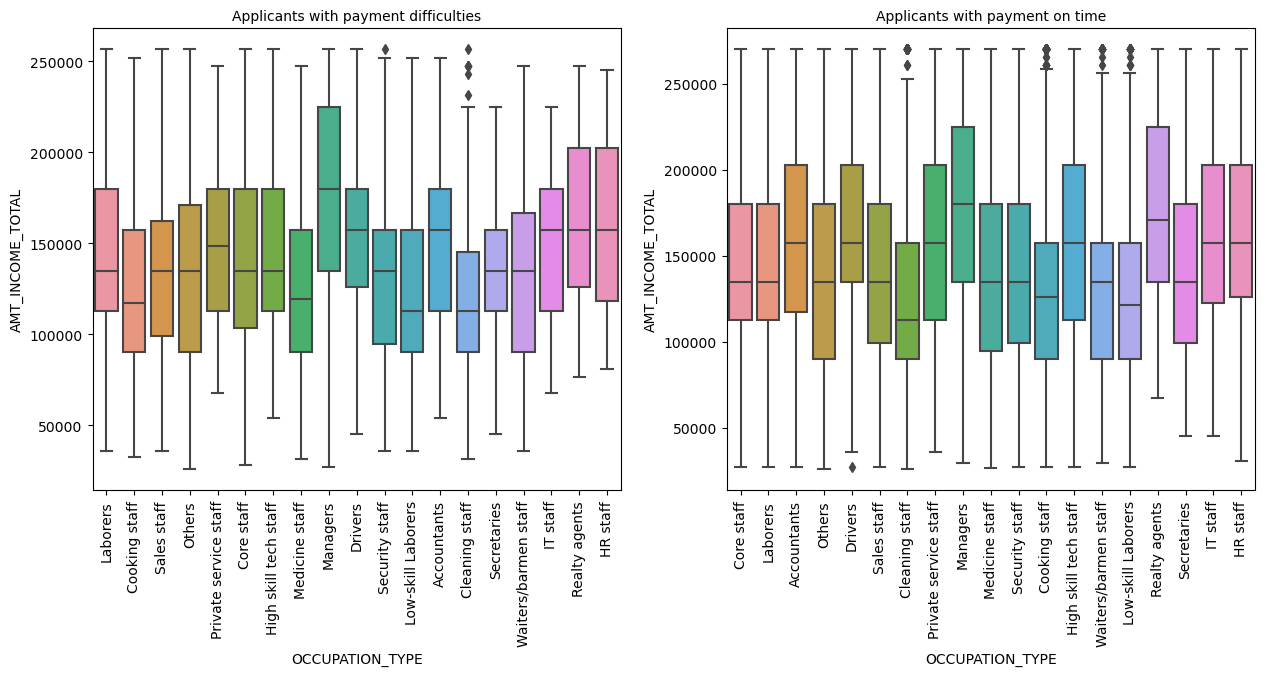

In [192]:
# Type of Occupation vs Income

plt.figure(figsize=[15,6])
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_INCOME_TOTAL <= TARGET_VAR_1.AMT_INCOME_TOTAL.quantile(0.90))], x="OCCUPATION_TYPE",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_INCOME_TOTAL <= TARGET_VAR_0.AMT_INCOME_TOTAL.quantile(0.90))], x="OCCUPATION_TYPE",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


##### Type of Occupation vs Income:
1. Managers, IT & HR staff, and Realty agents are having the higher median income as compared to other groups. Also, they have payment on time as compared to other applicants
2. Applicants who are low skilled laborers and cleaning staff are having the difficulties with payment, and are the low income groups among others


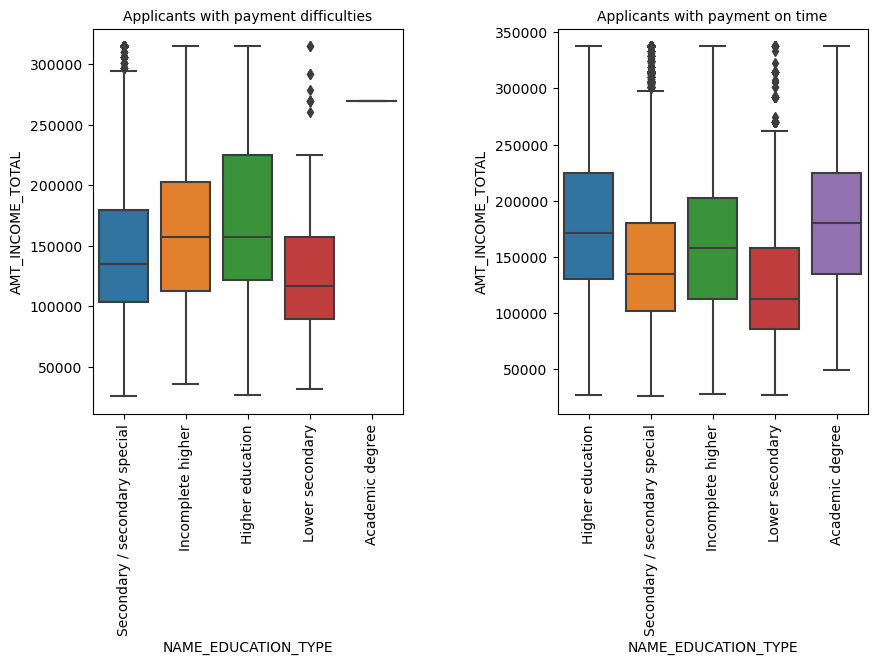

In [193]:
# Type of Education vs Income

plt.figure(figsize=[10,5])
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_INCOME_TOTAL <= TARGET_VAR_1.AMT_INCOME_TOTAL.quantile(0.95))], x="NAME_EDUCATION_TYPE",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_INCOME_TOTAL <= TARGET_VAR_0.AMT_INCOME_TOTAL.quantile(0.95))], x="NAME_EDUCATION_TYPE",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


##### Type of Education vs Income:
1. Applicants with higher income and Academic degree are facing payment difficulties as compared to other groups, and  Acdemic degree applicants with payment on time
2. Applicants with higher education are having higher median income and able to pay on time as well
2. Applicants with lower secondary education are having the difficulties with payment, and are the low income groups among others


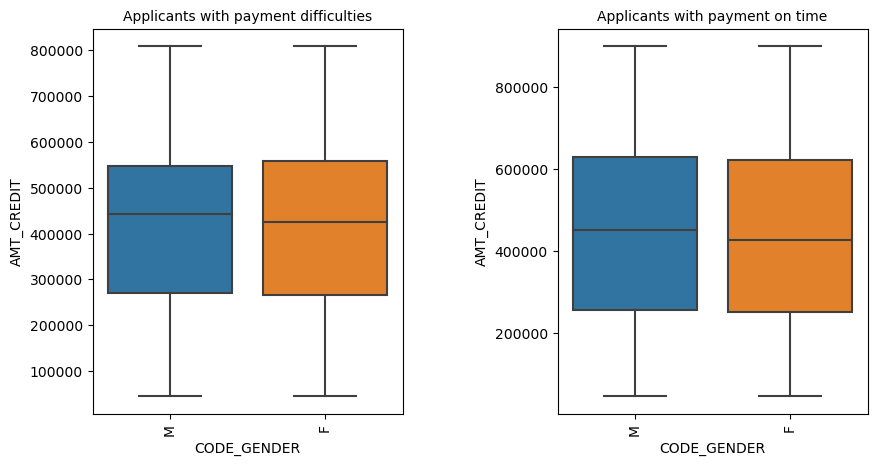

In [194]:
# Gender vs Amount credited

plt.figure(figsize=[10,5])
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_CREDIT <= TARGET_VAR_1.AMT_CREDIT.quantile(0.80))], x="CODE_GENDER",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_CREDIT <= TARGET_VAR_0.AMT_CREDIT.quantile(0.80))], x="CODE_GENDER",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


##### Gender vs Amount credited:
1. Male applicants are hvaing slightly higher median amount of loan credited than females although they are having payment difficulties vs male applicants on time
2. There is no significant difference gender wise observing Gender vs Amount credited analysis


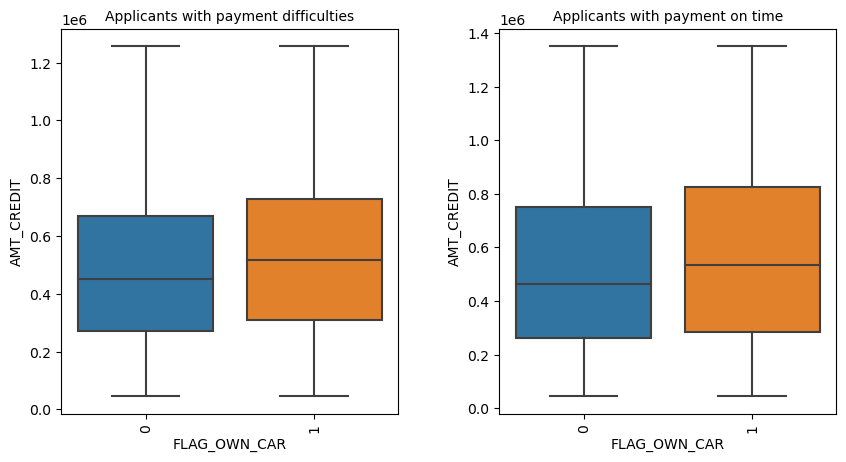

In [342]:
# FLAG_OWN_CAR vs Amount credited

plt.figure(figsize=[10,5])
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_CREDIT <= TARGET_VAR_1.AMT_CREDIT.quantile(0.95))], x="FLAG_OWN_CAR",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_CREDIT <= TARGET_VAR_0.AMT_CREDIT.quantile(0.95))], x="FLAG_OWN_CAR",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


##### FLAG_OWN_CAR vs Amount credited:
1. Applicants who own car are having a higher median value for credit amount for a loan. Also, they are having difficulties in payment as compared to applicants who do not own a car and also with applicants who own a car and paying own time


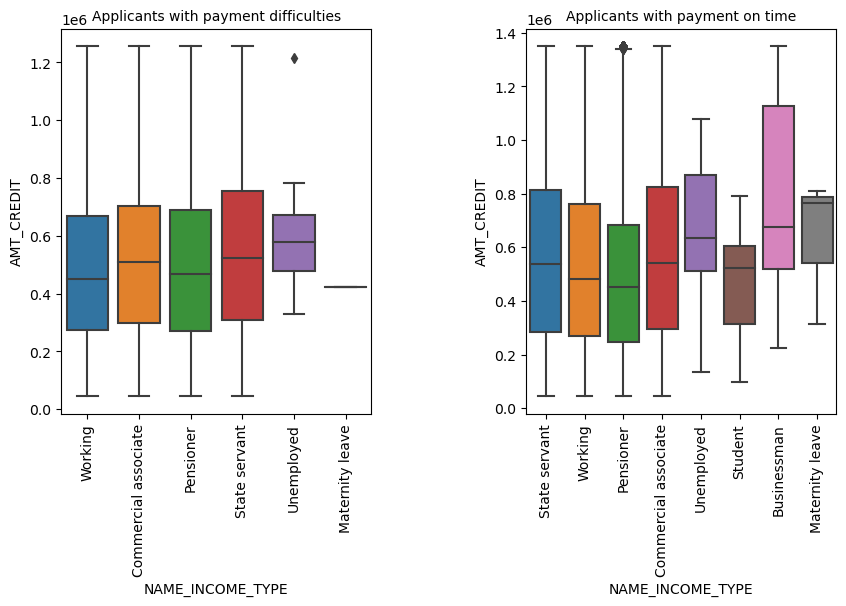

In [196]:
# Income type vs Credit amount

plt.figure(figsize=[10,5])
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_CREDIT <= TARGET_VAR_1.AMT_CREDIT.quantile(0.95))], x="NAME_INCOME_TYPE",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_CREDIT <= TARGET_VAR_0.AMT_CREDIT.quantile(0.95))], x="NAME_INCOME_TYPE",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


##### Income type vs Credit amount:
1. Businessman with larger credit amount (loans) are somehow able to pay on time as compared to other groups
2. Maternity leave applicants are having the higher median credit loans and able to pay on time as compared to other applicants


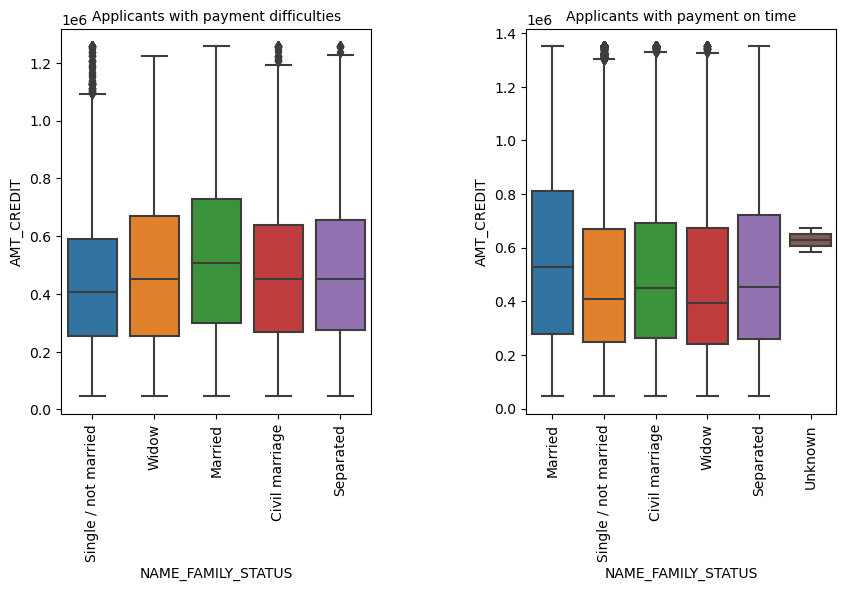

In [197]:
# Family status vs Credit amount

plt.figure(figsize=[10,5])
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_CREDIT <= TARGET_VAR_1.AMT_CREDIT.quantile(0.95))], x="NAME_FAMILY_STATUS",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_CREDIT <= TARGET_VAR_0.AMT_CREDIT.quantile(0.95))], x="NAME_FAMILY_STATUS",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


##### Family status vs Credit amount:
1. Married applicants are the ones who have higher credit loans but able to pay on time as compared to other groups while the similar distribution has been seen in maaried pplicants with payment difficulties 


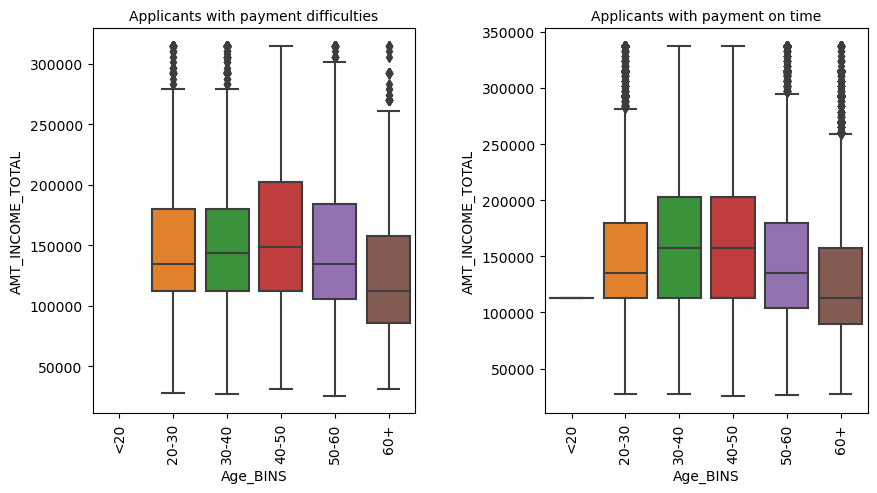

In [337]:
# Age group vs Total income

plt.figure(figsize=[10,5])
plt.subplots_adjust(wspace=0.4
                   )

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_INCOME_TOTAL <= TARGET_VAR_1.AMT_INCOME_TOTAL.quantile(0.95))], x="Age_BINS",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_INCOME_TOTAL <= TARGET_VAR_0.AMT_INCOME_TOTAL.quantile(0.95))], x="Age_BINS",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


###### Age group vs Total income:
1. Applicants from 30 to 50 age group are able to pay on time and have higher median income while the 40 to 50 age group is also having payment difficulties as compared to other groups
2. 60+ applicants are the lowest income group which are hvaing difficulties in payment vs other groups


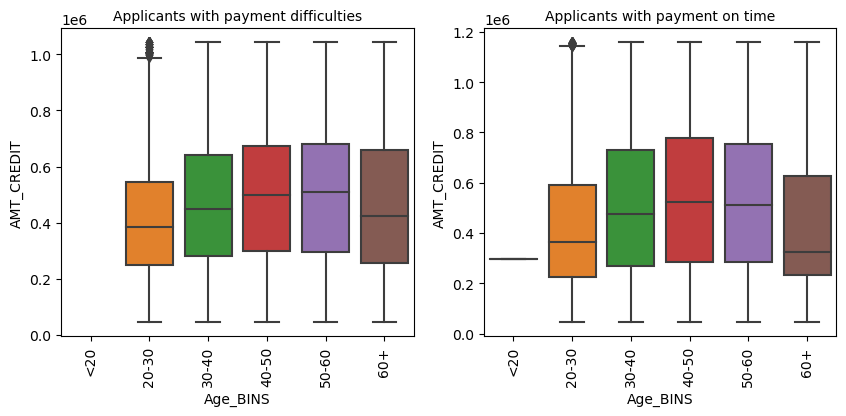

In [343]:
# Age group vs Credit amount

plt.figure(figsize=[10,4])
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_CREDIT <= TARGET_VAR_1.AMT_CREDIT.quantile(0.90))], x="Age_BINS",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_CREDIT <= TARGET_VAR_0.AMT_CREDIT.quantile(0.90))], x="Age_BINS",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


###### Age group vs Credit amount:
1. Applicants from 40 to 60 age group are having higher median credit loan amount and also facing payment difficulties as compared to other groups
2. There is no significant differnce in both with and without payment difficulties groups except 60+ applicants have low credit loan amount vs other groups


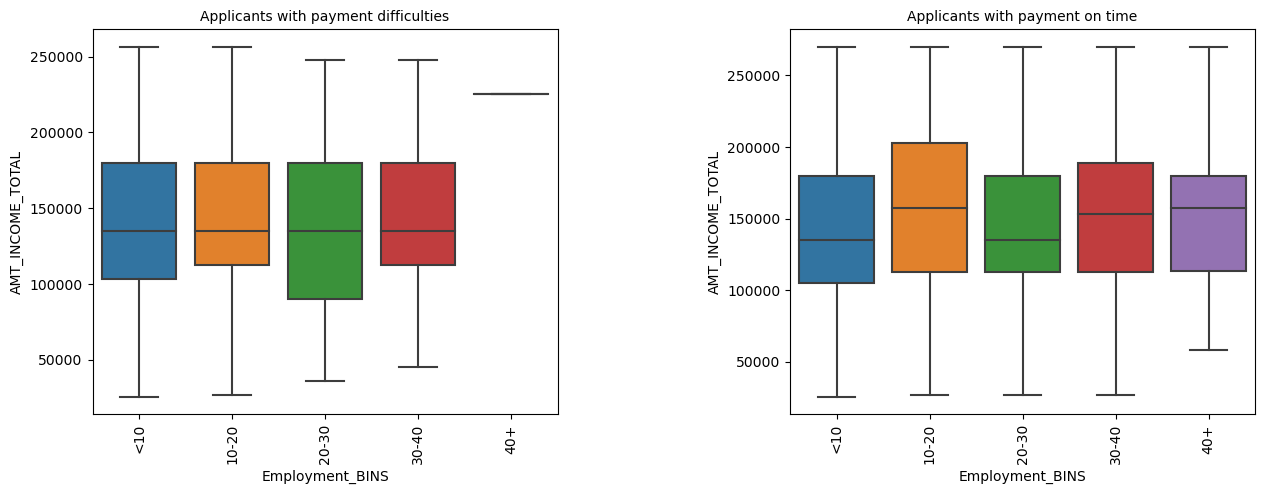

In [200]:
# Employment age vs Total income

plt.figure(figsize=[15,5])
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_INCOME_TOTAL <= TARGET_VAR_1.AMT_INCOME_TOTAL.quantile(0.90))], x="Employment_BINS",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_INCOME_TOTAL <= TARGET_VAR_0.AMT_INCOME_TOTAL.quantile(0.90))], x="Employment_BINS",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


###### Employment age vs Total income:
1. There is no sognificant difference between the groups in terms of payment difficluties while the 10 to 20 age group is having higher median income and able to pay on time vs others


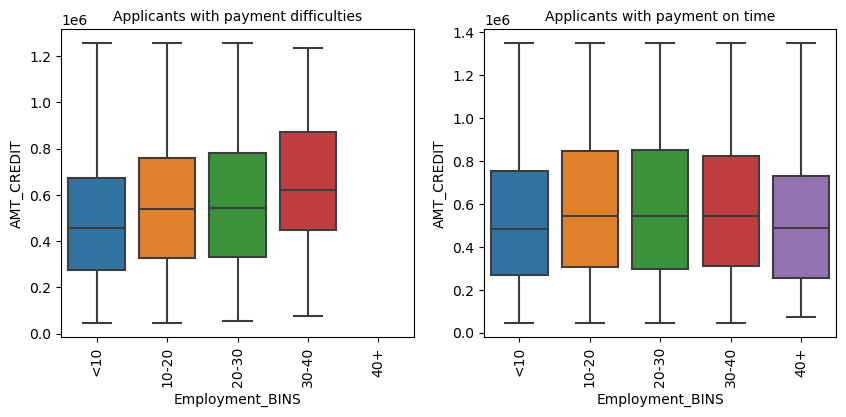

In [345]:
# Employment age vs Credit amount

plt.figure(figsize=[10,4])
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_CREDIT <= TARGET_VAR_1.AMT_CREDIT.quantile(0.95))], x="Employment_BINS",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_CREDIT <= TARGET_VAR_0.AMT_CREDIT.quantile(0.95))], x="Employment_BINS",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


###### Employment age vs Credit loan:

1. Applicants with 30 to 40 years employment history are having a higher median credit loan and facing trouble in payments vs other groups
2. The applicants who have 10 to 40 years of employment hostory are abel to pay on time and have higher median values vs others


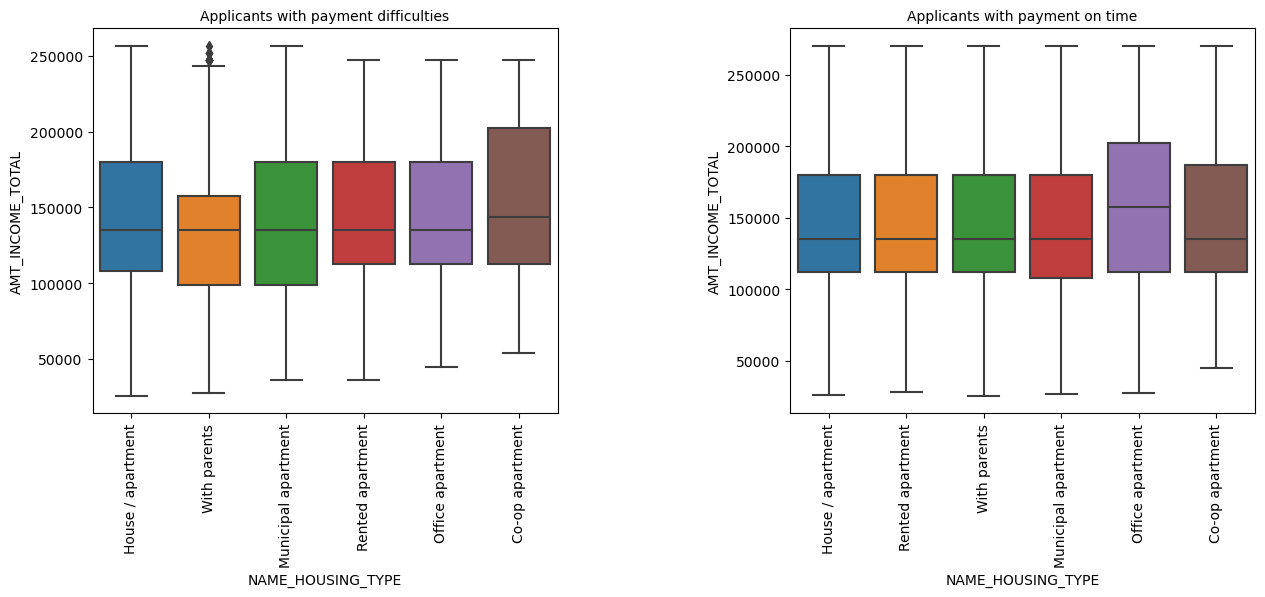

In [202]:
# Housing type vs Total income
plt.figure(figsize=[15,5])
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_INCOME_TOTAL <= TARGET_VAR_1.AMT_INCOME_TOTAL.quantile(0.90))], x="NAME_HOUSING_TYPE",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_INCOME_TOTAL <= TARGET_VAR_0.AMT_INCOME_TOTAL.quantile(0.90))], x="NAME_HOUSING_TYPE",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


###### Housing type vs Total income:
1. The applicants who live in Co-op apartment have a slightly higher median income although they are facing difficulty in payment
2. The applicants who are live in Office apartments are hvaing higher median income and able to pay on time vs other groups

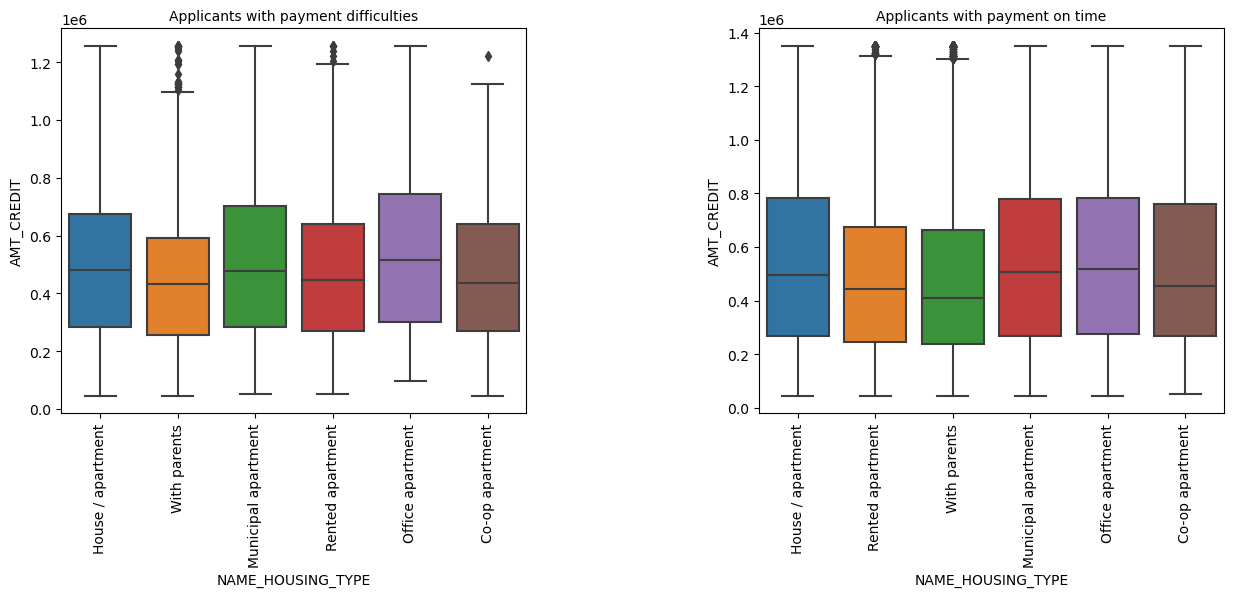

In [203]:
# Housing type vs Credit amount

plt.figure(figsize=[15,5])
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_CREDIT <= TARGET_VAR_1.AMT_CREDIT.quantile(0.95))], x="NAME_HOUSING_TYPE",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_CREDIT <= TARGET_VAR_0.AMT_CREDIT.quantile(0.95))], x="NAME_HOUSING_TYPE",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


###### Housing type vs Credit amount:

1. There is no significant difference has been observed in both woth or without payment difficulties groups
2. The applicants who are staying with their parents and Co-op apartments are having loe credit loan than others

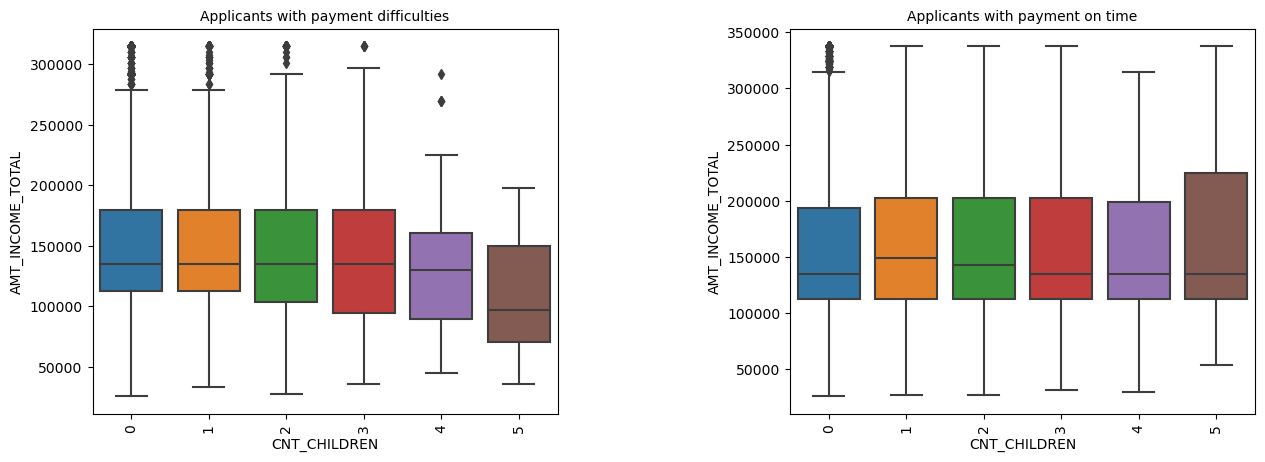

In [204]:
# Count of children vs Total income
plt.figure(figsize=[15,5])
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_INCOME_TOTAL <= TARGET_VAR_1.AMT_INCOME_TOTAL.quantile(0.95)) & (TARGET_VAR_1.CNT_CHILDREN<6)], x="CNT_CHILDREN",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_INCOME_TOTAL <= TARGET_VAR_0.AMT_INCOME_TOTAL.quantile(0.95)) & (TARGET_VAR_0.CNT_CHILDREN<6) ], x="CNT_CHILDREN",
           y= "AMT_INCOME_TOTAL" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


###### Count of children vs Total income:
1. The applicants who have 1 child are having a slightly higher median income and able to pay on time. Although, there is no significant difference among the rest of the groups
2. The applicants who are having 5 children are having the low median income and facing payment difficulties than others

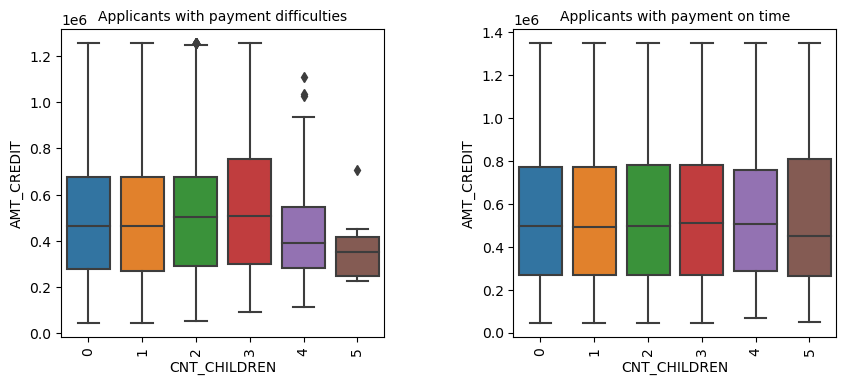

In [340]:
# Count of children vs Credit amount

plt.figure(figsize=[10,4])
plt.subplots_adjust(wspace=0.4)

plt.subplot(1,2,1)
sns.boxplot(data=TARGET_VAR_1[(TARGET_VAR_1.AMT_CREDIT <= TARGET_VAR_1.AMT_CREDIT.quantile(0.95)) & (TARGET_VAR_1.CNT_CHILDREN<6)], x="CNT_CHILDREN",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment difficulties", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=TARGET_VAR_0[(TARGET_VAR_0.AMT_CREDIT <= TARGET_VAR_0.AMT_CREDIT.quantile(0.95)) & (TARGET_VAR_0.CNT_CHILDREN<6) ], x="CNT_CHILDREN",
           y= "AMT_CREDIT" )
plt.title("Applicants with payment on time", fontdict={'fontsize': 10})
plt.xticks(rotation=90)

plt.show()


###### Count of children vs Credit amount:

1. There is no significant difference has been observed in payment on time groups
2. The applicants who are having 4 and 5 children are having a low median credit loan and facing difficulties in paying them vs other groups. Rest groups are taking slightly higher credit loans and facing the difficulties in paying them back

In [206]:
# Bivariate analysis of numerical cols

def p75(x):
    return np.quantile(x,0.75)

In [207]:
# TARGET vs AMT_INCOME_TOTAL analysis

AD1.groupby("TARGET")["AMT_INCOME_TOTAL"].aggregate(["mean","median", p75])

mean    median       p75
TARGET                                   
0       169077.722266  148500.0  202500.0
1       165611.760906  135000.0  202500.0

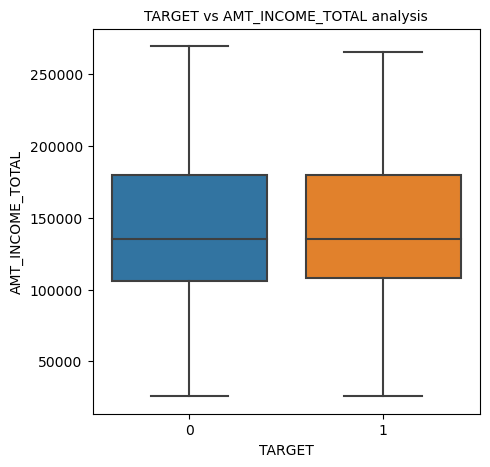

In [209]:
plt.figure(figsize=[5,5])

sns.boxplot(data= AD1[AD1.AMT_INCOME_TOTAL< AD1.AMT_INCOME_TOTAL.quantile(0.90)], x= "TARGET" , y= "AMT_INCOME_TOTAL")

plt.title("TARGET vs AMT_INCOME_TOTAL analysis", fontdict={'fontsize':10})
plt.show()

###### TARGET vs AMT_INCOME_TOTAL:

1. There is no significant difference has been observed in Target vs total income groups
2. There are applicants who have slightly lower mean and median income with payment difficulties vs the applicants who are paying on time

In [210]:
# TARGET vs AMT_CREDIT analysis

AD1.groupby("TARGET")["AMT_CREDIT"].aggregate(["mean","median", p75])

mean    median       p75
TARGET                                   
0       602648.282002  517788.0  810000.0
1       557778.527674  497520.0  733315.5

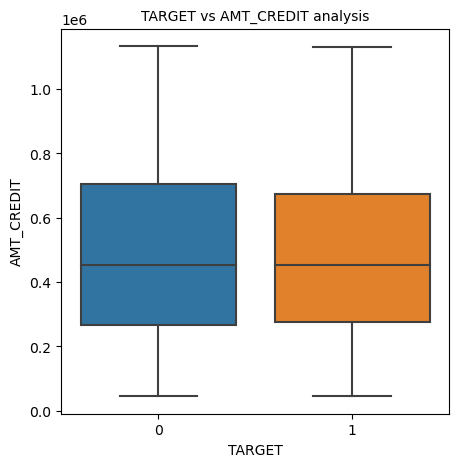

In [212]:
plt.figure(figsize=[5,5])

sns.boxplot(data= AD1[AD1.AMT_CREDIT< AD1.AMT_CREDIT.quantile(0.90)], x= "TARGET" , y= "AMT_CREDIT")

plt.title("TARGET vs AMT_CREDIT analysis", fontdict={'fontsize':10})
plt.show()

###### TARGET vs AMT_CREDIT:

1. There is no significant difference has been observed in Target vs credit loan amount groups
2. There are applicants who have slightly lower mean. median and 75th percentile credit loan with payment difficulties vs the applicants who are paying on time

In [213]:
# TARGET vs AMT_GOODS_PRICE analysis

AD1.groupby("TARGET")["AMT_GOODS_PRICE"].aggregate(["mean","median", p75])

mean    median         p75
TARGET                                     
0       542652.484651  450000.0  685002.375
1       488939.444955  450000.0  675000.000

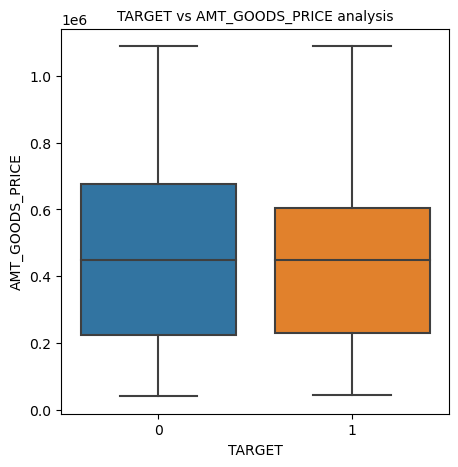

In [215]:
plt.figure(figsize=[5,5])

sns.boxplot(data= AD1[AD1.AMT_GOODS_PRICE< AD1.AMT_GOODS_PRICE.quantile(0.90)], x= "TARGET" , y= "AMT_GOODS_PRICE")

plt.title("TARGET vs AMT_GOODS_PRICE analysis", fontdict={'fontsize':10})
plt.show()

###### TARGET vs AMT_GOODS_PRICE:

1. There is no significant difference has been observed in Target vs credit loan amount groups
2. There is a exactly same median good's price for which the loan is taken, for both with and without payment difficulties group

In [216]:
# TARGET vs YEARS_BIRTH analysis

AD1.groupby("TARGET")["YEARS_BIRTH"].aggregate(["mean","median", p75])

mean  median   p75
TARGET                         
0       43.713123    43.0  54.0
1       40.279960    39.0  49.0

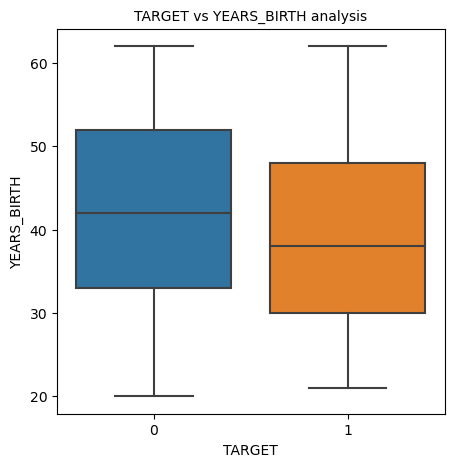

In [218]:
plt.figure(figsize=[5,5])

sns.boxplot(data= AD1[AD1.YEARS_BIRTH< AD1.YEARS_BIRTH.quantile(0.95)], x= "TARGET" , y= "YEARS_BIRTH")

plt.title("TARGET vs YEARS_BIRTH analysis", fontdict={'fontsize':10})
plt.show()

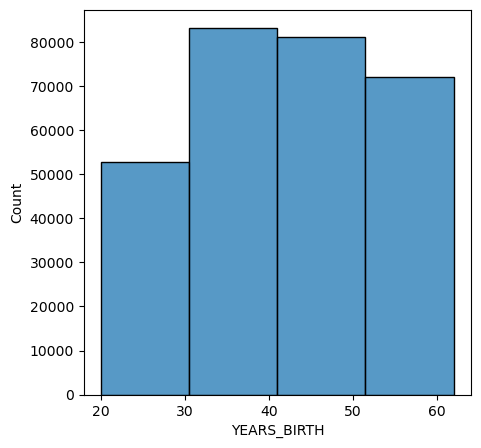

In [219]:
plt.figure(figsize=[5,5])

sns.histplot(data= AD1[AD1.YEARS_BIRTH< AD1.YEARS_BIRTH.quantile(0.95)], x= "YEARS_BIRTH", bins=4)

plt.show()

###### TARGET vs YEARS_BIRTH:

1. There is a low median age of aplicants for applicants with payment difficulties vs applicants who are able to pay on time
2. Majority of applicants are falling into 30 to 40 age group

In [220]:
# TARGET vs YEARS_EMPLOYED analysis

AD1.groupby("TARGET")["YEARS_EMPLOYED"].aggregate(["mean","median", p75])

mean  median  p75
TARGET                       
0       6.335432     6.0  7.0
1       4.780624     3.0  7.0

<Figure size 500x500 with 0 Axes>

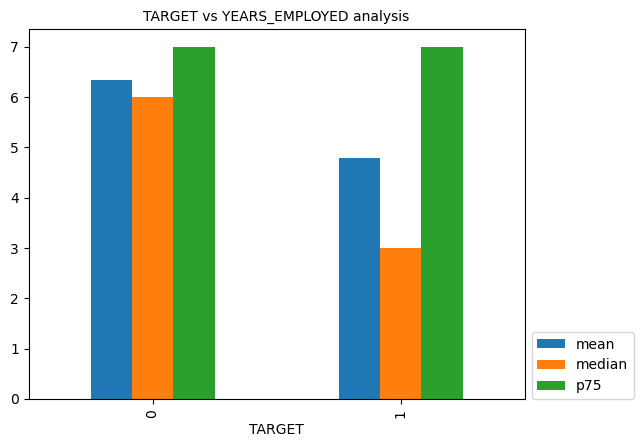

In [221]:
plt.figure(figsize=[5,5])
AD1.groupby("TARGET")["YEARS_EMPLOYED"].aggregate(["mean","median", p75]).plot.bar()

plt.legend()
plt.legend(bbox_to_anchor= (1, 0.2))

plt.title("TARGET vs YEARS_EMPLOYED analysis", fontdict={'fontsize':10})
plt.show()

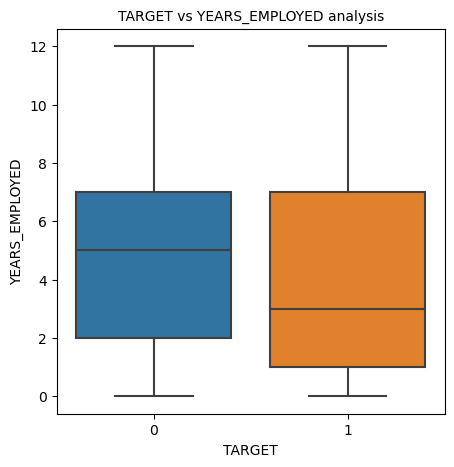

In [332]:
plt.figure(figsize=[5,5])

sns.boxplot(data= AD1[AD1.YEARS_EMPLOYED< AD1.YEARS_EMPLOYED.quantile(0.90)], x= "TARGET" , y= "YEARS_EMPLOYED")

plt.title("TARGET vs YEARS_EMPLOYED analysis", fontdict={'fontsize':10})
plt.show()

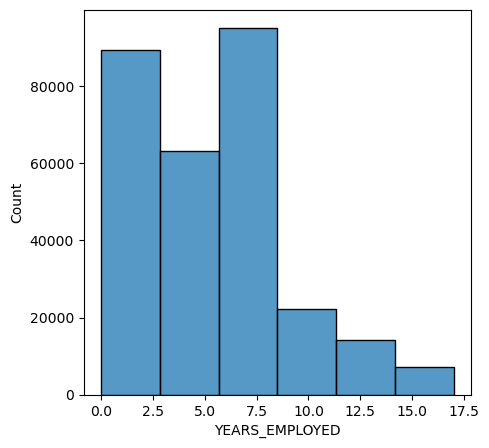

In [223]:
plt.figure(figsize=[5,5])

sns.histplot(data= AD1[AD1.YEARS_EMPLOYED< AD1.YEARS_EMPLOYED.quantile(0.95)], x= "YEARS_EMPLOYED", bins=6)

plt.show()

###### TARGET vs YEARS_EMPLOYED:

1. There is a low median employment hostiry for applicants with payment difficulties vs applicants who are able to pay on time
2. Majority of applicants are falling have less than 10 years of hostory of employment

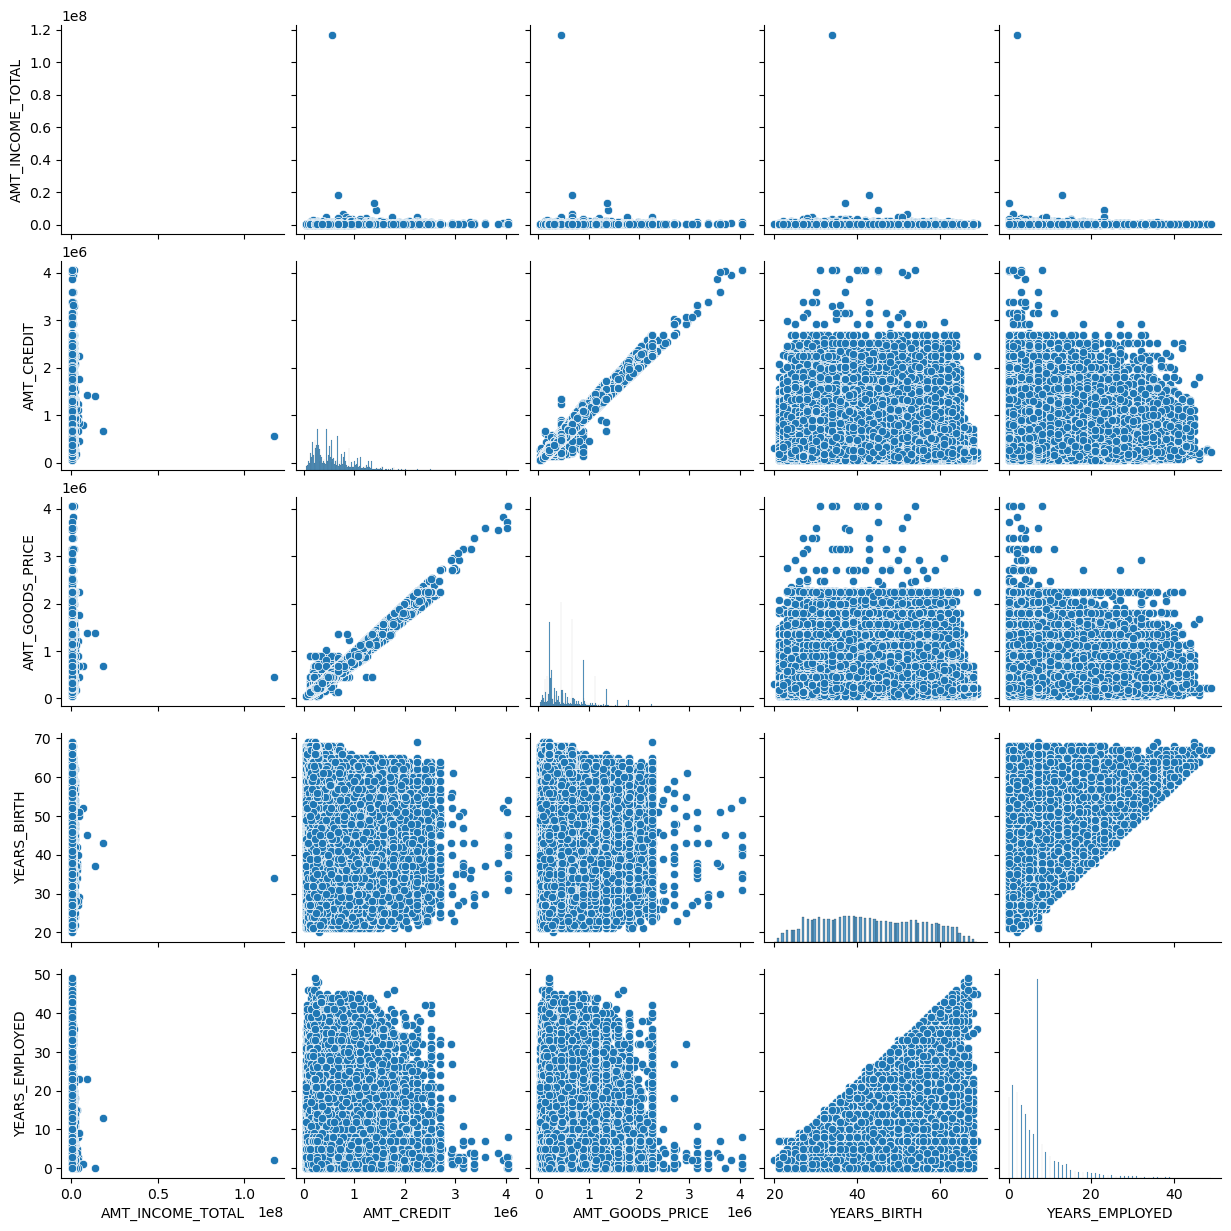

In [224]:
# Observing patterns among the few variables using pairplot

sns.pairplot(AD1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_GOODS_PRICE", "YEARS_BIRTH" ,  "YEARS_EMPLOYED"]]  )

plt.show()

###### Pairplot analysis:

Based on the observations from the above pairplots:
1. There is a strong positive corelation between AMT_GOODS_PRICE and AMT_CREDIT as the price of goods will increase, applicants are having increased credit loan amount
2. There is a weak or no relation between AMT_GOODS_PRICE and YEARS_BIRTH, YEARS_EMPLOYED with AMT_CREDIT and AMT_GOODS_PRICE. However, there is a positive correlation has been observed between YEARS_EMPLOYED and YEARS_BIRTH as people who age have longer employment history

In [225]:
# Correlation between above mentioned cols

RES_CRR = AD1[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_GOODS_PRICE", "YEARS_BIRTH" ,  "YEARS_EMPLOYED"]].corr()

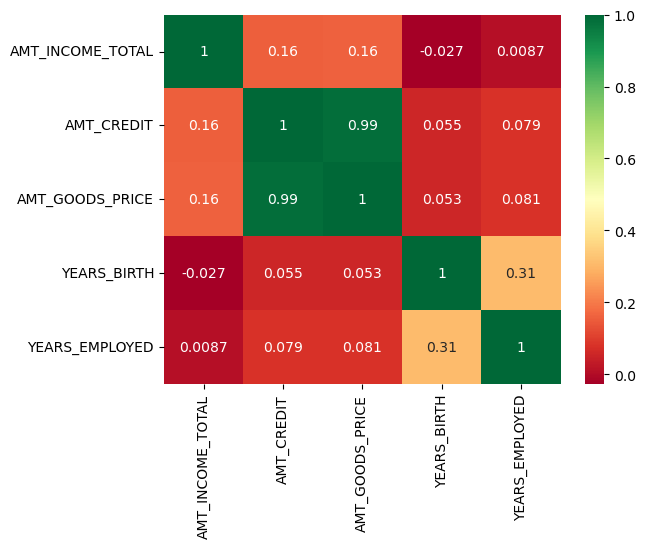

In [226]:
sns.heatmap(data=RES_CRR, cmap= "RdYlGn", annot=True )

plt.show()

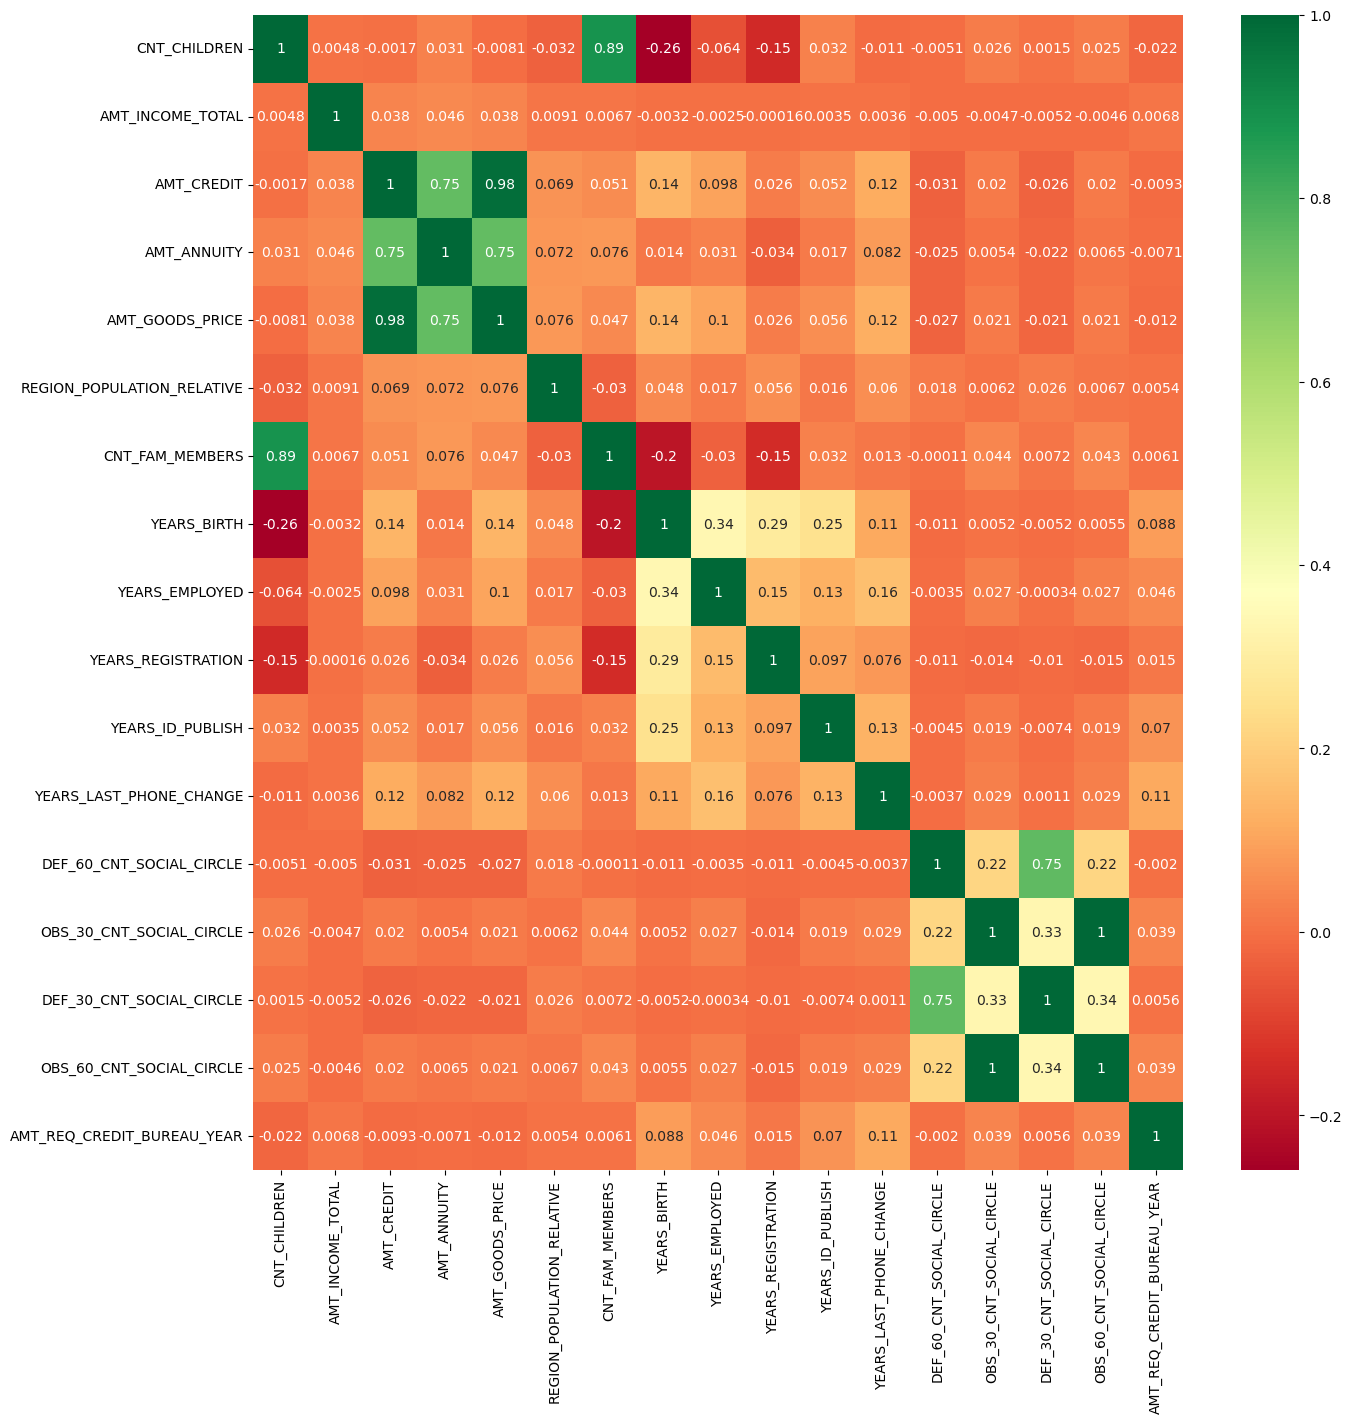

In [227]:
# Observing correlation between all the numerical cols for applicants who are facing difficluties in payment

TARGET_VAR_1_Numer_cols = TARGET_VAR_1[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
       'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR']]

plt.figure(figsize=[15,15])
sns.heatmap(data=TARGET_VAR_1_Numer_cols.corr(), annot=True , cmap= "RdYlGn" )

plt.show()

In [228]:
TARGET_VAR_1_CORR_MATRIX_1 = TARGET_VAR_1_Numer_cols.corr()
TARGET_VAR_1_CORR_MATRIX_1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                    1.000000          0.004796   -0.001675   
AMT_INCOME_TOTAL                0.004796          1.000000    0.038131   
AMT_CREDIT                     -0.001675          0.038131    1.000000   
AMT_ANNUITY                     0.031257          0.046421    0.752195   
AMT_GOODS_PRICE                -0.008111          0.037591    0.982783   
REGION_POPULATION_RELATIVE     -0.031975          0.009135    0.069161   
CNT_FAM_MEMBERS                 0.885484          0.006654    0.051224   
YEARS_BIRTH                    -0.259222         -0.003154    0.135070   
YEARS_EMPLOYED                 -0.063752         -0.002526    0.098103   
YEARS_REGISTRATION             -0.149029         -0.000161    0.025949   
YEARS_ID_PUBLISH                0.031792          0.003458    0.052010   
YEARS_LAST_PHONE_CHANGE        -0.011222          0.003640    0.117117   
DEF_60_CNT_SOCIAL_CIRCLE       -0.005061         -0.004982   -0.030556   
OBS_30_CNT_SOCIAL_CIRCLE        0.025909         -0.004682    0.019856   
DEF_30_CNT_SOCIAL_CIRCLE        0.001520         -0.005170   -0.025503   
OBS_60_CNT_SOCIAL_CIRCLE        0.025285         -0.004588    0.020242   
AMT_REQ_CREDIT_BUREAU_YEAR     -0.021572          0.006802   -0.009317   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   0.031257        -0.008111   
AMT_INCOME_TOTAL               0.046421         0.037591   
AMT_CREDIT                     0.752195         0.982783   
AMT_ANNUITY                    1.000000         0.752295   
AMT_GOODS_PRICE                0.752295         1.000000   
REGION_POPULATION_RELATIVE     0.071690         0.076053   
CNT_FAM_MEMBERS                0.075711         0.047367   
YEARS_BIRTH                    0.014028         0.135532   
YEARS_EMPLOYED                 0.031191         0.103800   
YEARS_REGISTRATION            -0.034047         0.025817   
YEARS_ID_PUBLISH               0.016624         0.055874   
YEARS_LAST_PHONE_CHANGE        0.081911         0.123808   
DEF_60_CNT_SOCIAL_CIRCLE      -0.025233        -0.026743   
OBS_30_CNT_SOCIAL_CIRCLE       0.005432         0.020537   
DEF_30_CNT_SOCIAL_CIRCLE      -0.021794        -0.021379   
OBS_60_CNT_SOCIAL_CIRCLE       0.006465         0.021009   
AMT_REQ_CREDIT_BUREAU_YEAR    -0.007090        -0.011593   

                            REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
CNT_CHILDREN                                 -0.031975         0.885484   
AMT_INCOME_TOTAL                              0.009135         0.006654   
AMT_CREDIT                                    0.069161         0.051224   
AMT_ANNUITY                                   0.071690         0.075711   
AMT_GOODS_PRICE                               0.076053         0.047367   
REGION_POPULATION_RELATIVE                    1.000000        -0.030163   
CNT_FAM_MEMBERS                              -0.030163         1.000000   
YEARS_BIRTH                                   0.047956        -0.203403   
YEARS_EMPLOYED                                0.016926        -0.030081   
YEARS_REGISTRATION                            0.056259        -0.145576   
YEARS_ID_PUBLISH                              0.015667         0.031652   
YEARS_LAST_PHONE_CHANGE                       0.060471         0.012709   
DEF_60_CNT_SOCIAL_CIRCLE                      0.018279        -0.000108   
OBS_30_CNT_SOCIAL_CIRCLE                      0.006172         0.044067   
DEF_30_CNT_SOCIAL_CIRCLE                      0.025824         0.007165   
OBS_60_CNT_SOCIAL_CIRCLE                      0.006741         0.043392   
AMT_REQ_CREDIT_BUREAU_YEAR                    0.005437         0.006132   

                            YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  \
CNT_CHILDREN                  -0.259222       -0.063752           -0.149029   
AMT_INCOME_TOTAL              -0.003154       -0.002526           -0.000161   
AMT_CREDIT                

In [229]:
TARGET_VAR_1_CORR_MATRIX_1[TARGET_VAR_1_CORR_MATRIX_1<1].unstack().sort_values(ascending=False).head(20)

OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998270
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998270
AMT_GOODS_PRICE           AMT_CREDIT                  0.982783
AMT_CREDIT                AMT_GOODS_PRICE             0.982783
CNT_CHILDREN              CNT_FAM_MEMBERS             0.885484
CNT_FAM_MEMBERS           CNT_CHILDREN                0.885484
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.754397
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.754397
AMT_GOODS_PRICE           AMT_ANNUITY                 0.752295
AMT_ANNUITY               AMT_GOODS_PRICE             0.752295
                          AMT_CREDIT                  0.752195
AMT_CREDIT                AMT_ANNUITY                 0.752195
DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.337389
OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.337389
YEARS_BIRTH               YEARS_EMPLOYED              0.336999
YEARS_EMPLOYED            YEARS_BIRTH                 0

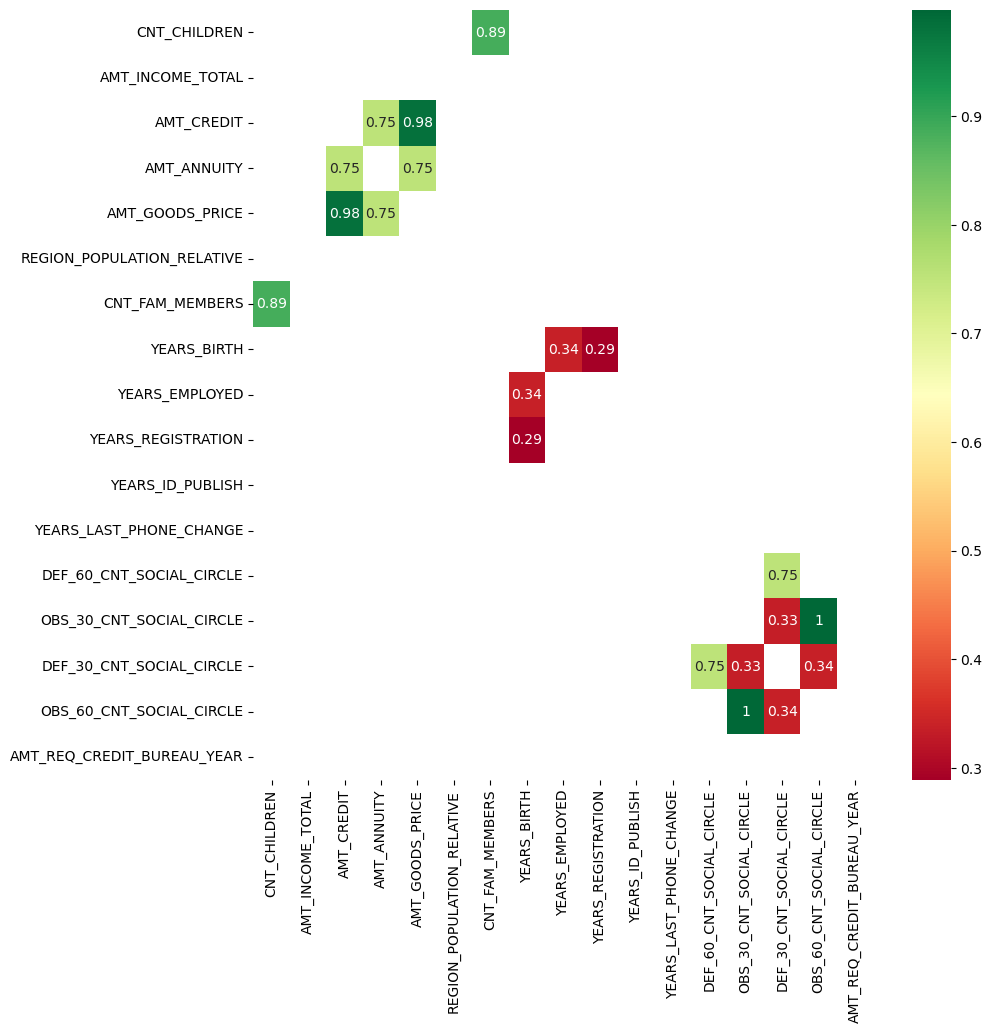

In [351]:
# Observing top 10 correlation between the numerical cols for applicants who are facing difficluties in payment

plt.figure(figsize=[10,10])
sns.heatmap(data=TARGET_VAR_1_CORR_MATRIX_1[(TARGET_VAR_1_CORR_MATRIX_1<1) & (TARGET_VAR_1_CORR_MATRIX_1>=0.28)], annot=True , cmap= "RdYlGn" )

plt.show()

Based on mulrivariate analysis for TARGET_VAR_1_CORR_MATRIX_1, we identified the top 10 correlation between for applicants who face difficulties in payment:

1. OBS_60_CNT_SOCIAL_CIRCLE vs OBS_30_CNT_SOCIAL_CIRCLE    
2. AMT_GOODS_PRICE vs AMT_CREDIT
3. CNT_CHILDREN vs CNT_FAM_MEMBERS
4. DEF_30_CNT_SOCIAL_CIRCLE vs DEF_60_CNT_SOCIAL_CIRCLE    
5. AMT_GOODS_PRICE vs AMT_ANNUITY
6. AMT_CREDIT vs AMT_ANNUITY
7. DEF_30_CNT_SOCIAL_CIRCLE vs OBS_60_CNT_SOCIAL_CIRCLE
8. YEARS_BIRTH vs YEARS_EMPLOYED    
9. DEF_30_CNT_SOCIAL_CIRCLE vs OBS_30_CNT_SOCIAL_CIRCLE
10. YEARS_BIRTH vs YEARS_REGISTRATION

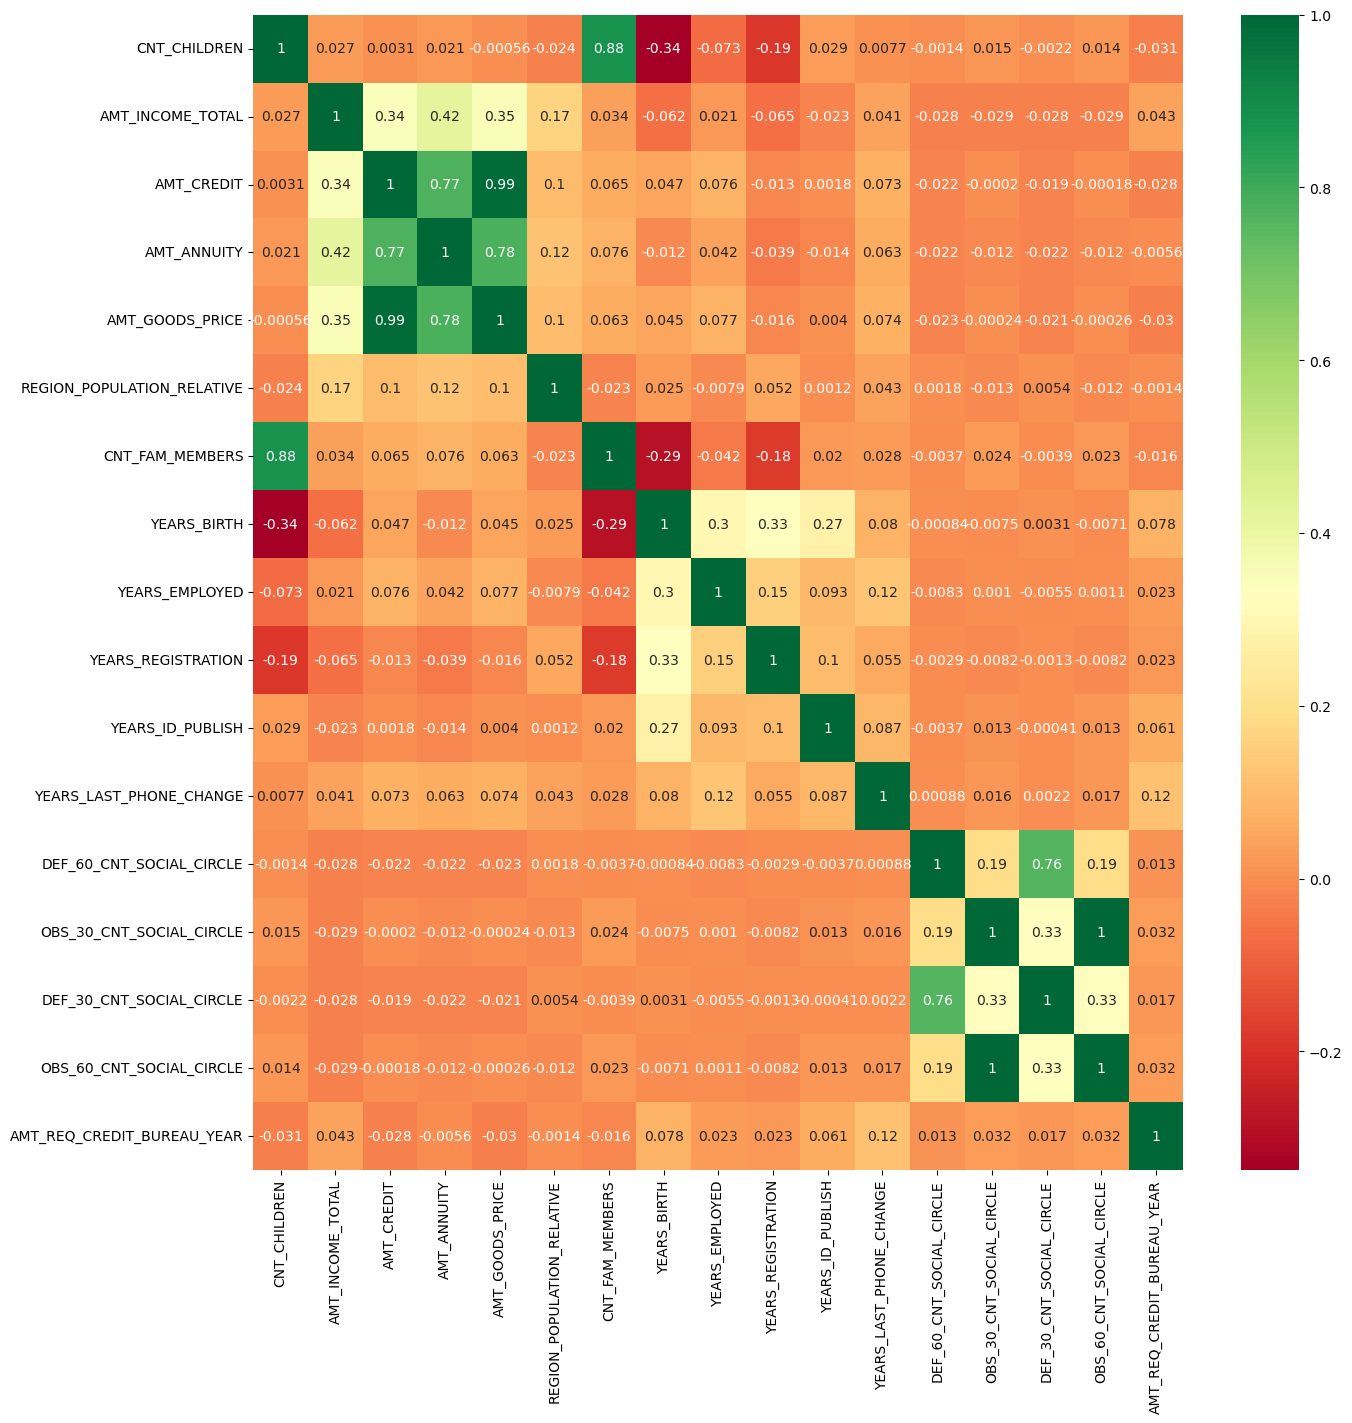

In [231]:
# Observing correlation between all the numerical cols for applicants who are paying on time

TARGET_VAR_0_Numer_cols = TARGET_VAR_0[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
       'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR']]

plt.figure(figsize=[15,15])
sns.heatmap(data=TARGET_VAR_0_Numer_cols.corr(), annot=True , cmap= "RdYlGn" )

plt.show()

In [232]:
TARGET_VAR_0_CORR_MATRIX_0 = TARGET_VAR_0_Numer_cols.corr()
TARGET_VAR_0_CORR_MATRIX_0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                    1.000000          0.027397    0.003081   
AMT_INCOME_TOTAL                0.027397          1.000000    0.342799   
AMT_CREDIT                      0.003081          0.342799    1.000000   
AMT_ANNUITY                     0.020909          0.418948    0.771297   
AMT_GOODS_PRICE                -0.000559          0.349426    0.987022   
REGION_POPULATION_RELATIVE     -0.024363          0.167851    0.100604   
CNT_FAM_MEMBERS                 0.878571          0.034254    0.064536   
YEARS_BIRTH                    -0.336907         -0.062494    0.047366   
YEARS_EMPLOYED                 -0.073167          0.020642    0.075719   
YEARS_REGISTRATION             -0.185818         -0.064883   -0.013375   
YEARS_ID_PUBLISH                0.028867         -0.022770    0.001778   
YEARS_LAST_PHONE_CHANGE         0.007724          0.040691    0.072698   
DEF_60_CNT_SOCIAL_CIRCLE       -0.001361         -0.028401   -0.021628   
OBS_30_CNT_SOCIAL_CIRCLE        0.014532         -0.028647   -0.000199   
DEF_30_CNT_SOCIAL_CIRCLE       -0.002193         -0.027998   -0.019433   
OBS_60_CNT_SOCIAL_CIRCLE        0.014199         -0.028507   -0.000180   
AMT_REQ_CREDIT_BUREAU_YEAR     -0.030513          0.042522   -0.027599   

                            AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   0.020909        -0.000559   
AMT_INCOME_TOTAL               0.418948         0.349426   
AMT_CREDIT                     0.771297         0.987022   
AMT_ANNUITY                    1.000000         0.776421   
AMT_GOODS_PRICE                0.776421         1.000000   
REGION_POPULATION_RELATIVE     0.120977         0.103826   
CNT_FAM_MEMBERS                0.075789         0.062763   
YEARS_BIRTH                   -0.012251         0.044637   
YEARS_EMPLOYED                 0.041753         0.076842   
YEARS_REGISTRATION            -0.039303        -0.015806   
YEARS_ID_PUBLISH              -0.013915         0.004011   
YEARS_LAST_PHONE_CHANGE        0.063098         0.073970   
DEF_60_CNT_SOCIAL_CIRCLE      -0.022419        -0.022596   
OBS_30_CNT_SOCIAL_CIRCLE      -0.012473        -0.000241   
DEF_30_CNT_SOCIAL_CIRCLE      -0.022160        -0.020731   
OBS_60_CNT_SOCIAL_CIRCLE      -0.012277        -0.000259   
AMT_REQ_CREDIT_BUREAU_YEAR    -0.005588        -0.029840   

                            REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
CNT_CHILDREN                                 -0.024363         0.878571   
AMT_INCOME_TOTAL                              0.167851         0.034254   
AMT_CREDIT                                    0.100604         0.064536   
AMT_ANNUITY                                   0.120977         0.075789   
AMT_GOODS_PRICE                               0.103826         0.062763   
REGION_POPULATION_RELATIVE                    1.000000        -0.023425   
CNT_FAM_MEMBERS                              -0.023425         1.000000   
YEARS_BIRTH                                   0.025332        -0.285804   
YEARS_EMPLOYED                               -0.007934        -0.042128   
YEARS_REGISTRATION                            0.052083        -0.175700   
YEARS_ID_PUBLISH                              0.001239         0.020442   
YEARS_LAST_PHONE_CHANGE                       0.042628         0.027820   
DEF_60_CNT_SOCIAL_CIRCLE                      0.001753        -0.003712   
OBS_30_CNT_SOCIAL_CIRCLE                     -0.013009         0.023685   
DEF_30_CNT_SOCIAL_CIRCLE                      0.005409        -0.003923   
OBS_60_CNT_SOCIAL_CIRCLE                     -0.012493         0.023370   
AMT_REQ_CREDIT_BUREAU_YEAR                   -0.001427        -0.016283   

                            YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  \
CNT_CHILDREN                  -0.336907       -0.073167           -0.185818   
AMT_INCOME_TOTAL              -0.062494        0.020642           -0.064883   
AMT_CREDIT                

In [233]:
TARGET_VAR_0_CORR_MATRIX_0[TARGET_VAR_0_CORR_MATRIX_0<1].unstack().sort_values(ascending=False).head(20)

OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998510
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998510
AMT_GOODS_PRICE           AMT_CREDIT                  0.987022
AMT_CREDIT                AMT_GOODS_PRICE             0.987022
CNT_FAM_MEMBERS           CNT_CHILDREN                0.878571
CNT_CHILDREN              CNT_FAM_MEMBERS             0.878571
AMT_ANNUITY               AMT_GOODS_PRICE             0.776421
AMT_GOODS_PRICE           AMT_ANNUITY                 0.776421
AMT_CREDIT                AMT_ANNUITY                 0.771297
AMT_ANNUITY               AMT_CREDIT                  0.771297
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.760970
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.760970
AMT_INCOME_TOTAL          AMT_ANNUITY                 0.418948
AMT_ANNUITY               AMT_INCOME_TOTAL            0.418948
AMT_GOODS_PRICE           AMT_INCOME_TOTAL            0.349426
AMT_INCOME_TOTAL          AMT_GOODS_PRICE             0

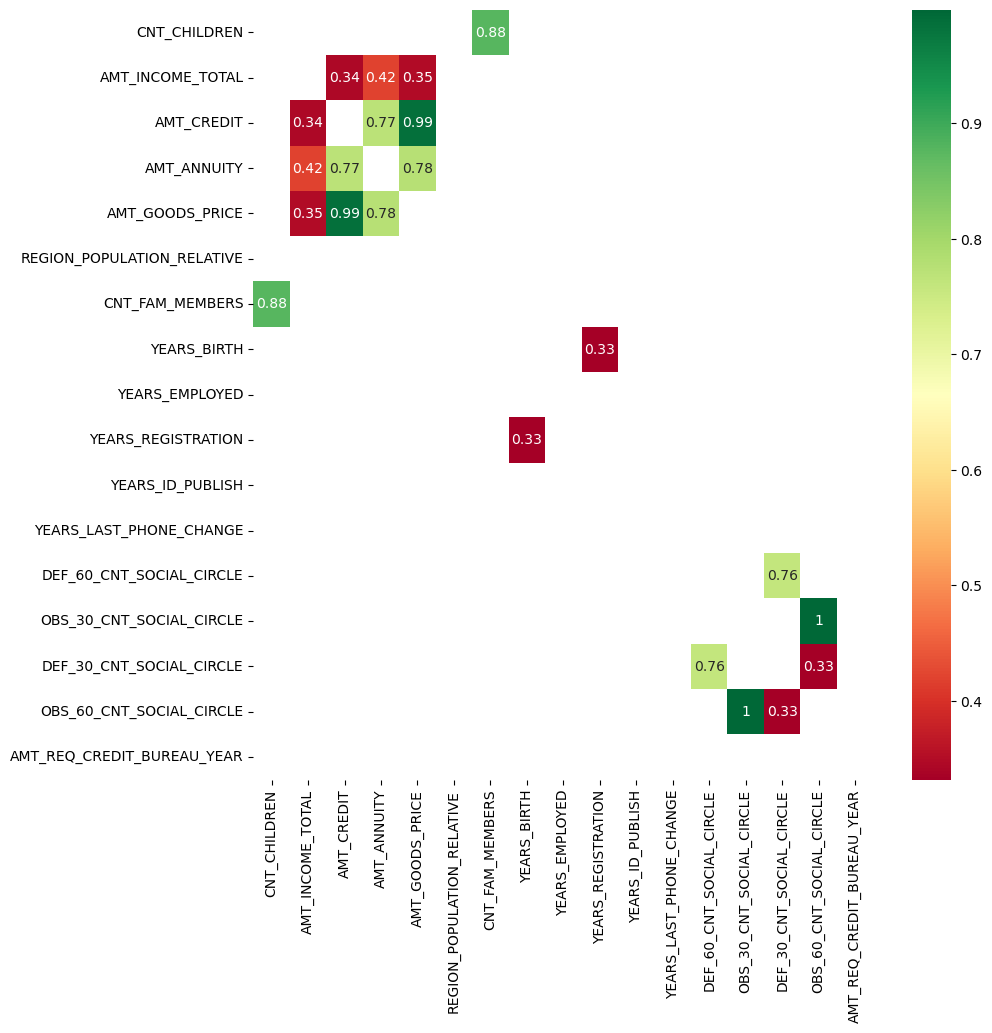

In [352]:
# Observing top 10 correlation between the numerical cols for applicants who are facing difficluties in payment

plt.figure(figsize=[10,10])
sns.heatmap(data=TARGET_VAR_0_CORR_MATRIX_0[(TARGET_VAR_0_CORR_MATRIX_0<1) & (TARGET_VAR_0_CORR_MATRIX_0>=0.33)], annot=True , cmap= "RdYlGn" )

plt.show()

Based on mulrivariate analysis for TARGET_VAR_0_CORR_MATRIX_0, we identified the top 10 correlation between for applicants who are paying on time:

1. OBS_60_CNT_SOCIAL_CIRCLE vs OBS_30_CNT_SOCIAL_CIRCLE    
2. AMT_GOODS_PRICE vs AMT_CREDIT
3. CNT_CHILDREN vs CNT_FAM_MEMBERS
4. AMT_GOODS_PRICE vs AMT_ANNUITY
5. AMT_CREDIT vs AMT_ANNUITY
6. DEF_30_CNT_SOCIAL_CIRCLE vs DEF_60_CNT_SOCIAL_CIRCLE  
7. AMT_INCOME_TOTAL vs AMT_ANNUITY
8. AMT_GOODS_PRICE vs AMT_INCOME_TOTAL
9. AMT_CREDIT vs AMT_INCOME_TOTAL
10. YEARS_BIRTH vs YEARS_REGISTRATION

## Analysis of PAD(Previous Application Data)

In [234]:
# Reading Previous Application Data file

PAD = pd.read_csv("previous_application.csv.crdownload")

In [235]:
PAD.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [236]:
PAD.shape

(1249943, 37)

### Missing Value Treatment

In [237]:
# Checking the null values for PAD df

Count_of_nulls = PAD.isnull().sum().sort_values(ascending=False)/len(PAD)*100
Count_of_nulls

RATE_INTEREST_PRIVILEGED       99.644864
RATE_INTEREST_PRIMARY          99.644864
AMT_DOWN_PAYMENT               53.345713
RATE_DOWN_PAYMENT              53.345713
NAME_TYPE_SUITE                49.111119
NFLAG_INSURED_ON_APPROVAL      40.135510
DAYS_TERMINATION               40.135510
DAYS_LAST_DUE                  40.135510
DAYS_LAST_DUE_1ST_VERSION      40.135430
DAYS_FIRST_DUE                 40.135430
DAYS_FIRST_DRAWING             40.135430
AMT_GOODS_PRICE                22.972088
AMT_ANNUITY                    22.209253
CNT_PAYMENT                    22.209013
PRODUCT_COMBINATION             0.021121
AMT_CREDIT                      0.000080
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [238]:
# Comvining all the cols which have more than 40% missing values as Col_to_be_deleted_1

Col_to_be_deleted_1 = Count_of_nulls[Count_of_nulls>40].index
Col_to_be_deleted_1

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],
      dtype='object')

In [239]:
# Dropping Col_to_be_deleted_1 from PAD df

PAD.drop(Col_to_be_deleted_1, axis=1, inplace=True)

In [240]:
PAD.shape

(1249943, 26)

In [241]:
PAD.isnull().sum().sort_values(ascending=False)/len(PAD)*100

AMT_GOODS_PRICE                22.972088
AMT_ANNUITY                    22.209253
CNT_PAYMENT                    22.209013
PRODUCT_COMBINATION             0.021121
AMT_CREDIT                      0.000080
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

### Standerdizing the data

In [242]:
PAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249943 entries, 0 to 1249942
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1249943 non-null  int64  
 1   SK_ID_CURR                   1249943 non-null  int64  
 2   NAME_CONTRACT_TYPE           1249943 non-null  object 
 3   AMT_ANNUITY                  972340 non-null   float64
 4   AMT_APPLICATION              1249943 non-null  float64
 5   AMT_CREDIT                   1249942 non-null  float64
 6   AMT_GOODS_PRICE              962805 non-null   float64
 7   WEEKDAY_APPR_PROCESS_START   1249943 non-null  object 
 8   HOUR_APPR_PROCESS_START      1249943 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1249943 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1249943 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1249943 non-null  object 
 12  NAME_CONTRACT_STATUS         1249943 non-n

In [243]:
# Investigating for AMT_GOODS_PRICE col

# Approx. 22% data is missing for AMT_GOODS_PRICE col. Imputing the data can lead to bias in the data hence we will not impute the data

PAD.AMT_GOODS_PRICE.describe()

count    9.628050e+05
mean     2.264314e+05
std      3.138667e+05
min      0.000000e+00
25%      5.062050e+04
50%      1.114650e+05
75%      2.295000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [244]:
# Investigating for AMT_ANNUITY col

# Approx. 22% data is missing for AMT_ANNUITY col. Imputing the data can lead to bias in the data hence we will not impute the data

PAD.AMT_ANNUITY.describe()

count    972340.000000
mean      15895.020651
std       14744.203997
min           0.000000
25%        6300.000000
50%       11250.000000
75%       20530.451250
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

In [245]:
# Investigating for CNT_PAYMENT col

# Approx. 22% data is missing for CNT_PAYMENT col. Imputing the data can lead to bias in the data hence we will not impute the data

PAD.CNT_PAYMENT.describe()

count    972343.000000
mean         16.003671
std          14.514990
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64

In [246]:
# Investigating for PRODUCT_COMBINATION col

PAD.PRODUCT_COMBINATION.value_counts()

Cash                              212644
POS household with interest       199057
POS mobile with interest          165969
Cash X-Sell: middle               107057
Cash X-Sell: low                   96604
Card Street                        84274
POS industry with interest         74374
POS household without interest     62724
Card X-Sell                        60135
Cash Street: high                  44494
Cash X-Sell: high                  43986
Cash Street: middle                25713
Cash Street: low                   25187
POS mobile without interest        18111
POS other with interest            17963
POS industry without interest       9420
POS others without interest         1967
Name: PRODUCT_COMBINATION, dtype: int64

In [247]:
PAD.PRODUCT_COMBINATION.mode()[0]

'Cash'

In [248]:
PAD.PRODUCT_COMBINATION.isnull().sum()

264

In [249]:
# PRODUCT_COMBINATION has small number of missing values hence we can replace it with mode i.e. cash

PAD.PRODUCT_COMBINATION.fillna(PAD.PRODUCT_COMBINATION.mode()[0], inplace=True)



In [250]:
PAD.PRODUCT_COMBINATION.isnull().sum()

0

In [251]:
# Investigating for AMT_CREDIT col

PAD.AMT_CREDIT.isnull().sum()

1

In [252]:
PAD.AMT_CREDIT.describe()

count    1.249942e+06
mean     1.951216e+05
std      3.171872e+05
min      0.000000e+00
25%      2.429550e+04
50%      8.025750e+04
75%      2.156400e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [253]:
# As mean is quite lower as compared to median, we will impute the median replacing the null value

PAD.AMT_CREDIT.fillna(PAD.AMT_CREDIT.median(), inplace=True)

In [254]:
PAD.AMT_CREDIT.isnull().sum()

0

In [255]:
# Checking the null values again

PAD.isnull().sum().sort_values(ascending=False)/len(PAD)*100

AMT_GOODS_PRICE                22.972088
AMT_ANNUITY                    22.209253
CNT_PAYMENT                    22.209013
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
DAYS_DECISION                   0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_CREDIT                      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [256]:
# Checking the unique values 

PAD.nunique()

SK_ID_PREV                     1249943
SK_ID_CURR                      319707
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     310536
AMT_APPLICATION                  82147
AMT_CREDIT                       79020
AMT_GOODS_PRICE                  82147
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2050
NAME_SELLER_INDUSTRY                11
CNT_PAYMENT                         49
NAME_YIELD_GROUP                     5
PRODUCT_COMBINATION      

In [257]:
PAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249943 entries, 0 to 1249942
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1249943 non-null  int64  
 1   SK_ID_CURR                   1249943 non-null  int64  
 2   NAME_CONTRACT_TYPE           1249943 non-null  object 
 3   AMT_ANNUITY                  972340 non-null   float64
 4   AMT_APPLICATION              1249943 non-null  float64
 5   AMT_CREDIT                   1249943 non-null  float64
 6   AMT_GOODS_PRICE              962805 non-null   float64
 7   WEEKDAY_APPR_PROCESS_START   1249943 non-null  object 
 8   HOUR_APPR_PROCESS_START      1249943 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1249943 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1249943 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1249943 non-null  object 
 12  NAME_CONTRACT_STATUS         1249943 non-n

In [258]:
PAD_Numer_cols = PAD.select_dtypes(["int64", "float64"]).columns
PAD_Numer_cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [259]:
# Remove 'SK_ID_PREV', 'SK_ID_CURR' and 'NFLAG_LAST_APPL_IN_DAY'

PAD_Numer_cols = PAD_Numer_cols.drop(['SK_ID_PREV', 'SK_ID_CURR', 'NFLAG_LAST_APPL_IN_DAY' ]  )


In [260]:
PAD_Numer_cols

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

### Outlier analysis

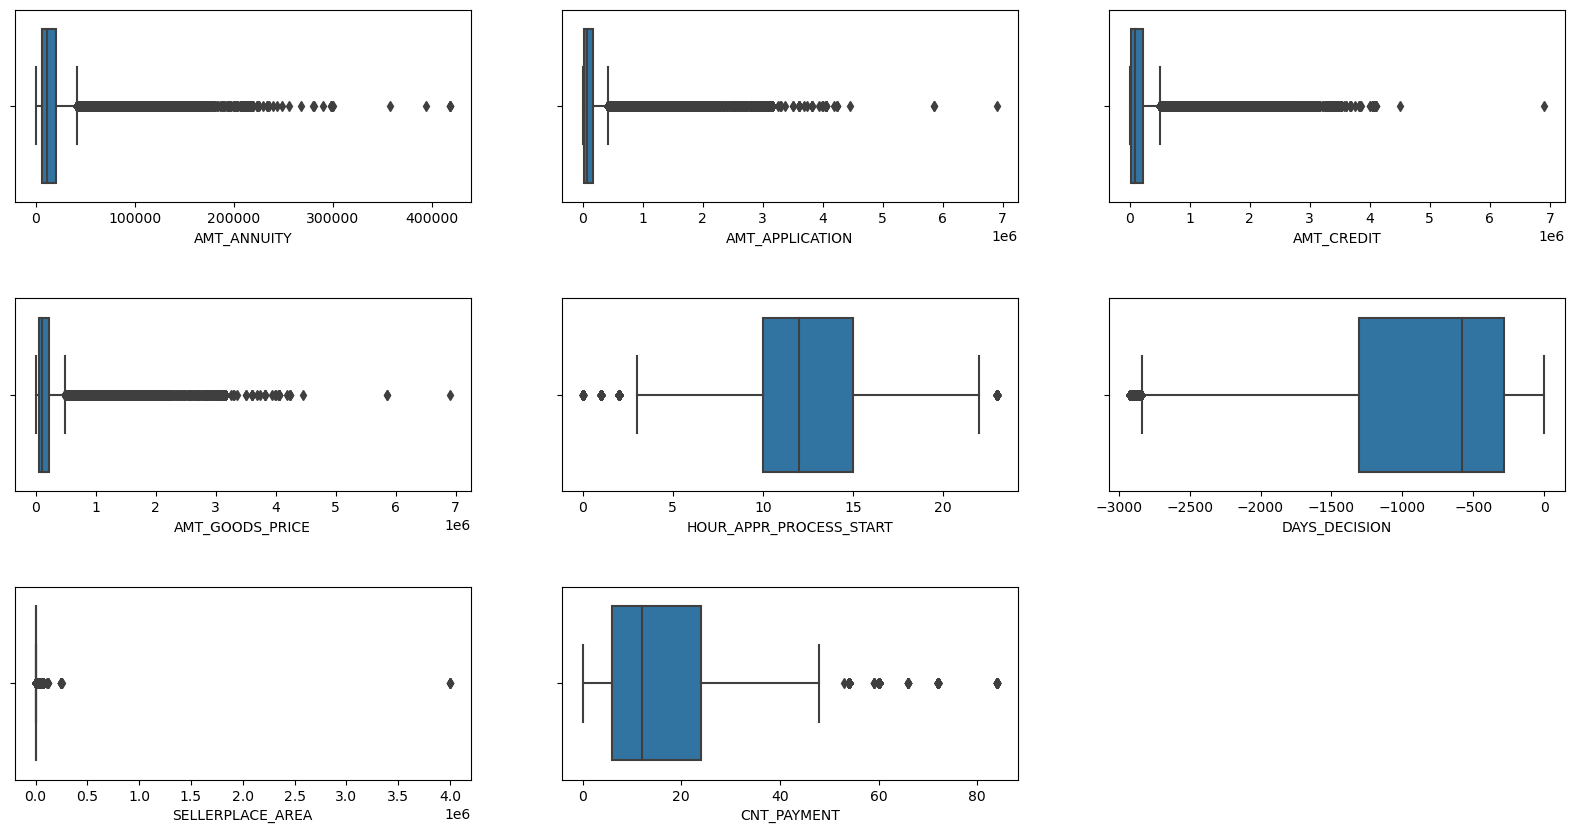

In [261]:
x=1

plt.figure(figsize=[20,10])
plt.subplots_adjust(hspace=0.5, wspace=0.2)

for i in PAD_Numer_cols:
    plt.subplot(3,3,x)
    sns.boxplot(PAD[i])
    x+=1
    
plt.show()
    

In [262]:
# Investigating PAD_Numer_cols to check outliers

PAD[PAD_Numer_cols].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  \
count  972340.000000     1.249943e+06  1.249943e+06     9.628050e+05   
mean    15895.020651     1.743948e+05  1.951216e+05     2.264314e+05   
std     14744.203997     2.914511e+05  3.171871e+05     3.138667e+05   
min         0.000000     0.000000e+00  0.000000e+00     0.000000e+00   
25%      6300.000000     1.895850e+04  2.429550e+04     5.062050e+04   
50%     11250.000000     7.087500e+04  8.025750e+04     1.114650e+05   
75%     20530.451250     1.800000e+05  2.156400e+05     2.295000e+05   
max    418058.145000     6.905160e+06  6.905160e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  DAYS_DECISION  SELLERPLACE_AREA    CNT_PAYMENT  
count             1.249943e+06   1.249943e+06      1.249943e+06  972343.000000  
mean              1.248749e+01  -8.824622e+02      3.164415e+02      16.003671  
std               3.333099e+00   7.796460e+02      7.361404e+03      14.514990  
min               0.000000e+00  -2.922000e+03     -1.000000e+00       0.000000  
25%               1.000000e+01  -1.304000e+03     -1.000000e+00       6.000000  
50%               1.200000e+01  -5.830000e+02      4.000000e+00      12.000000  
75%               1.500000e+01  -2.810000e+02      8.500000e+01      24.000000  
max               2.300000e+01  -1.000000e+00      4.000000e+06      84.000000

In [263]:
PAD[PAD_Numer_cols].quantile([0.25, 0.50, 0.75, 0.90, 0.95, 0.99  ])

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0.25   6300.00000          18958.5     24295.5          50620.5   
0.50  11250.00000          70875.0     80257.5         111465.0   
0.75  20530.45125         180000.0    215640.0         229500.0   
0.90  34512.75000         450000.0    528772.5         585000.0   
0.95  45253.44000         778500.0    879498.0         900000.0   
0.99  69498.00000        1350000.0   1506816.0        1377000.0   

      HOUR_APPR_PROCESS_START  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  
0.25                     10.0        -1304.0              -1.0          6.0  
0.50                     12.0         -583.0               4.0         12.0  
0.75                     15.0         -281.0              85.0         24.0  
0.90                     17.0         -152.0             939.0         36.0  
0.95                     18.0          -86.0            1873.9         48.0  
0.99                     20.0          -14.0            3560.0         60.0

#### Based on the analysis using box plots, central tendencies and percentile information, we can determine the below observations:

1. AMT_ANNUITY : Annuity amount above 45K are the outliers although no action is required since annuity amount can be higher based on the loan taken
2. AMT_APPLICATION : Amount applicantion more than 450K considered as outliers but no actions are required since applicants may ask for higher credit on the previous application
3. AMT_CREDIT :Amount credit more than 528K considered as outliers but no actions are required since the applicants may have higher loans
4. AMT_GOODS_PRICE : Amount Goods' price above 585K can be considered as outliers but no action is required since some applicants may have higher loans
5. AMT_GOODS_PRICE : Selling area more than 939 can be considered as outliers but no action is required

### Analysis of Categorical Varibale

In [264]:
PAD_Categorical_cols = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', "NFLAG_LAST_APPL_IN_DAY"]

In [265]:
PAD[PAD_Categorical_cols].head()

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0     Consumer loans                   SATURDAY                           Y   
1         Cash loans                   THURSDAY                           Y   
2         Cash loans                    TUESDAY                           Y   
3         Cash loans                     MONDAY                           Y   
4         Cash loans                   THURSDAY                           Y   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                    XAP             Approved  Cash through the bank   
1                    XNA             Approved                    XNA   
2                    XNA             Approved  Cash through the bank   
3                    XNA             Approved  Cash through the bank   
4                Repairs              Refused  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_SELLER_INDUSTRY  \
0               XNA             Country-wide         Connectivity   
1            x-sell           Contact center                  XNA   
2            x-sell  Credit and cash offices                  XNA   
3            x-sell  Credit and cash offices                  XNA   
4           walk-in  Credit and cash offices                  XNA   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  NFLAG_LAST_APPL_IN_DAY  
0           middle  POS mobile with interest                       1  
1       low_action          Cash X-Sell: low                       1  
2             high         Cash X-Sell: high                       1  
3           middle       Cash X-Sell: middle                       1  
4             high         Cash Street: high                       1

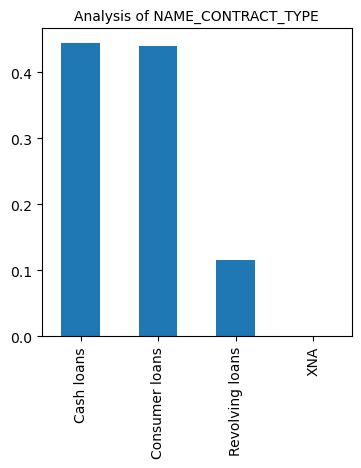

In [266]:
# Analysis of NAME_CONTRACT_TYPE col

plt.figure(figsize=[4,4])

PAD.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_CONTRACT_TYPE", fontdict={"fontsize" : 10})

plt.show()

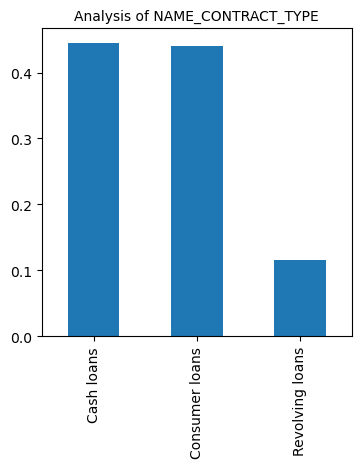

In [267]:
# Removing "XNA" from NAME_CONTRACT_TYPE col

plt.figure(figsize=[4,4])

PAD.loc[(PAD.NAME_CONTRACT_TYPE != "XNA"), "NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_CONTRACT_TYPE", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants (~45%) have cash and consumer contract product type

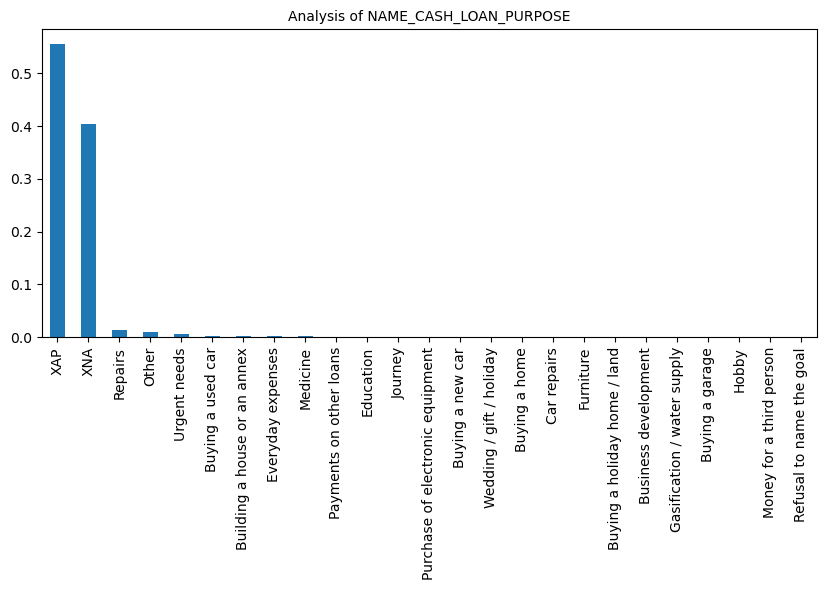

In [268]:
# Analysis of NAME_CASH_LOAN_PURPOSE col

plt.figure(figsize=[10,4])

PAD.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_CASH_LOAN_PURPOSE", fontdict={"fontsize" : 10})

plt.show()

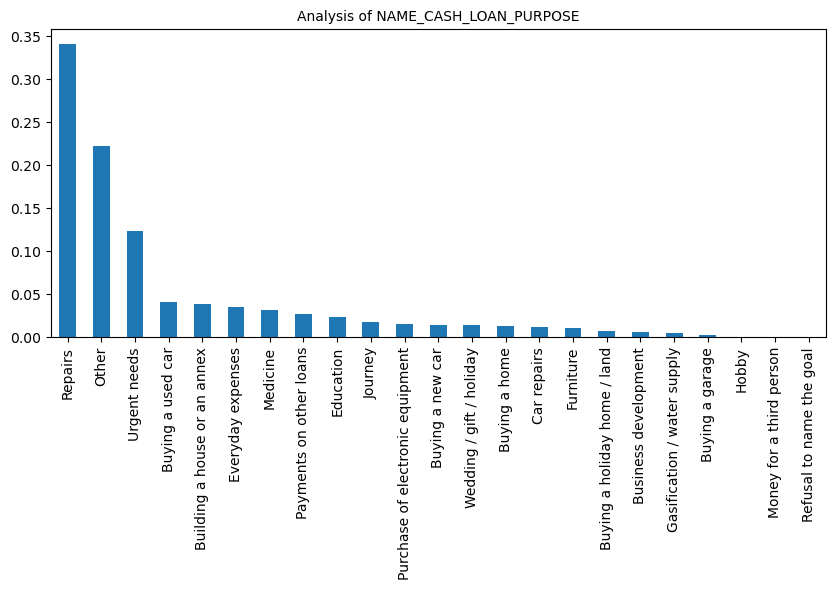

In [269]:
# Removing "XNA" and "XAP" from NAME_CASH_LOAN_PURPOSE col

plt.figure(figsize=[10,4])

PAD[~((PAD.NAME_CASH_LOAN_PURPOSE == "XAP") | (PAD.NAME_CASH_LOAN_PURPOSE == "XNA"))] ["NAME_CASH_LOAN_PURPOSE"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_CASH_LOAN_PURPOSE", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants' purpose behind the cash loan is either due to Repairs, urgent needs and other reasons

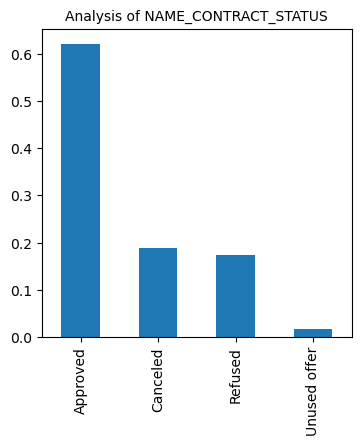

In [270]:
# Analysis of NAME_CONTRACT_STATUS col

plt.figure(figsize=[4,4])

PAD.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_CONTRACT_STATUS", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants (~60%) have approved contract status on previous application

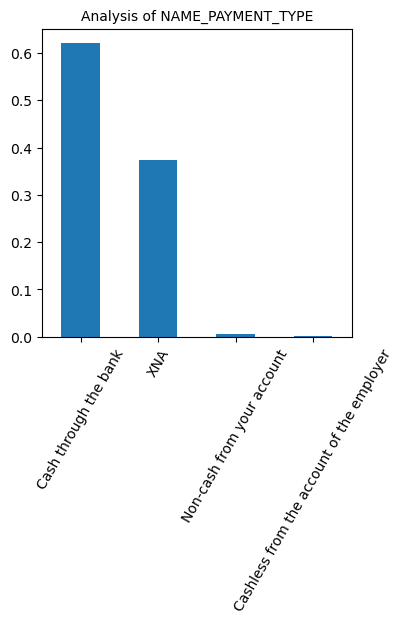

In [271]:
# Analysis of NAME_PAYMENT_TYPE col

plt.figure(figsize=[4,4])

PAD.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_PAYMENT_TYPE", fontdict={"fontsize" : 10})
plt.xticks(rotation=60)

plt.show()

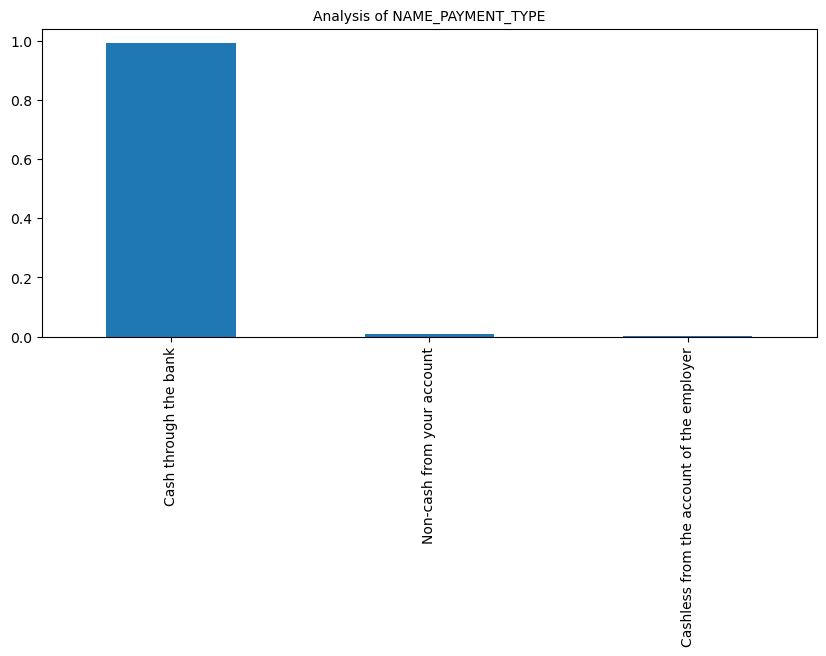

In [272]:
# Removing "XNA" from NAME_PAYMENT_TYPE col

plt.figure(figsize=[10,4])

PAD[~(PAD.NAME_PAYMENT_TYPE == "XNA")] ["NAME_PAYMENT_TYPE"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_PAYMENT_TYPE", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants (>90%) chose to pay through cash on previous application

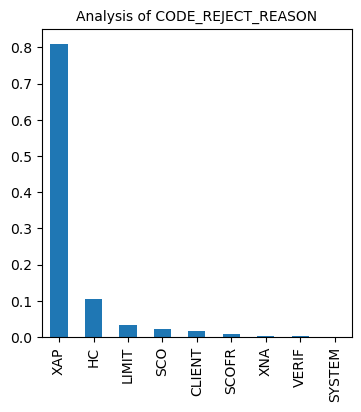

In [273]:
# Analysis of CODE_REJECT_REASON col

plt.figure(figsize=[4,4])

PAD.CODE_REJECT_REASON.value_counts(normalize=True).plot.bar()

plt.title("Analysis of CODE_REJECT_REASON", fontdict={"fontsize" : 10})

plt.show()

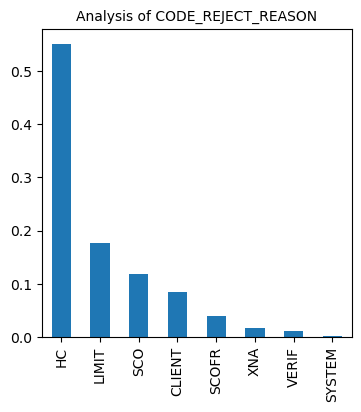

In [274]:
# Removing "XAP" from CODE_REJECT_REASON col

plt.figure(figsize=[4,4])

PAD.loc[(PAD.CODE_REJECT_REASON != "XAP"), "CODE_REJECT_REASON"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of CODE_REJECT_REASON", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants' (>50%) application were rejected due to High credit

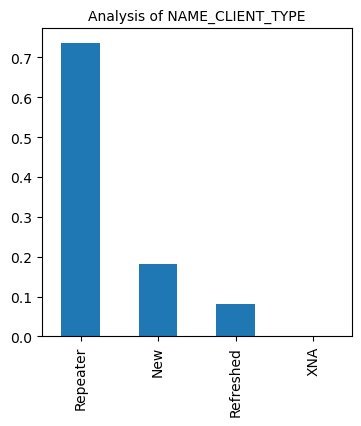

In [275]:
# Analysis of NAME_CLIENT_TYPE col

plt.figure(figsize=[4,4])

PAD.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_CLIENT_TYPE", fontdict={"fontsize" : 10})

plt.show()

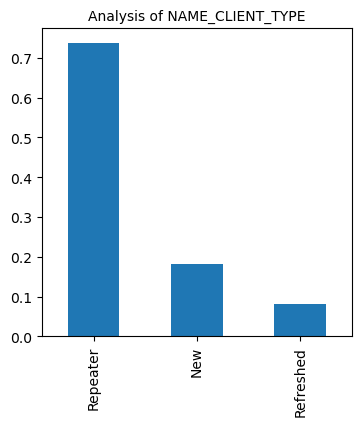

In [276]:
# Removing "XNA" from NAME_CLIENT_TYPE col

plt.figure(figsize=[4,4])

PAD.loc[(PAD.NAME_CLIENT_TYPE != "XNA"), "NAME_CLIENT_TYPE"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_CLIENT_TYPE", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants are repeaters

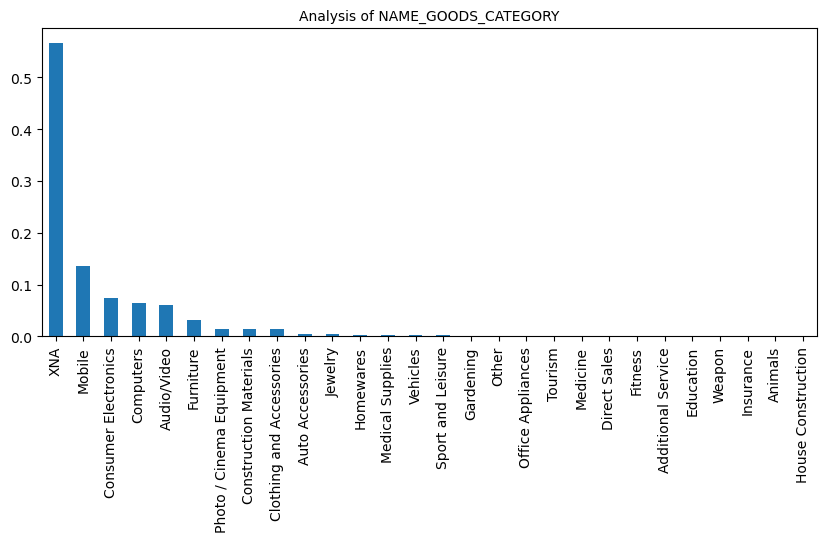

In [277]:
# Analysis of NAME_GOODS_CATEGORY col

plt.figure(figsize=[10,4])

PAD.NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_GOODS_CATEGORY", fontdict={"fontsize" : 10})

plt.show()

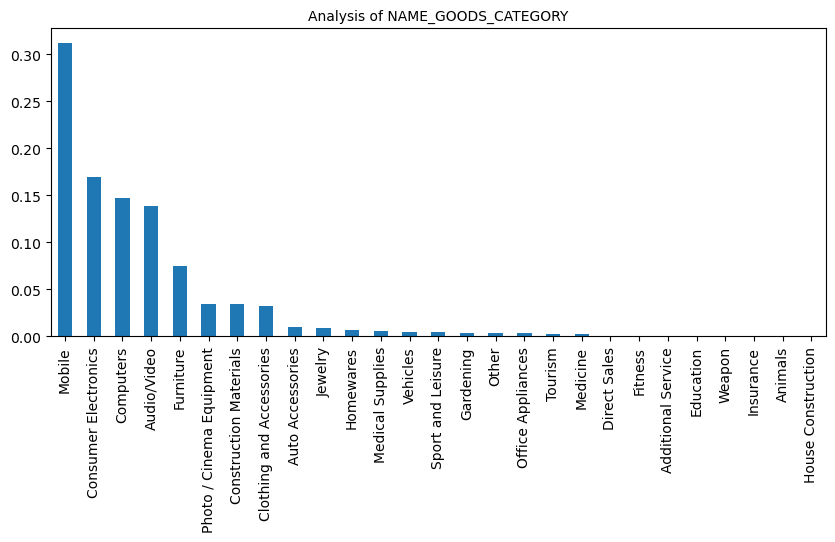

In [278]:
# Removing "XNA" from NAME_GOODS_CATEGORY col

plt.figure(figsize=[10,4])

PAD.loc[(PAD.NAME_GOODS_CATEGORY != "XNA"), "NAME_GOODS_CATEGORY"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_GOODS_CATEGORY", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants applied for Mobile application in the previous application

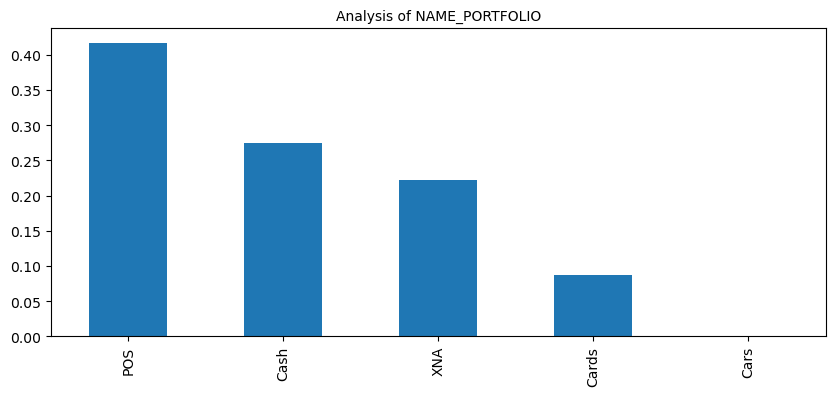

In [279]:
# Analysis of NAME_PORTFOLIO col

plt.figure(figsize=[10,4])

PAD.NAME_PORTFOLIO.value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_PORTFOLIO", fontdict={"fontsize" : 10})

plt.show()

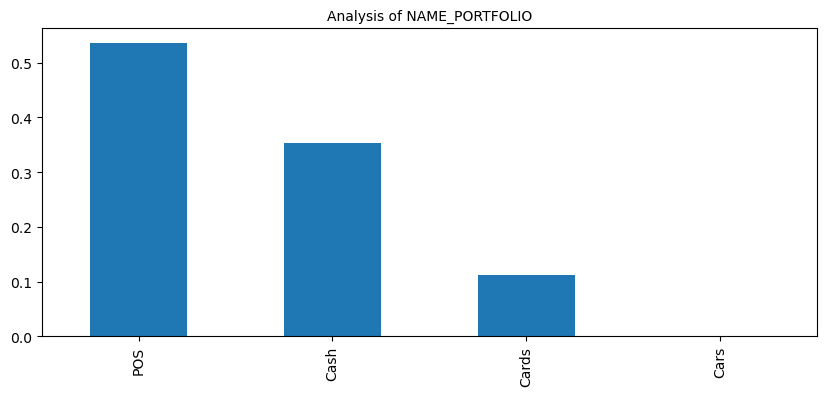

In [280]:
# Removing "XNA" from NAME_PORTFOLIO col

plt.figure(figsize=[10,4])

PAD.loc[(PAD.NAME_PORTFOLIO != "XNA"), "NAME_PORTFOLIO"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_PORTFOLIO", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants were having POS followed by cash as previous applications

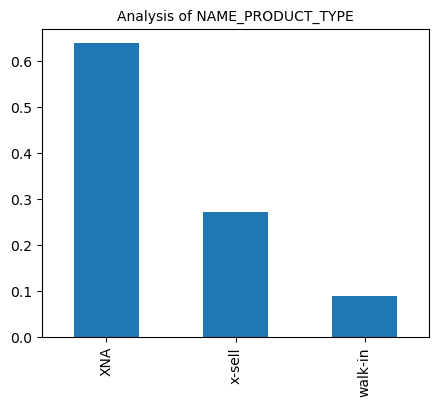

In [281]:
# Analysis of NAME_PRODUCT_TYPE col

plt.figure(figsize=[5,4])

PAD.NAME_PRODUCT_TYPE.value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_PRODUCT_TYPE", fontdict={"fontsize" : 10})

plt.show()

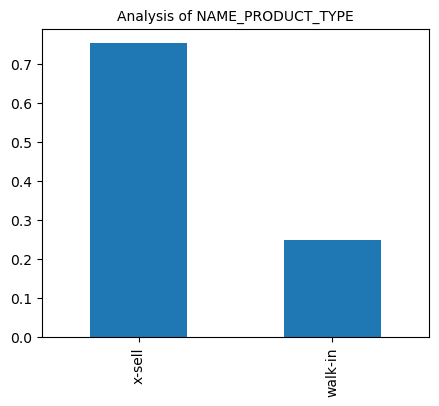

In [282]:
# Removing "XNA" from NAME_PRODUCT_TYPE col

plt.figure(figsize=[5,4])

PAD.loc[(PAD.NAME_PRODUCT_TYPE != "XNA"), "NAME_PRODUCT_TYPE"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_PRODUCT_TYPE", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants were having x-sell in their previous applications

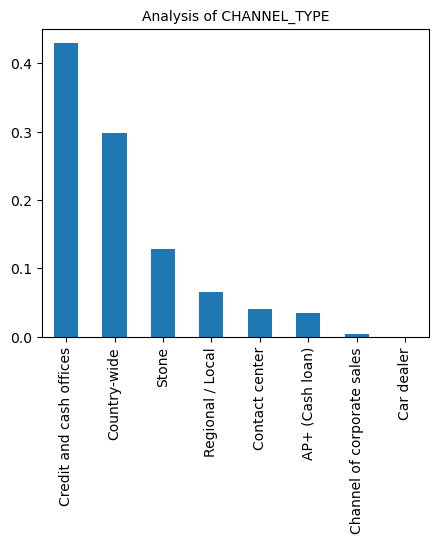

In [283]:
# Analysis of CHANNEL_TYPE col

plt.figure(figsize=[5,4])

PAD.CHANNEL_TYPE.value_counts(normalize=True).plot.bar()

plt.title("Analysis of CHANNEL_TYPE", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants were acquired via credit and cash offices followed by country-wide in their previous applications

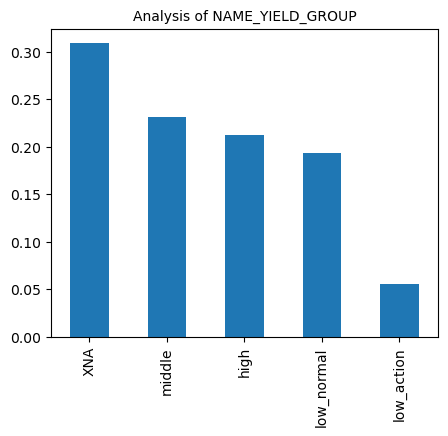

In [284]:
# Analysis of NAME_YIELD_GROUP col

plt.figure(figsize=[5,4])

PAD.NAME_YIELD_GROUP.value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_YIELD_GROUP", fontdict={"fontsize" : 10})

plt.show()

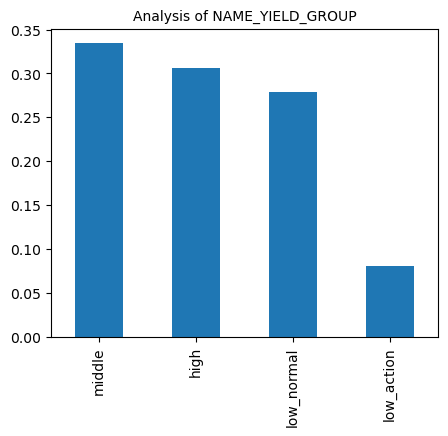

In [285]:
# Removing "XNA" from NAME_SELLER_INDUSTRY col

plt.figure(figsize=[5,4])

PAD.loc[(PAD.NAME_YIELD_GROUP != "XNA"), "NAME_YIELD_GROUP"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of NAME_YIELD_GROUP", fontdict={"fontsize" : 10})

plt.show()

Majority of applicants were having grouped interest rate into middle and high in their previous application

### Analysis of Numerical Varibale

In [286]:
PAD[PAD_Numer_cols].head()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0     1730.430          17145.0     17145.0          17145.0   
1    25188.615         607500.0    679671.0         607500.0   
2    15060.735         112500.0    136444.5         112500.0   
3    47041.335         450000.0    470790.0         450000.0   
4    31924.395         337500.0    404055.0         337500.0   

   HOUR_APPR_PROCESS_START  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  
0                       15            -73                35         12.0  
1                       11           -164                -1         36.0  
2                       11           -301                -1         12.0  
3                        7           -512                -1         12.0  
4                        9           -781                -1         24.0

<AxesSubplot:xlabel='AMT_APPLICATION', ylabel='Count'>

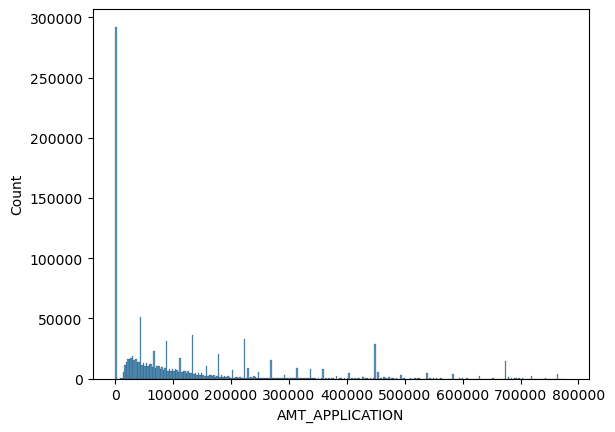

In [287]:
# Analysis for AMT_APPLICATION col

sns.histplot(PAD[PAD.AMT_APPLICATION <= PAD.AMT_APPLICATION.quantile(0.95)]["AMT_APPLICATION"])

In [288]:
# For better visibility in analysis, we will create bins for AMT_APPLICATION col 

PAD["AMT_APPLICATION_BINS"] = pd.cut(PAD.AMT_APPLICATION, bins=4, labels= ["L", "M", "H", "VH"])

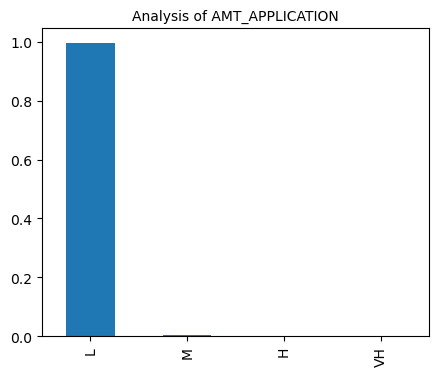

In [289]:

plt.figure(figsize=[5,4])
PAD["AMT_APPLICATION_BINS"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of AMT_APPLICATION", fontdict={"fontsize" : 10})
plt.show()

In [290]:
PAD["AMT_APPLICATION_BINS"].value_counts()

L     1243831
M        6079
H          30
VH          3
Name: AMT_APPLICATION_BINS, dtype: int64

Majority of clients ask for less than 1243K credit in their previous application

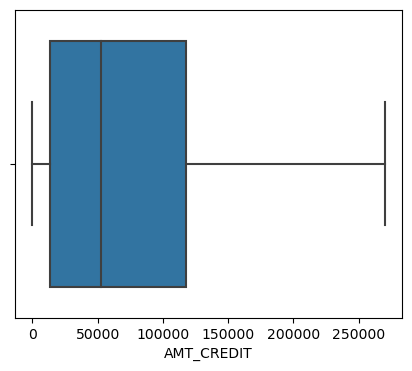

In [291]:
# Analysis for AMT_CREDIT col

plt.figure(figsize=[5,4])
sns.boxplot(PAD[PAD.AMT_CREDIT <= PAD.AMT_CREDIT.quantile(0.80)]["AMT_CREDIT"])
plt.show()

In [292]:
# For better visibility in analysis, we will create bins for AMT_CREDIT col 

PAD["AMT_CREDIT_BINS"] = pd.cut(PAD.AMT_CREDIT, bins=4, labels= ["L", "M", "H", "VH"])

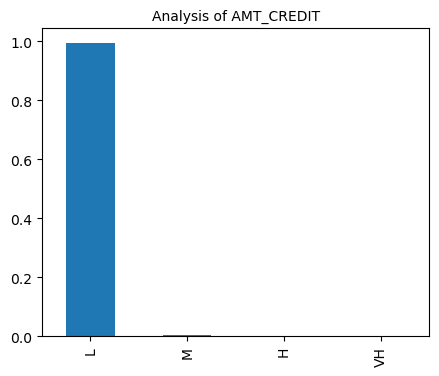

In [293]:

plt.figure(figsize=[5,4])
PAD["AMT_CREDIT_BINS"].value_counts(normalize=True).plot.bar()

plt.title("Analysis of AMT_CREDIT", fontdict={"fontsize" : 10})
plt.show()

In [294]:
PAD["AMT_CREDIT_BINS"].value_counts(normalize=True)*100

L     99.406213
M      0.580266
H      0.013441
VH     0.000080
Name: AMT_CREDIT_BINS, dtype: float64

Majority of clients distributed for less than 1243K credit loan in their previous application

In [295]:
# Analysis for DAYS_DECISION col

PAD["YEARS_DECISION"] = PAD.DAYS_DECISION.apply(lambda x : round(abs(x/365),0))

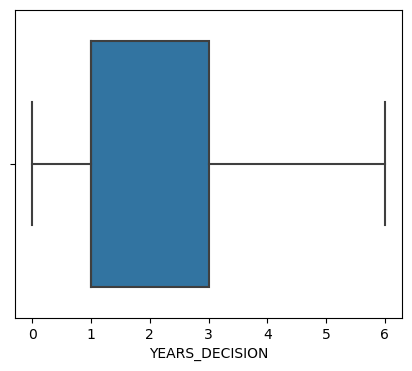

In [296]:
# Analysis for YEARS_DECISION col

plt.figure(figsize=[5,4])
sns.boxplot(PAD[PAD.YEARS_DECISION <= PAD.YEARS_DECISION.quantile(0.90)]["YEARS_DECISION"])
plt.show()

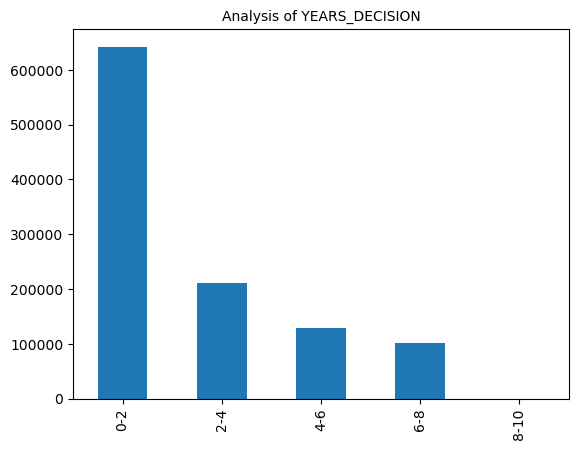

In [297]:
pd.cut(PAD.YEARS_DECISION, [0,2,4,6,8,10], labels=  ["0-2", "2-4", "4-6", "6-8", "8-10"]).value_counts().plot.bar()

plt.title("Analysis of YEARS_DECISION", fontdict={"fontsize" : 10})
plt.show()

Relative to current application, the previous decision was made between o to 2 years majorly

## Bivariate Analysis

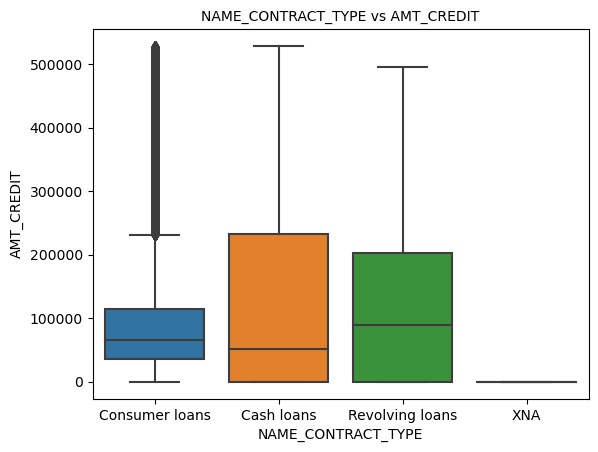

In [298]:
# NAME_CONTRACT_TYPE vs AMT_CREDIT

sns.boxplot(data= PAD[PAD.AMT_CREDIT<PAD.AMT_CREDIT.quantile(0.90)], x= "NAME_CONTRACT_TYPE",y= "AMT_CREDIT"    )

plt.title("NAME_CONTRACT_TYPE vs AMT_CREDIT", fontdict={"fontsize" : 10})
plt.show()

In [299]:
# Removing "XNA" from NAME_CONTRACT_TYPE cols 

PAD["NAME_CONTRACT_TYPE_Without_out"] = PAD[PAD.NAME_CONTRACT_TYPE != "XNA"]["NAME_CONTRACT_TYPE"]

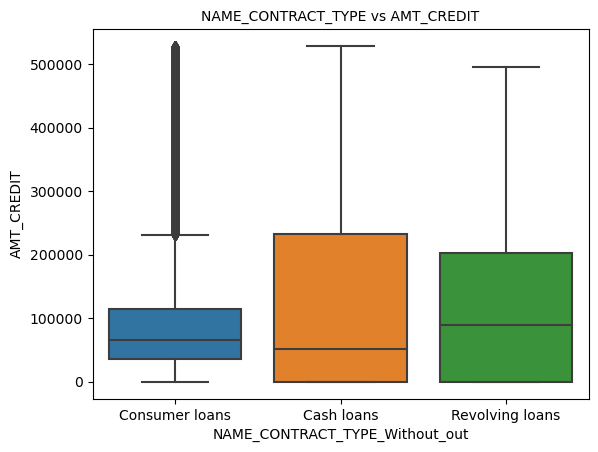

In [300]:
sns.boxplot(data= PAD[PAD.AMT_CREDIT<PAD.AMT_CREDIT.quantile(0.90)], x= "NAME_CONTRACT_TYPE_Without_out",y= "AMT_CREDIT"    )

plt.title("NAME_CONTRACT_TYPE vs AMT_CREDIT", fontdict={"fontsize" : 10})
plt.show()

#### NAME_CONTRACT_TYPE vs AMT_CREDIT:

1. Revolving loans have higher median credit amount followed by Consumer loan and cash loans

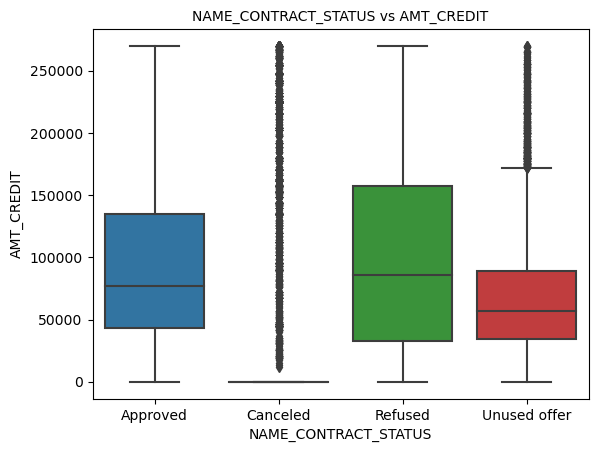

In [301]:
# NAME_CONTRACT_STATUS vs AMT_CREDIT

sns.boxplot(data= PAD[PAD.AMT_CREDIT<PAD.AMT_CREDIT.quantile(0.80)], x= "NAME_CONTRACT_STATUS",y= "AMT_CREDIT"    )

plt.title("NAME_CONTRACT_STATUS vs AMT_CREDIT", fontdict={"fontsize" : 10})
plt.show()

#### NAME_CONTRACT_STATUS vs AMT_CREDIT:

1. majority of refused applications have higher credit loans hence we can say that banks refuse the loans with higher credit amount

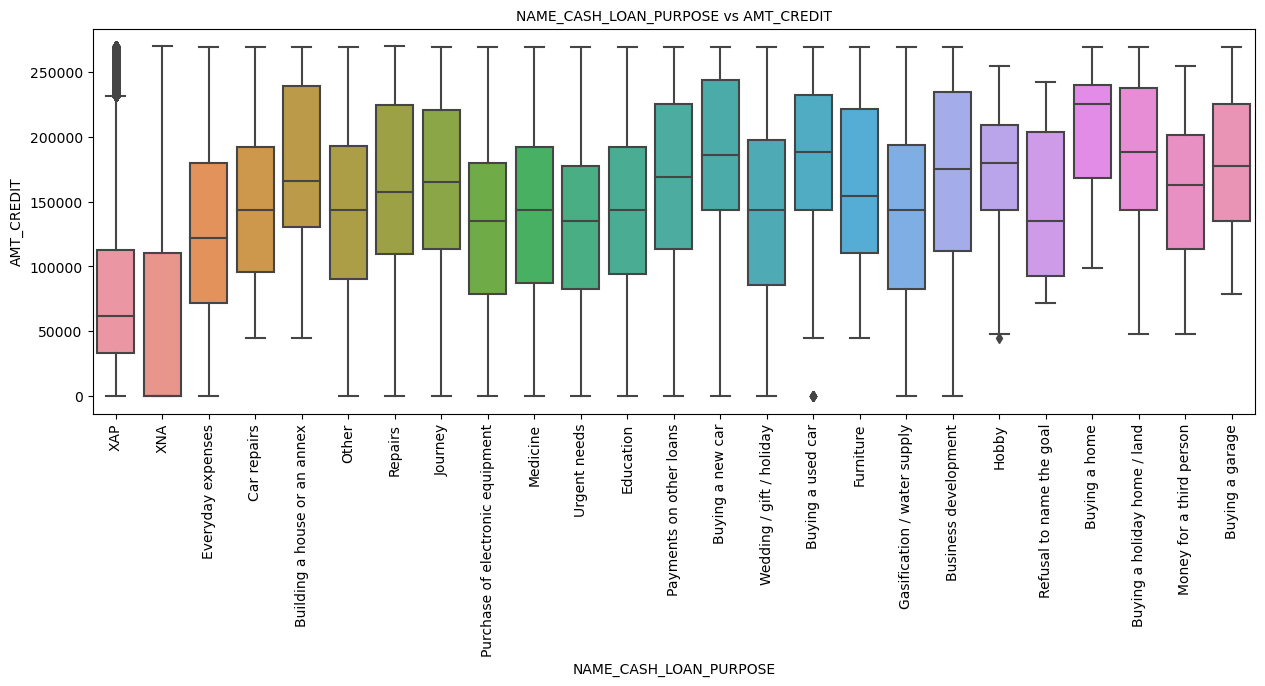

In [302]:
# NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT

plt.figure(figsize=[15,5])
sns.boxplot(data= PAD[PAD.AMT_CREDIT<PAD.AMT_CREDIT.quantile(0.80)], x= "NAME_CASH_LOAN_PURPOSE",y= "AMT_CREDIT"    )

plt.title("NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.show()

In [303]:
# Removing the "XAP" and "XNA" from NAME_CASH_LOAN_PURPOSE cols

PAD["NAME_CASH_LOAN_PURPOSE_New"] = PAD[~ ((PAD.NAME_CASH_LOAN_PURPOSE == "XAP") | (PAD.NAME_CASH_LOAN_PURPOSE == "XNA"))]["NAME_CASH_LOAN_PURPOSE"]

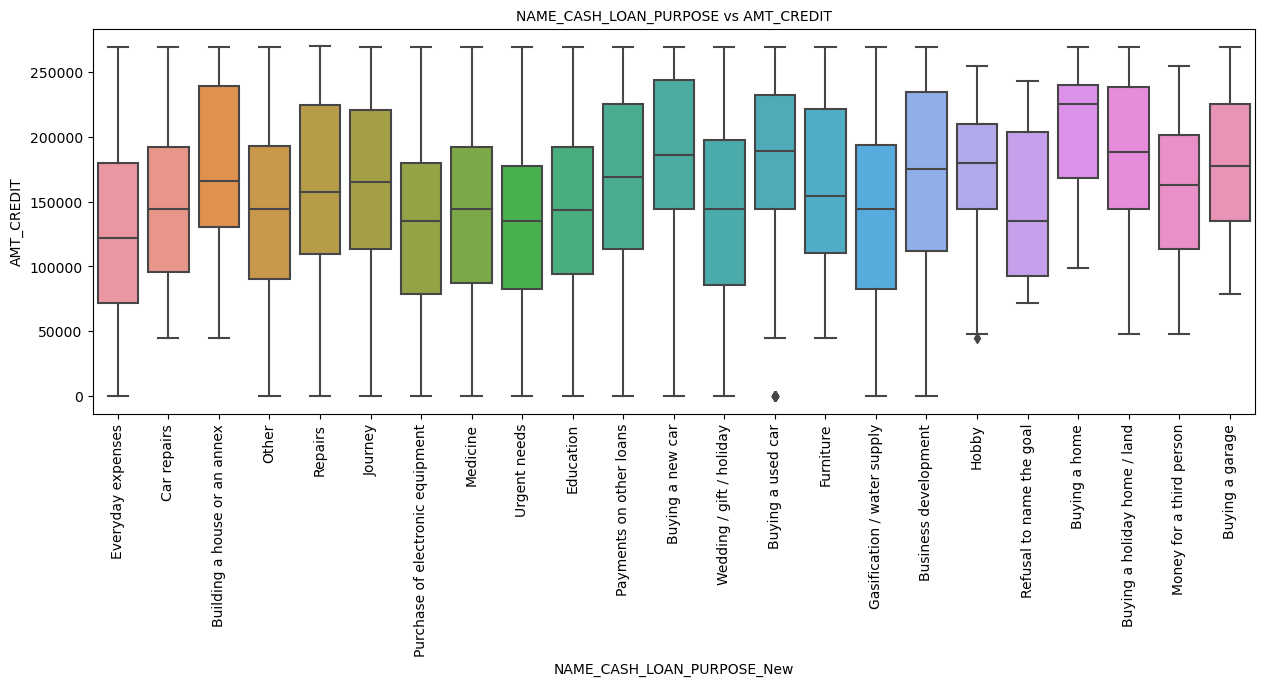

In [304]:
# NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT

plt.figure(figsize=[15,5])
sns.boxplot(data= PAD[PAD.AMT_CREDIT<PAD.AMT_CREDIT.quantile(0.80)], x= "NAME_CASH_LOAN_PURPOSE_New",y= "AMT_CREDIT"    )

plt.title("NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.show()

#### NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT:

1. majority of higher credit loans are for buying home, used/ new cars and holiday home/land

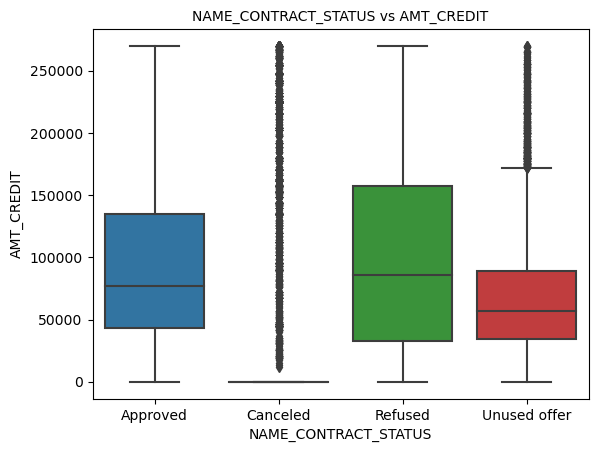

In [305]:
# NAME_CONTRACT_STATUS vs AMT_CREDIT

sns.boxplot(data= PAD[PAD.AMT_CREDIT<PAD.AMT_CREDIT.quantile(0.80)], x= "NAME_CONTRACT_STATUS",y= "AMT_CREDIT"    )

plt.title("NAME_CONTRACT_STATUS vs AMT_CREDIT", fontdict={"fontsize" : 10})
plt.show()

#### NAME_CONTRACT_STATUS vs AMT_CREDIT:

1. majority of refused applications have higher credit loans hence we can say that banks refuse the loans with higher credit amount

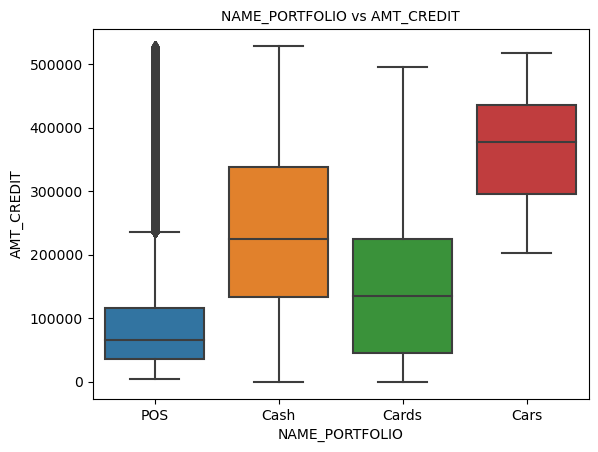

In [306]:
# NAME_PORTFOLIO vs AMT_CREDIT

sns.boxplot(data= PAD[(PAD.AMT_CREDIT<PAD.AMT_CREDIT.quantile(0.90)) & (PAD.NAME_PORTFOLIO != "XNA")], x= "NAME_PORTFOLIO",y= "AMT_CREDIT"    )

plt.title("NAME_PORTFOLIO vs AMT_CREDIT", fontdict={"fontsize" : 10})
plt.show()



#### NAME_PORTFOLIO vs AMT_CREDIT:

1. Applicants with previous applications with cars have higher credit loan than others

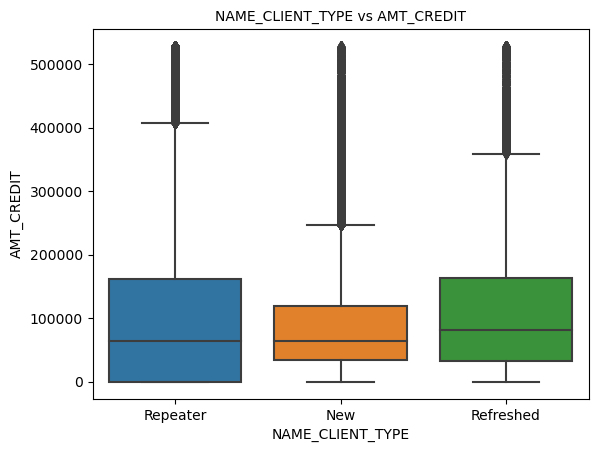

In [307]:
# NAME_CLIENT_TYPE vs AMT_CREDIT

sns.boxplot(data= PAD[(PAD.AMT_CREDIT<PAD.AMT_CREDIT.quantile(0.90)) & (PAD.NAME_CLIENT_TYPE != "XNA")], x= "NAME_CLIENT_TYPE",y= "AMT_CREDIT"    )

plt.title("NAME_CLIENT_TYPE vs AMT_CREDIT", fontdict={"fontsize" : 10})
plt.show()



#### NAME_CLIENT_TYPE vs AMT_CREDIT:

1. Applicants who are repeaters and refreshed are majorly applying for a loan however all the clients have similar median credit loans

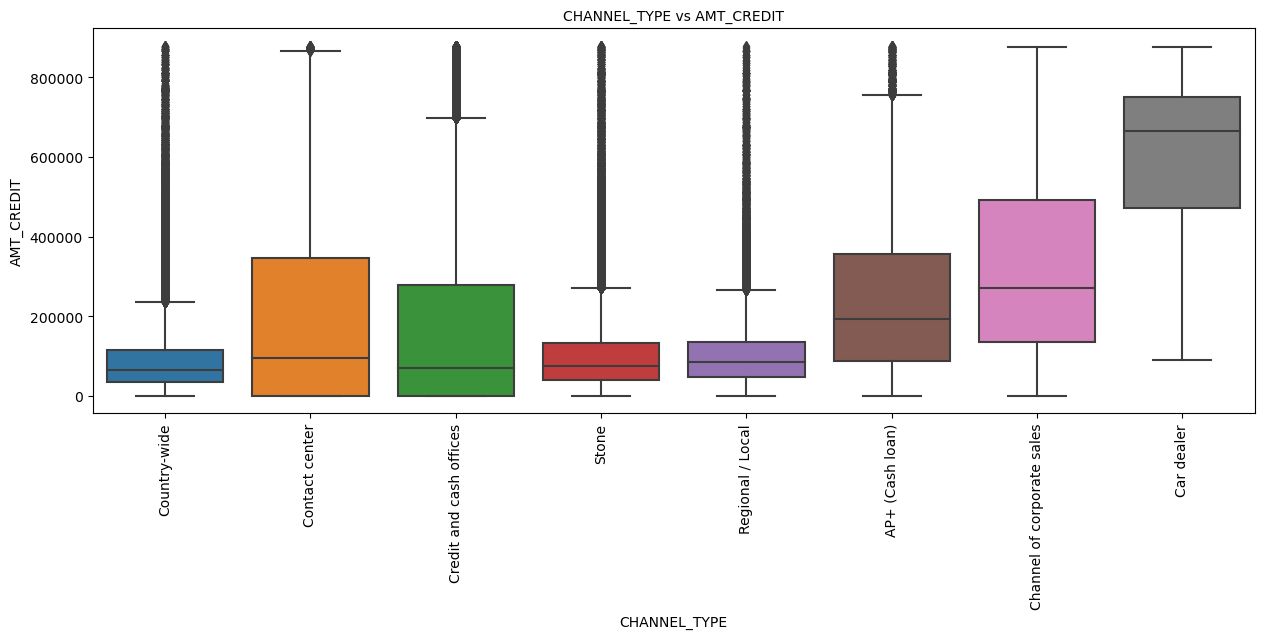

In [308]:
# CHANNEL_TYPE vs AMT_CREDIT

plt.figure(figsize=[15,5])
sns.boxplot(data= PAD[(PAD.AMT_CREDIT<PAD.AMT_CREDIT.quantile(0.95)) & (PAD.CHANNEL_TYPE != "XNA")], x= "CHANNEL_TYPE",y= "AMT_CREDIT"    )

plt.title("CHANNEL_TYPE vs AMT_CREDIT", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.show()



#### CHANNEL_TYPE vs AMT_CREDIT:

1. Majority of the clients with higher credit loans were acquired via car dealers and channel of corporate sales in their previous application

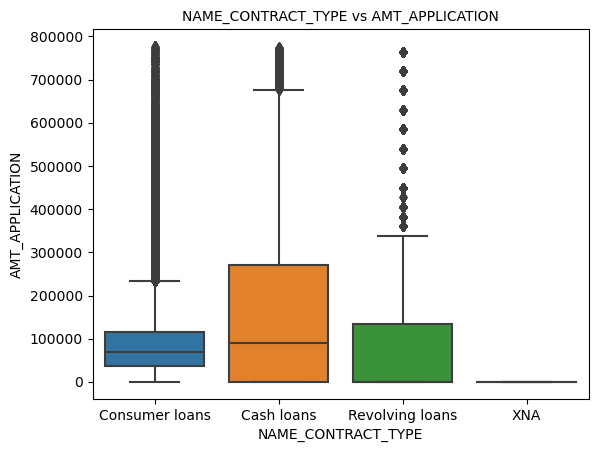

In [309]:
# NAME_CONTRACT_TYPE vs AMT_APPLICATION

sns.boxplot(data= PAD[PAD.AMT_APPLICATION<PAD.AMT_APPLICATION.quantile(0.95)], x= "NAME_CONTRACT_TYPE",y= "AMT_APPLICATION"    )

plt.title("NAME_CONTRACT_TYPE vs AMT_APPLICATION", fontdict={"fontsize" : 10})
plt.show()

In [310]:
# Removing "XNA" from NAME_CONTRACT_TYPE cols 

PAD["NAME_CONTRACT_TYPE_Without_out"] = PAD[PAD.NAME_CONTRACT_TYPE != "XNA"]["NAME_CONTRACT_TYPE"]

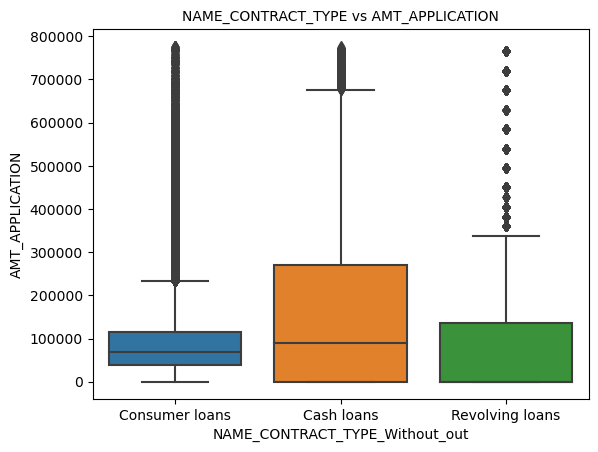

In [311]:
sns.boxplot(data= PAD[PAD.AMT_APPLICATION<PAD.AMT_APPLICATION.quantile(0.95)], x= "NAME_CONTRACT_TYPE_Without_out",y= "AMT_APPLICATION"    )

plt.title("NAME_CONTRACT_TYPE vs AMT_APPLICATION", fontdict={"fontsize" : 10})
plt.show()

#### NAME_CONTRACT_TYPE vs AMT_APPLICATION:

1. Cash loans have higher median loan amount followed by Consumer loan 

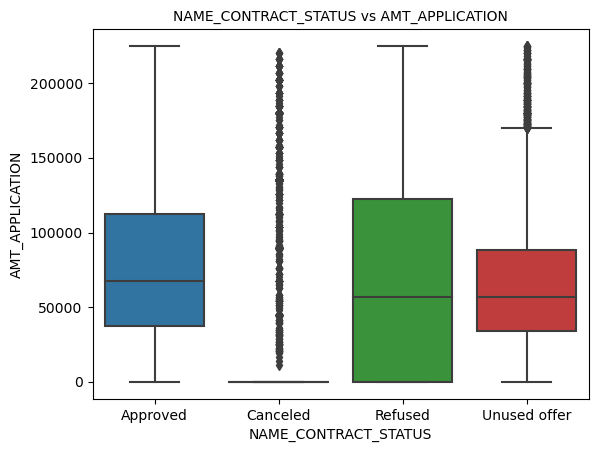

In [312]:
# NAME_CONTRACT_STATUS vs AMT_APPLICATION

sns.boxplot(data= PAD[PAD.AMT_APPLICATION<PAD.AMT_APPLICATION.quantile(0.80)], x= "NAME_CONTRACT_STATUS",y= "AMT_APPLICATION"    )

plt.title("NAME_CONTRACT_STATUS vs AMT_APPLICATION", fontdict={"fontsize" : 10})
plt.show()

#### NAME_CONTRACT_STATUS vs AMT_APPLICATION:

1. majority of refused applications have higher loans although there is no significant median loan diffrence between Approved, Refused and Unused offers

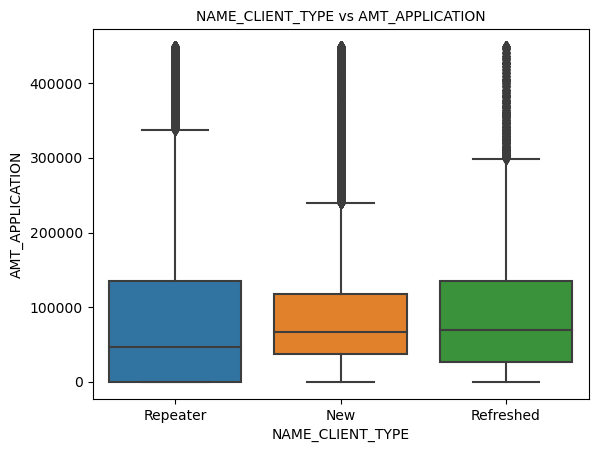

In [313]:
# NAME_CLIENT_TYPE vs AMT_APPLICATION

sns.boxplot(data= PAD[(PAD.AMT_APPLICATION<PAD.AMT_APPLICATION.quantile(0.90)) & (PAD.NAME_CLIENT_TYPE != "XNA")], x= "NAME_CLIENT_TYPE",y= "AMT_APPLICATION"    )

plt.title("NAME_CLIENT_TYPE vs AMT_APPLICATION", fontdict={"fontsize" : 10})
plt.show()



#### NAME_CLIENT_TYPE vs AMT_APPLICATION:

1. Applicants who are new and refreshed are majorly applying for a slightly higher loan vs Repeaters

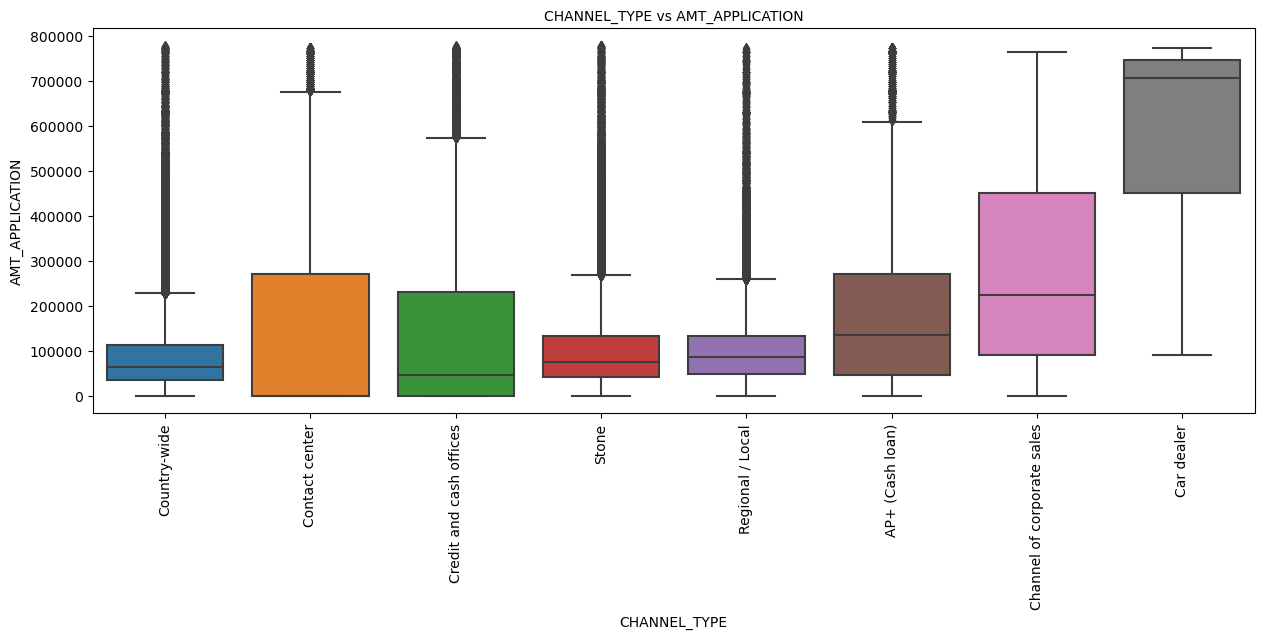

In [314]:
# CHANNEL_TYPE vs AMT_APPLICATION

plt.figure(figsize=[15,5])
sns.boxplot(data= PAD[(PAD.AMT_APPLICATION<PAD.AMT_APPLICATION.quantile(0.95)) & (PAD.CHANNEL_TYPE != "XNA")], x= "CHANNEL_TYPE",y= "AMT_APPLICATION"    )

plt.title("CHANNEL_TYPE vs AMT_APPLICATION", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.show()



#### CHANNEL_TYPE vs AMT_APPLICATION:

1. Majority of the clients with higher loans were acquired via car dealers and channel of corporate sales in their previous application

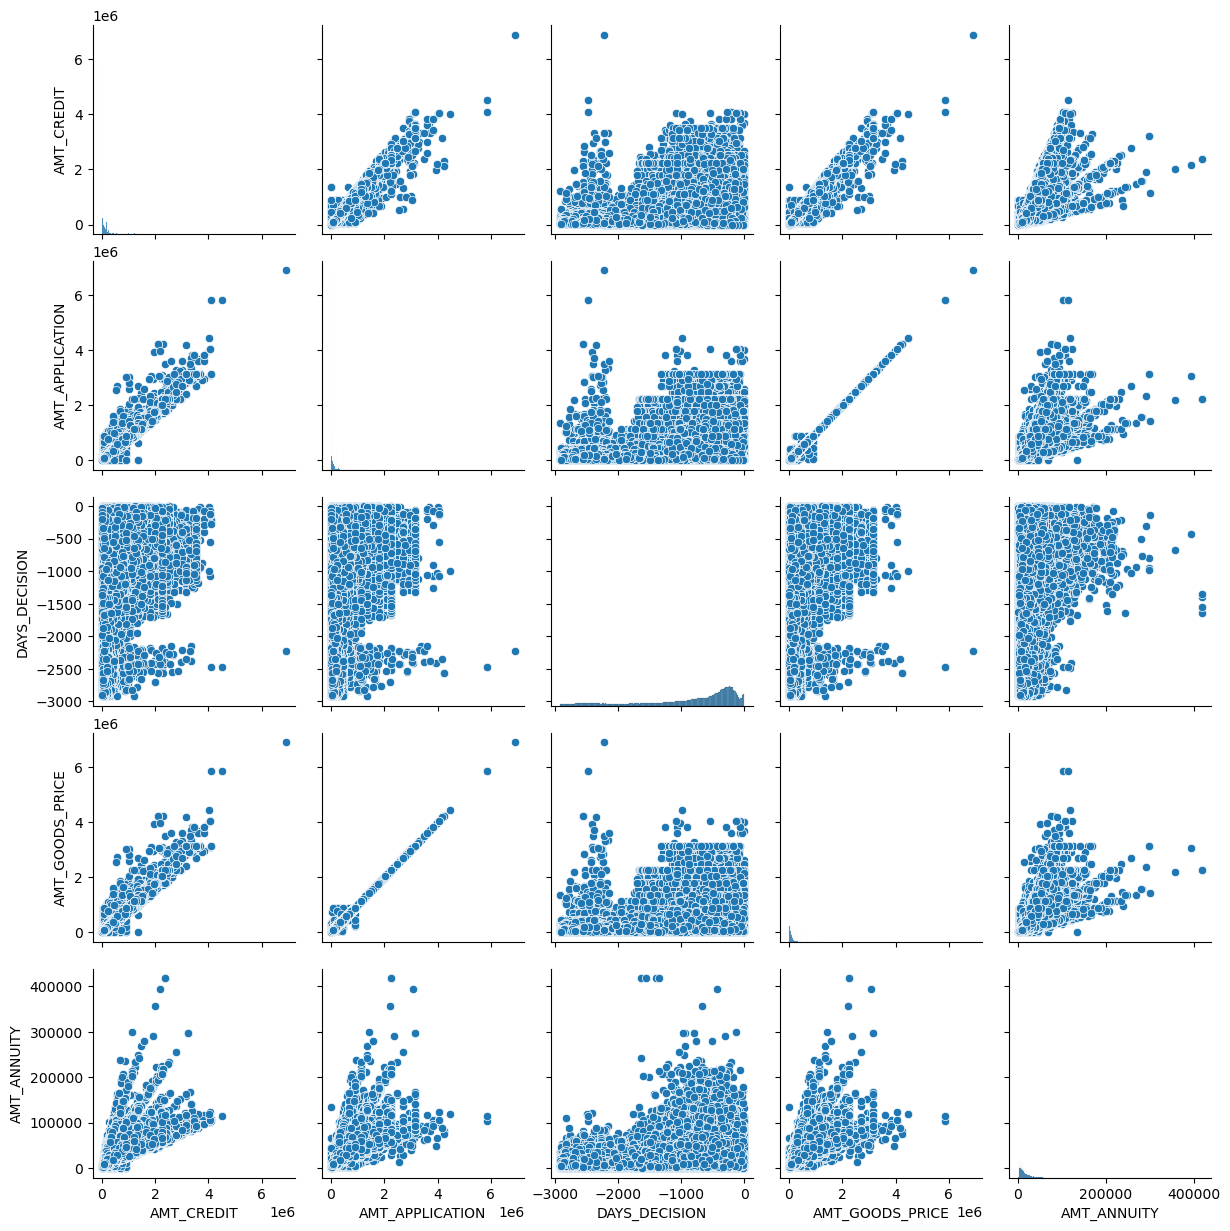

In [315]:
# Investigating the correlation between all of the numerical columns using pairplot

sns.pairplot(PAD[["AMT_CREDIT","AMT_APPLICATION","DAYS_DECISION","AMT_GOODS_PRICE","AMT_ANNUITY"]])
plt.show()

Based on our analysis using pairplot, we can observe a strong correlation between AMT_CREDIT vs AMT_APPLICATION and AMT_APPLICATION vs AMT_GOODS_PRICE. Also, There is a correlation between AMT_ANNUITY vs AMT_GOODS_PRICE and AMT_ANNUITY vs AMT_CREDIT

### Compilation of Both AD and PAD dfs

In [316]:
PAD.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'AMT_APPLICATION_BINS', 'AMT_CREDIT_BINS', 'YEARS_DECISION',
       'NAME_CONTRACT_TYPE_Without_out', 'NAME_CASH_LOAN_PURPOSE_New'],
      dtype='object')

In [317]:
AD.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [318]:
# Selecting the PAD columns to merge them with AD df

PAD_cols_to_be_merged = PAD[['SK_ID_CURR', 'NAME_CONTRACT_TYPE',  'FLAG_LAST_APPL_PER_CONTRACT', 
                             'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
                             'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
                             'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
                             'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
                             'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION' ]]

In [319]:
# Merging the PAD_cols_to_be_merged with the current application data for further analysis

Merged_data = AD1.merge(PAD_cols_to_be_merged, on="SK_ID_CURR" , how= "inner" )

In [320]:
Merged_data.shape

(1057801, 59)

In [321]:
# Segmenting the data based on Target 1 and 0 and merging with the current application data for further analysis

Target_1_merged_data = TARGET_VAR_1.merge(PAD_cols_to_be_merged, on="SK_ID_CURR" , how= "inner" )
Target_0_merged_data = TARGET_VAR_0.merge(PAD_cols_to_be_merged, on="SK_ID_CURR" , how= "inner" )

In [322]:
Target_1_merged_data.shape

(91558, 59)

In [323]:
Target_0_merged_data.shape

(966243, 59)

### Analysis using Merged Data

In [324]:
Merged_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE',
       'Income_BINS', 'Credit_BINS', 'Goods_Price_BINS', 

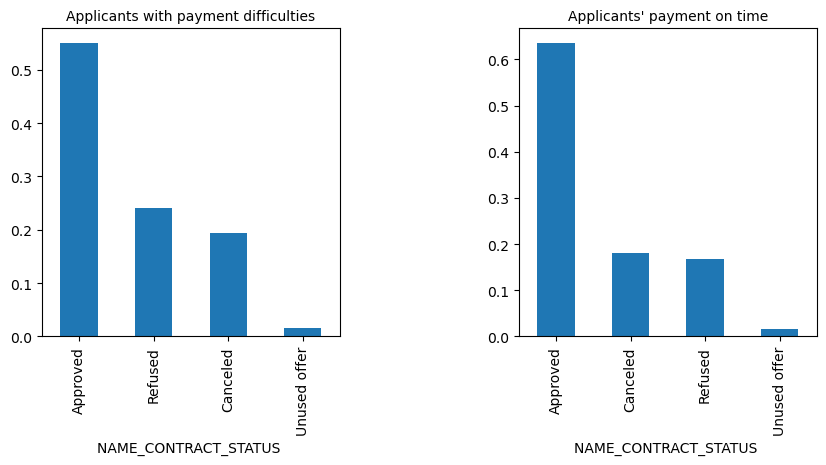

Applicants with payment difficulties
Approved        55.027414
Refused         24.003364
Canceled        19.428122
Unused offer     1.541100
Name: NAME_CONTRACT_STATUS, dtype: float64
Applicants' payment on time
Approved        63.554613
Canceled        18.110869
Refused         16.704183
Unused offer     1.630335
Name: NAME_CONTRACT_STATUS, dtype: float64


In [325]:
# Analysis of NAME_CONTRACT_STATUS vs TARGET at segment level

plt.figure(figsize=[10,4])
plt.subplots_adjust(wspace=0.6)

plt.subplot(1,2,1)
Target_1_merged_data.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.xlabel("NAME_CONTRACT_STATUS ", fontdict={"fontsize" : 10})


plt.subplot(1,2,2)
Target_0_merged_data.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.title("Applicants' payment on time", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.xlabel("NAME_CONTRACT_STATUS ", fontdict={"fontsize" : 10})

plt.show()

print("Applicants with payment difficulties")
print(Target_1_merged_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100)
print("Applicants' payment on time")
print(Target_0_merged_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100)

#### NAME_CONTRACT_STATUS vs TARGET:

1. Majority of applicants with payment on time are approved on their previous application vs applicants with payment difficulties
2. However, There is Approved applicants on their previous application are higher as compared to others groups
3. The applicants who are refused on their previous application are having difficulties in payments with current application

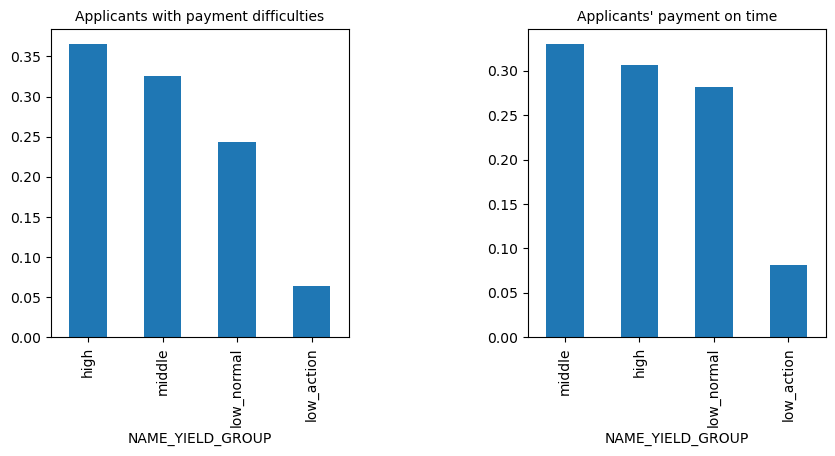

Applicants with payment difficulties
high          36.569369
middle        32.619036
low_normal    24.389593
low_action     6.422003
Name: NAME_YIELD_GROUP, dtype: float64
Applicants' payment on time
middle        33.022958
high          30.605453
low_normal    28.205650
low_action     8.165939
Name: NAME_YIELD_GROUP, dtype: float64


In [326]:
# Analysis of NAME_YIELD_GROUP vs TARGET at segment level

plt.figure(figsize=[10,4])
plt.subplots_adjust(wspace=0.6)

plt.subplot(1,2,1)
Target_1_merged_data[Target_1_merged_data["NAME_YIELD_GROUP"]!= "XNA"]["NAME_YIELD_GROUP"].value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.xlabel("NAME_YIELD_GROUP", fontdict={"fontsize" : 10})


plt.subplot(1,2,2)
Target_0_merged_data[Target_0_merged_data["NAME_YIELD_GROUP"]!= "XNA"]["NAME_YIELD_GROUP"].value_counts(normalize=True).plot.bar()
plt.title("Applicants' payment on time", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.xlabel("NAME_YIELD_GROUP", fontdict={"fontsize" : 10})

plt.show()

print("Applicants with payment difficulties")
print(Target_1_merged_data[Target_1_merged_data["NAME_YIELD_GROUP"]!= "XNA"]["NAME_YIELD_GROUP"].value_counts(normalize=True)*100)
print("Applicants' payment on time")
print(Target_0_merged_data[Target_0_merged_data["NAME_YIELD_GROUP"]!= "XNA"]["NAME_YIELD_GROUP"].value_counts(normalize=True)*100)

#### NAME_YIELD_GROUP vs TARGET:

1. Majority of applicants are having group interest rates with high interest rates of their previous application
2. Applicants with high interest rates on their previous application are having payment difficulties vs applicants who are paying on time
3. The applicants who are having low normal interest rates of their previous application are able to pay on time vs applicants with payment difficulties

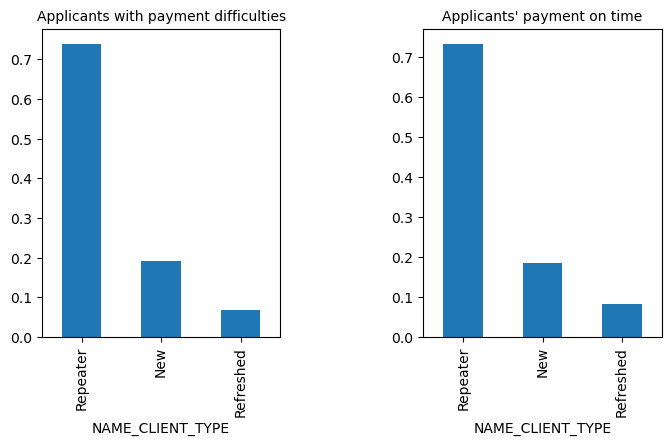

Applicants with payment difficulties
Repeater     74.017582
New          19.097291
Refreshed     6.885128
Name: NAME_CLIENT_TYPE, dtype: float64
Applicants' payment on time
Repeater     73.297714
New          18.412001
Refreshed     8.290285
Name: NAME_CLIENT_TYPE, dtype: float64


In [327]:
# Analysis of NAME_CLIENT_TYPE vs TARGET at segment level

plt.figure(figsize=[8,4])
plt.subplots_adjust(wspace=0.6)

plt.subplot(1,2,1)
Target_1_merged_data[Target_1_merged_data["NAME_CLIENT_TYPE"]!= "XNA"]["NAME_CLIENT_TYPE"].value_counts(normalize=True).plot.bar()
plt.title("Applicants with payment difficulties", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.xlabel("NAME_CLIENT_TYPE", fontdict={"fontsize" : 10})


plt.subplot(1,2,2)
Target_0_merged_data[Target_0_merged_data["NAME_CLIENT_TYPE"]!= "XNA"]["NAME_CLIENT_TYPE"].value_counts(normalize=True).plot.bar()
plt.title("Applicants' payment on time", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.xlabel("NAME_CLIENT_TYPE", fontdict={"fontsize" : 10})

plt.show()

print("Applicants with payment difficulties")
print(Target_1_merged_data[Target_1_merged_data["NAME_CLIENT_TYPE"]!= "XNA"]["NAME_CLIENT_TYPE"].value_counts(normalize=True)*100)
print("Applicants' payment on time")
print(Target_0_merged_data[Target_0_merged_data["NAME_CLIENT_TYPE"]!= "XNA"]["NAME_CLIENT_TYPE"].value_counts(normalize=True)*100)

#### NAME_CLIENT_TYPE vs TARGET:

1. Majority of applicants were repeater when applied for their previous application
2. Applicants who were repeater and new  when applied for their previous application are sligtly having difficulties with payments vs applicants with on time payments
3. The applicants who refreshed when applied for for their previous application are able to pay on time vs applicants facing difficluties with payments

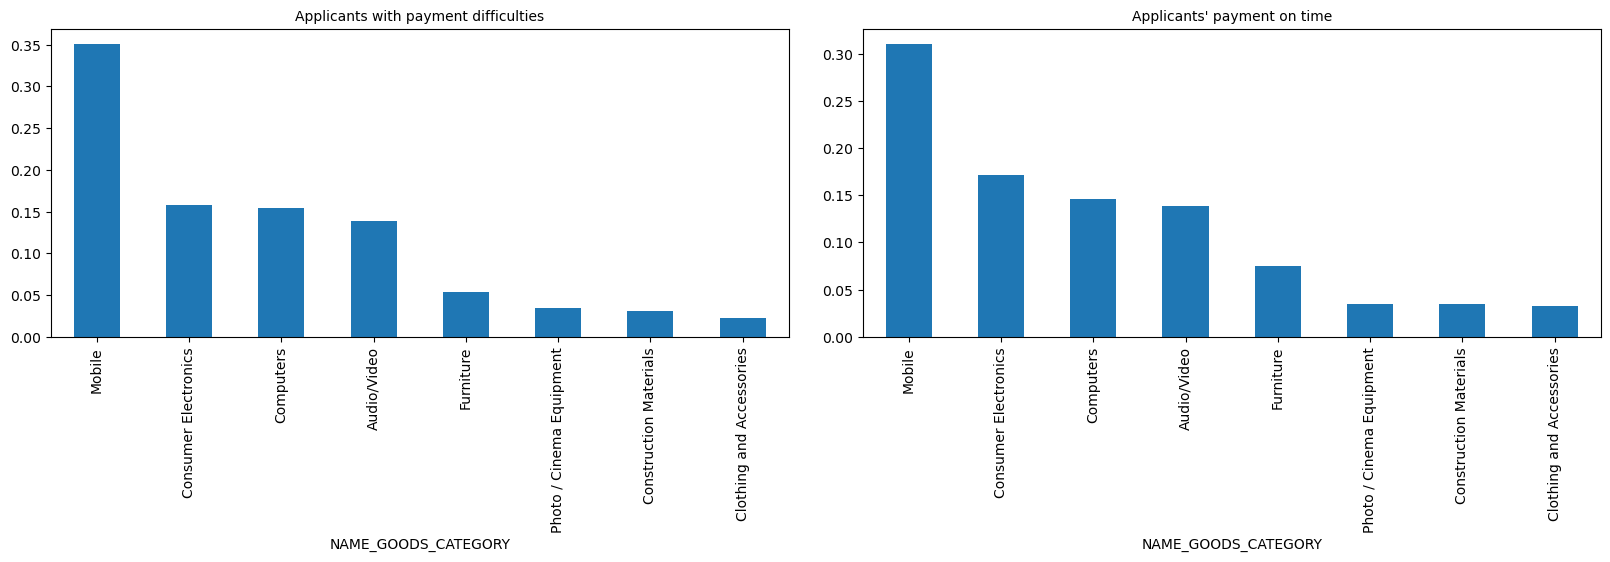

Applicants with payment difficulties
Mobile                      35.129635
Consumer Electronics        15.762476
Computers                   15.374965
Audio/Video                 13.819348
Furniture                    5.427934
Photo / Cinema Equipment     3.479231
Construction Materials       3.144689
Clothing and Accessories     2.305548
Name: NAME_GOODS_CATEGORY, dtype: float64
Applicants' payment on time
Mobile                      31.070387
Consumer Electronics        17.122693
Computers                   14.548212
Audio/Video                 13.902433
Furniture                    7.530271
Photo / Cinema Equipment     3.507921
Construction Materials       3.476891
Clothing and Accessories     3.226092
Name: NAME_GOODS_CATEGORY, dtype: float64


In [328]:
# Analysis of NAME_GOODS_CATEGORY vs TARGET at segment level

plt.figure(figsize=[20,4])
plt.subplots_adjust(wspace=0.1)

plt.subplot(1,2,1)
Target_1_merged_data[Target_1_merged_data["NAME_GOODS_CATEGORY"]!= "XNA"]["NAME_GOODS_CATEGORY"].value_counts(normalize=True).head(8).plot.bar()
plt.title("Applicants with payment difficulties", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.xlabel("NAME_GOODS_CATEGORY", fontdict={"fontsize" : 10})


plt.subplot(1,2,2)
Target_0_merged_data[Target_0_merged_data["NAME_GOODS_CATEGORY"]!= "XNA"]["NAME_GOODS_CATEGORY"].value_counts(normalize=True).head(8).plot.bar()
plt.title("Applicants' payment on time", fontdict={"fontsize" : 10})
plt.xticks(rotation=90)
plt.xlabel("NAME_GOODS_CATEGORY", fontdict={"fontsize" : 10})

plt.show()

print("Applicants with payment difficulties")
print(Target_1_merged_data[Target_1_merged_data["NAME_GOODS_CATEGORY"]!= "XNA"]["NAME_GOODS_CATEGORY"].value_counts(normalize=True).head(8)*100)
print("Applicants' payment on time")
print(Target_0_merged_data[Target_0_merged_data["NAME_GOODS_CATEGORY"]!= "XNA"]["NAME_GOODS_CATEGORY"].value_counts(normalize=True).head(8)*100)



#### NAME_GOODS_CATEGORY vs TARGET:

1. Majority of applicants applied for Mobile in the previous application.They are facing difficulyies with payments on the current application vs applicants paying on time
2. The applicants who applied for Consumer Electronics goods are able to pay on time on the current application vs applicants with payment difficulties